##**1. Introduction**

**Background**

Credit plays a crucial role in economy and commerce facilitating economic transactions and fostering ﬁnancial growth. Lenders and ﬁnancial institutions assess the creditworthiness of individuals, businesses, and other entities seeking access to ﬁnancial products and services. Credit scoring models act as key tools for lenders and financial institutions, facilitating the assessment of creditworthiness. Traditional models, while instrumental, face issues related to efficiency and subjectivity. As technology continues to evolve, financial institutions are increasingly integrating machine learning into their credit risk assessment frameworks to improve decision making and customer experience.

##**2. Research Problem**

Kenya's lending environment continues to face high credit risk, with non-performing loans remaining significantly above global averages. These elevated default rates reduce bank profitability, restrict the availability of longer-term credit, and expose lenders to higher provisioning requirements. At the same time, the application of machine learning in Kenya is concentrated mainly in short-term digital lending, yet longer-term, higher-value loans those with the greatest impact on households and businesses are still evaluated using traditional scorecards that rely on limited financial and demographic information. These legacy methods struggle to reflect the full complexity of borrower behaviour, leading to misclassification, exclusion of potentially creditworthy borrowers, and weakened risk management. They also offer limited transparency, meaning customers often do not understand why they are rated in a certain way and lack clear pathways for credit repair or improving their creditworthiness. Advanced machine learning models offer improved predictive power, but their adoption is restricted by concerns around transparency, interpretability, and regulatory expectations. This project seeks to address these challenges by developing an interpretable, machine-learning-based credit scoring model that incorporates a broader range of consumer attributes including demographic, financial, transactional, and behavioural indicators to improve default prediction for longer-term, high-value loans within the Kenyan context.

##**3. Objectives**

**General Objective**

To develop an enhanced machine learning credit scoring model that uses customer attributes to predict loan default.

**Specific Objectives**

i. Review the evolution of credit scoring methods and their role in credit risk assessment.

ii. Analyse the influence of different consumer attributes on loan default using statistical and machine learning techniques.

iii. Develop, validate, and deploy an interpretable machine learning credit scoring model tailored for longer-term, high-value loans.

##**4. Methodology, Results and Discussion**

##**A. Data description**

The data contains details of consumer customers of a financial institution in Kenya as at May 2024. It contains 48 columns and 6,589 rows. The details of the variables to be used for purposes of credit scoring are as follows;

| **No.** | **Variable** | **Description** |
|--------|--------------|-----------------|
| 1 | INDENTIFIER | Unique loan account number used as the primary identifier. |
| 2 | CRR | Internal credit risk rating score assigned to a borrower. |
| 3 | CRR_NARRATION | Borrower’s classification (Normal, Watch, Substandard, Doubtful, NPL). |
| 4 | PRUDENTIAL_CLASSIFICATION | Loan classification as per CBK Prudential Guidelines. |
| 5 | Max_Remaining_Tenor(AllLoans) | Remaining months before loan maturity. |
| 6 | Running_Loans_Count | Number of active loan facilities held by the customer. |
| 7 | MAX_DPD | Maximum days past due recorded for the borrower’s worst-performing loan. |
| 8 | Arrears_Amount | Total overdue amount from missed loan payments. |
| 9 | Exposure_Amount | Total outstanding loan exposure. |
| 10 | NetIncome | Average monthly income across last 12 months. |
| 11 | OnUsEMI | Equal monthly installment for all loans with the institution. |
| 12 | CurrentBalanceAmount | Combined outstanding loan balance across all accounts. |
| 13 | DrTurnover | Total debit turnover in the last 12 months. |
| 14 | TotalAssets | Total term deposits + credit balance. |
| 15 | MobileTotal | Number of mobile loans taken by the borrower. |
| 16 | PastDueAmount | Total amount currently past due. |
| 17 | MaxArrears | Maximum arrears days accumulated across accounts. |
| 18 | CurrentArrears | Number of accounts currently in arrears. |
| 19 | NonPerforming | Indicator of default (91+ days past due). |
| 20 | Gender | Gender of the borrower. |
| 21 | SavingAcctDepositCount | Number of deposits into savings account over last 6 months. |
| 22 | Age | Age of the borrower. |
| 23 | CustomerTenure | Years the customer has banked with the institution. |
| 24 | EmployerStrength | Strength of employer’s relationship with the bank. |
| 25 | SECTOR | Economic sector classification. |
| 26 | NAME_1 | Branch where account is domiciled. |
| 27 | CUSTOMER_SEGMENT_NAME | Customer segment based on income level. |
| 28 | CUSTOMER_SUBSEGMENT_NAME | Secondary segmentation of the customer. |
| 29 | SECTOR_6 | Expanded economic sector classification. |
| 30 | INDUSTRY | Business industry classification. |
| 31 | NATIONALITY | Customer citizenship. |
| 32 | DESCRIPTION | Customer status (Normal, Bankrupt, Statutory Notice). |
| 33 | CLASSIFICATION#1 | Additional internal credit risk rating. |
| 34 | EMPLOYMENT_TYPE | Type of employment (Permanent, Contract, Self-employed, etc.). |
| 35 | EMPLOYMENT_STATUS | Employment status (Employed, Self-employed, Unemployed). |
| 36 | DATE_OF_BIRTH | Customer’s date of birth. |
| 37 | GENDER#1 | Duplicate gender field. |
| 38 | MARITAL_STATUS | Customer marital status. |
| 39 | CALC_RISK_CLASS | System-calculated risk class. |
| 40 | MANUAL_RISK_CLASS | Manually assigned risk class. |
| 41 | PEP_STATUS | Politically exposed person indicator. |
| 42 | DISABILITY | Disability type (mobility/visual). |
| 43 | DISABLED | Disability indicator. |
| 44 | OTHER_DISABILITY | Additional disability information. |
| 45 | AML_CHECK | Anti-Money Laundering check indicator. |
| 46 | AML_RESULT | AML check results. |
| 47 | AML_RISK_CLASS | AML risk classification (Low/Medium/High). |
| 48 | CONTACT_DATE | Date of first transaction with the institution. |


##**B. Exploratory Data Analytics**

### **i. Import Libraries**

In [ ]:
# Colab Drive mounting

from google.colab import drive
drive.mount("/content/drive")

import os
import warnings
import random
import math
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency

from statsmodels.stats.outliers_influence import variance_inflation_factor

import joblib
from google.colab import files

# Reproducibility

RANDOM_STATE = 42
warnings.filterwarnings("ignore")

np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
os.environ["PYTHONHASHSEED"] = str(RANDOM_STATE)


# Scikit-learn + imblearn

from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    average_precision_score, balanced_accuracy_score, ConfusionMatrixDisplay,
    classification_report, confusion_matrix, roc_auc_score, log_loss,
    accuracy_score, precision_score, recall_score, f1_score
)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, average_precision_score, balanced_accuracy_score
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Use imblearn Pipeline if SMOTE is inside the pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Feature selection (restored)
from sklearn.feature_selection import RFE, mutual_info_classif

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, log_loss,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

import os
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay


# Models
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score, balanced_accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier


# TensorFlow / Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(RANDOM_STATE)

import os, json, joblib

from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix
)

import shap

# 4) Streamlit

#!pip -q install streamlit
#import streamlit as st



Mounted at /content/drive


**Comments**

This code block imports all essential libraries for the credit scoring project, including tools for data loading, cleaning, visualization, and statistical analysis (Pandas, NumPy, Matplotlib, Seaborn, SciPy). It also sets reproducibility settings and brings in key Scikit Learn modules for preprocessing, handling missing values, encoding, feature selection, model building, and evaluation. A wide range of machine learning models such as logistic regression, decision trees, random forests, boosting algorithms, SVMs, XGBoost, LightGBM, and neural networks are included for performance comparison, along with TensorFlow/Keras for deep learning. Collectively, these imports create a complete environment for end to end development, training, and assessment of a credit scoring model.

###**ii) Loading Dataset**

In [ ]:
# Load the dataset from the google drive folder and displaying first 5 records of the data

DATA_PATH = "/content/drive/MyDrive/Semester 5/POA/Project/Lending data.xlsx"

df = pd.read_excel(DATA_PATH)

# show everything except IDENTIFIER
display(df.drop(columns=["IDENTIFIER"], errors="ignore").head())


,CRR,CRR_NARRATION,PRUDENTIAL_CLASSIFICATION,Max_REMAINING_TENOR(AllLoans),RUNNING_LOANS_COUNT,MAX_DPD,Arrears_Amount,Exposure_Amount,NetIncome,OnUsEMI,...,CALC_RISK_CLASS,MANUAL_RISK_CLASS,PEP_STATUS,DISABILITY,DISABLED,OTHER_DISABILITY,AML_CHECK,AML_RESULT,AML_RISK_CLASS,CONTACT_DATE
0,A5,NORMAL,NORMAL,101,4,0,0.0,50680758.14,2.069082e+06,943187.746667,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,LOW,2004-05-11
1,A5,NORMAL,NORMAL,76,1,0,0.0,43813558.36,0.000000e+00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,A5,NORMAL,NORMAL,163,4,0,0.0,35344955.25,1.220855e+06,488683.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-10
3,A5,NORMAL,NORMAL,74,1,0,0.0,32013947.35,0.000000e+00,778572.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW,2007-04-25
4,A5,NORMAL,NORMAL,174,1,0,0.0,28365941.01,0.000000e+00,617796.900000,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,LOW,2003-06-10


**Comments**

The code loads the lending dataset from Google Drive using pd.read_excel() and displays the first five rows with to confirm successful import. The preview shows that the dataset contains 48 columns (IDENTIFIER not printed) with customer, loan, and credit-risk attributes such as credit ratings, arrears, exposure amounts, income, and tenure details. This quick inspection helps verify that the data is correctly structured and ready for further cleaning and analysis.

###**iii) To show number of rows and columns**

In [ ]:
df.shape

(6589, 48)

There are a total of 6589 observations and 48 variables/characteristics/features one being a target variabe i.e MAX_DPD

###**iv) Further Exploratory Data Analysis (EDA) to understand the data**

In [ ]:
#Understanding the structure of the dataset to Data clean
#Variable indentification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   IDENTIFIER                     6589 non-null   int64         
 1   CRR                            6589 non-null   object        
 2   CRR_NARRATION                  6589 non-null   object        
 3   PRUDENTIAL_CLASSIFICATION      6589 non-null   object        
 4   Max_REMAINING_TENOR(AllLoans)  6589 non-null   int64         
 5   RUNNING_LOANS_COUNT            6589 non-null   int64         
 6   MAX_DPD                        6589 non-null   int64         
 7   Arrears_Amount                 6589 non-null   float64       
 8   Exposure_Amount                6589 non-null   float64       
 9   NetIncome                      6589 non-null   float64       
 10  OnUsEMI                        6589 non-null   float64       
 11  CurrentBalanceAmo

**Comments**

The dataset has 6,589 rows and 48 columns with a mix of numeric, categorical, and date variables. Most fields are complete, but several including employment, marital status, and AML-related columns have significant or total missing values. This overview highlights which features are usable and which require cleaning or removal before modeling.

In [ ]:
# To check columns with different data types
df.dtypes.value_counts()

,count
object,22
float64,13
int64,11
datetime64[ns],2


**Comments**

The dataset contains four data types: 22 object columns, 13 float columns, 11 integer columns, and 2 datetime fields. This mix indicates extensive categorical information, several continuous numeric features, and two date variables that may require transformation for modeling.


In [ ]:
# Descriptive statistics on numerical variables with 2 decimal places
cols_to_exclude = ["IDENTIFIER", "DATE_OF_BIRTH", "CONTACT_DATE"]

pd.options.display.float_format = "{:.2f}".format  # <--- Forces 2 decimal places globally

display(df.drop(columns=cols_to_exclude, errors='ignore').describe().T)


,count,mean,std,min,25%,50%,75%,max
Max_REMAINING_TENOR(AllLoans),6589.00,27.23,35.59,0.00,8.00,11.00,44.00,299.00
RUNNING_LOANS_COUNT,6589.00,1.53,0.74,1.00,1.00,1.00,2.00,10.00
MAX_DPD,6589.00,4.34,16.45,0.00,0.00,0.00,0.00,230.00
Arrears_Amount,6589.00,8652.92,35504.18,0.00,0.00,0.00,0.00,859110.19
Exposure_Amount,6589.00,1251067.16,2383165.38,1.99,92007.21,494776.20,1408275.58,50680758.14
NetIncome,6589.00,197875.38,497496.53,0.00,6520.00,83508.33,223215.69,25668001.33
OnUsEMI,6589.00,67712.70,90842.65,0.00,20750.00,46186.40,89630.05,4037540.00
CurrentBalanceAmount,6589.00,2376677.87,10782018.34,0.00,292045.04,1076350.54,2660882.69,823816793.80
DrTurnover,6589.00,-2089346.44,4658709.07,-217772094.93,-2371233.80,-1026050.00,-400358.40,0.00
TotalAssets,6589.00,31837.51,915845.25,0.00,0.00,0.00,0.00,49000000.00


**Comments**

The descriptive analysis of key numerical variables as show above reveals several important data insights.
1. The average remaining loan tenor is 27.2 months, indicating that most borrowers still have slightly over two years to repay their facilities.
2. Borrowers hold an average of 1.5 active loans, with some holding up to 10 facilities, highlighting a segment of highly leveraged customers.
3. The mean MAX_DPD is 4.3 days, confirming that the majority of accounts are performing; however, the maximum value of 230 days past due signals the presence of severely distressed loans within the portfolio.
4. Financial exposure patterns also show significant variability: while the average arrears amount is KES 8,652.90, the highest recorded arrears exceed KES 859,110, pointing to material delinquency among a small subset of borrowers.
5. The typical borrower has an outstanding exposure of KES 1.25 million, but this ranges up to KES 50.7 million, suggesting the dataset contains both retail and high-limit customers.
6. Borrower income also varies widely. The mean net monthly income is KES 197,875, yet values range from 0 to KES 497,497. Zero-income entries likely indicate customers who were terminated, shifted employers, or no longer process salary through the financial institution.
7. The average borrower pays an EMI of KES 67,713, though the maximum EMI of KES 4,037,540 appears to be a clear outlier—likely due to a high-value secured loan or a data entry anomaly. Instances of zero EMI correspond to loans under moratorium, recently opened loans, or short-term digital loans with a single repayment.
8. Demographic data shows an average borrower age of 39 years, with most falling between 19 and 60 years. The minimum age of 5 years reflects a likely data entry error or incorrect date of birth capture.
9. CurrentBalanceAmount further shows substantial heterogeneity, with a mean of KES 2.38 million but a maximum exceeding KES 823 million—indicative of a handful of accounts with unusually large exposure.
10. Liquidity and transaction behavior, captured through variables like DrTurnover and TotalAssets, also exhibit extreme dispersion. DrTurnover is consistently negative, reflecting net debit movement typical of loan-servicing customers, yet its high variability and extremely negative minimum value (-217M) highlight the presence of customers with substantial high-frequency banking activity.
11. TotalAssets is zero for most borrowers but spikes to KES 49 million for a few, likely representing wealthy depositors or premier-linked accounts.
12. Customer Tenure averages 4 years, suggesting that the typical borrower has a moderately established relationship with the institution. The range (0 to 29 years) indicates a mix of newly acquired customers and long-term clients.
13. Several variables—CALC_RISK_CLASS, MANUAL_RISK_CLASS, AML fields, disability indicators—contain zero usable values or exclusively missing data, making them uninformative for analysis and appropriate candidates for exclusion during data cleaning.

In [ ]:
#Descriptive statistics on categorical variables
#Exclude 'NAME_1' from the categorical columns since it contains FI identifyable information not required for this analysis
display(df.drop(columns=['NAME_1']).describe(include=['object']).T)

,count,unique,top,freq
CRR,6589,8,A5,5805
CRR_NARRATION,6589,4,NORMAL,6353
PRUDENTIAL_CLASSIFICATION,6589,4,NORMAL,6306
Gender,6589,3,MALE,4233
EmployerStrength,6589,3,walkin,4600
SECTOR,6589,22,INDIVIDUALS,1362
CUSTOMER_SEGMENT_NAME,6589,2,CONSUMER BANKING,6139
CUSTOMER_SUBSEGMENT_NAME,6589,4,GO BANKING,4805
SECTOR_6,6589,22,INDIVIDUALS,1362
INDUSTRY,6529,139,PRIVATE INDIVIDUALS,659


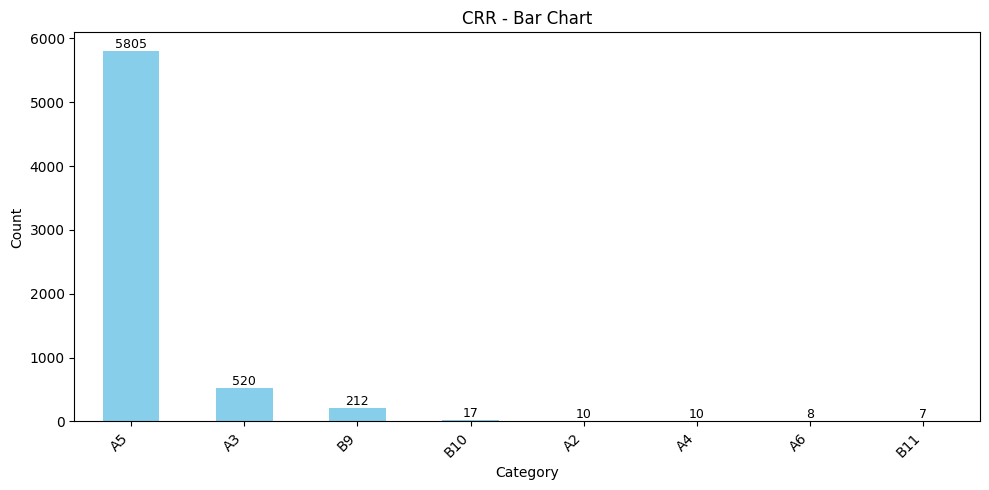

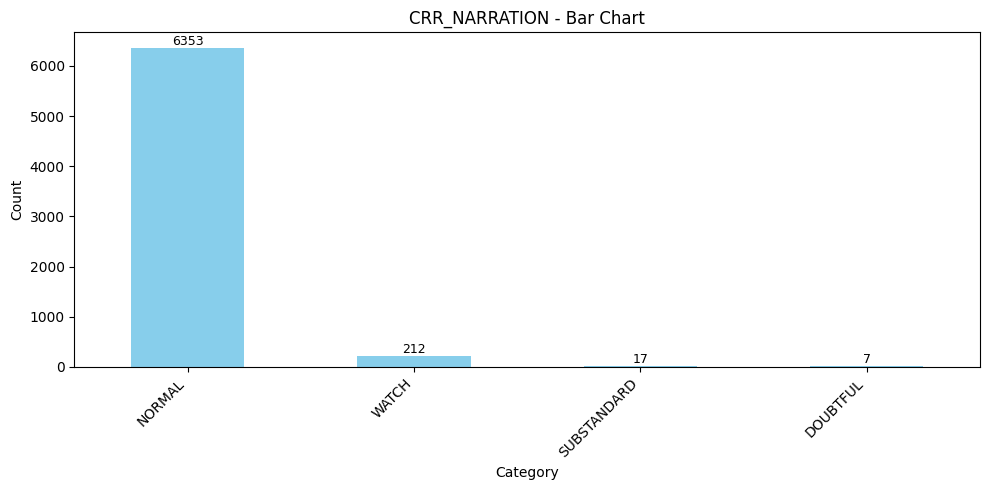

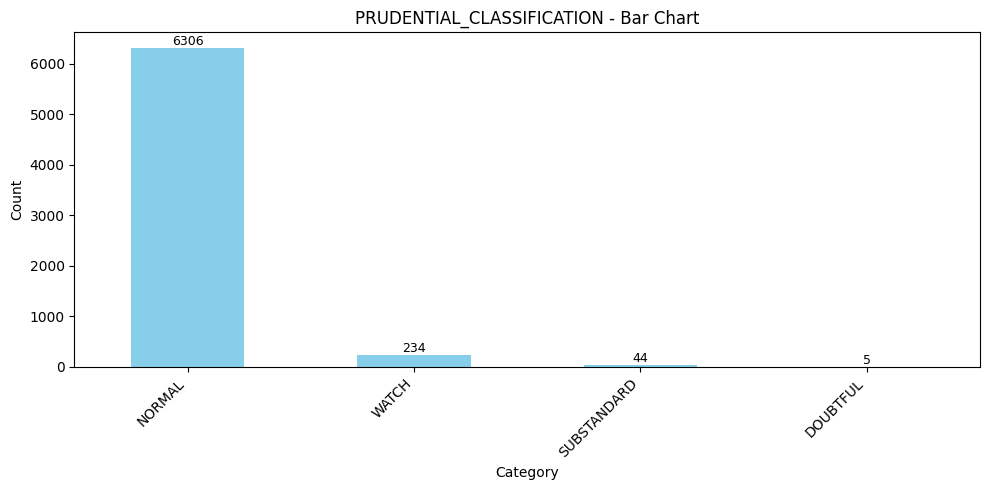

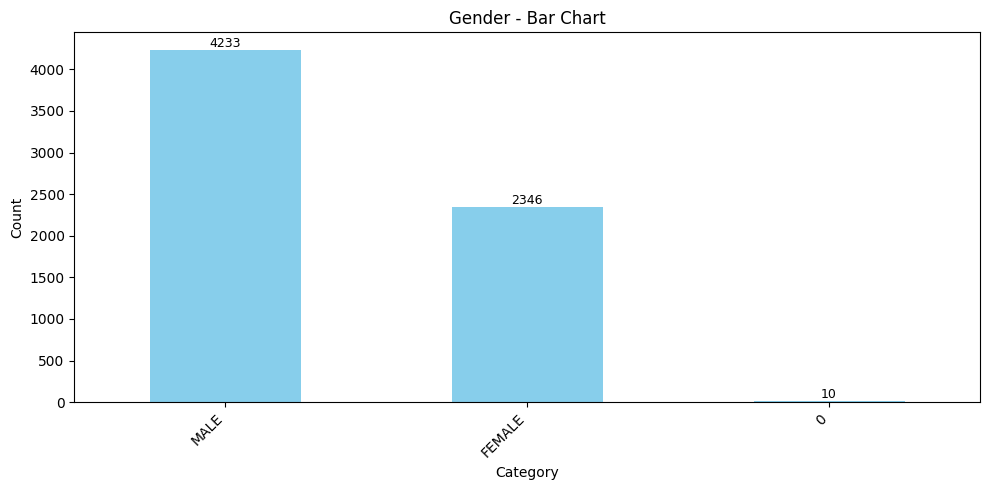

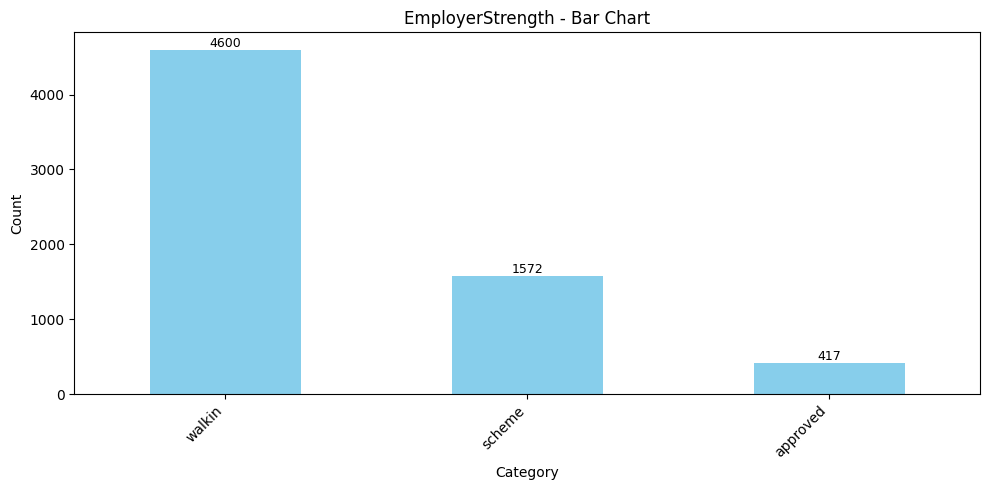

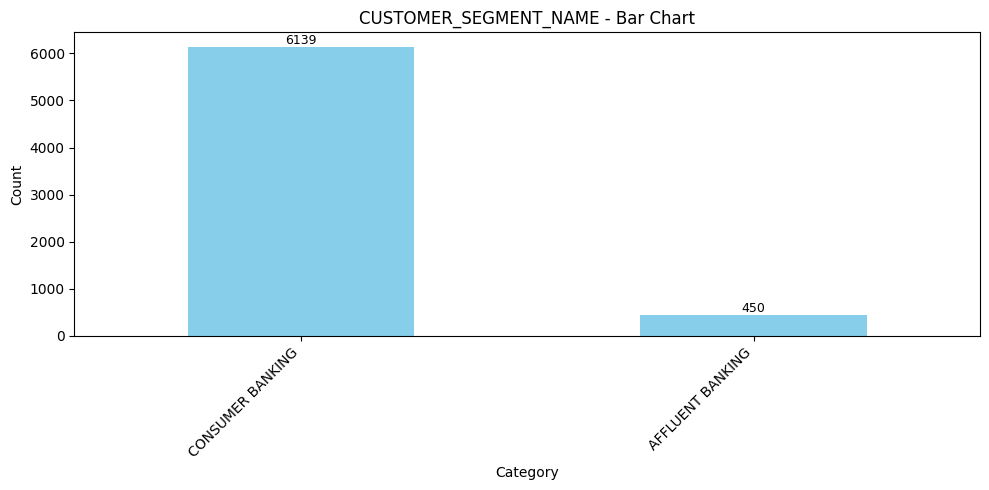

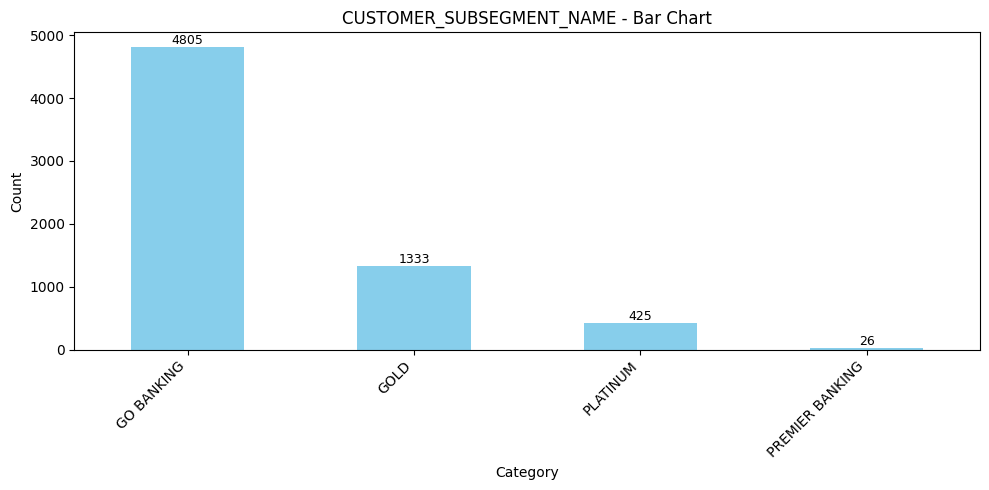

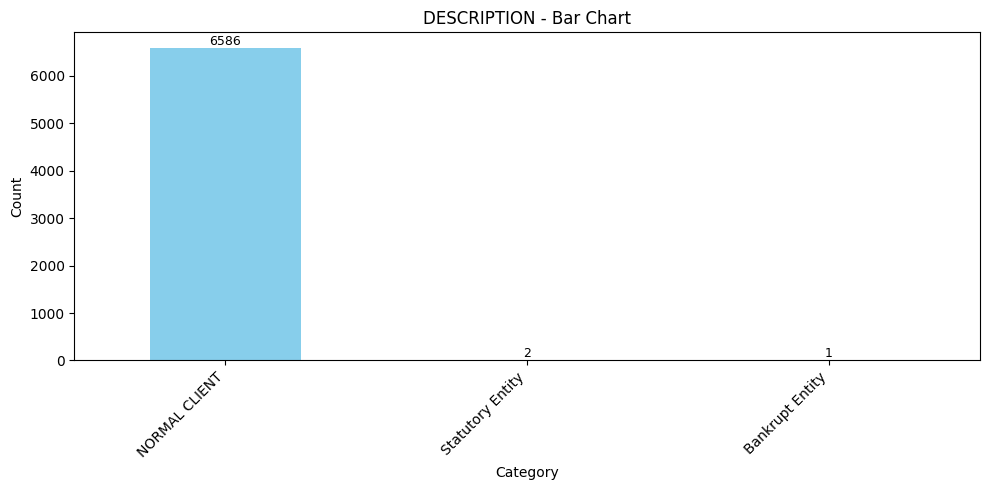

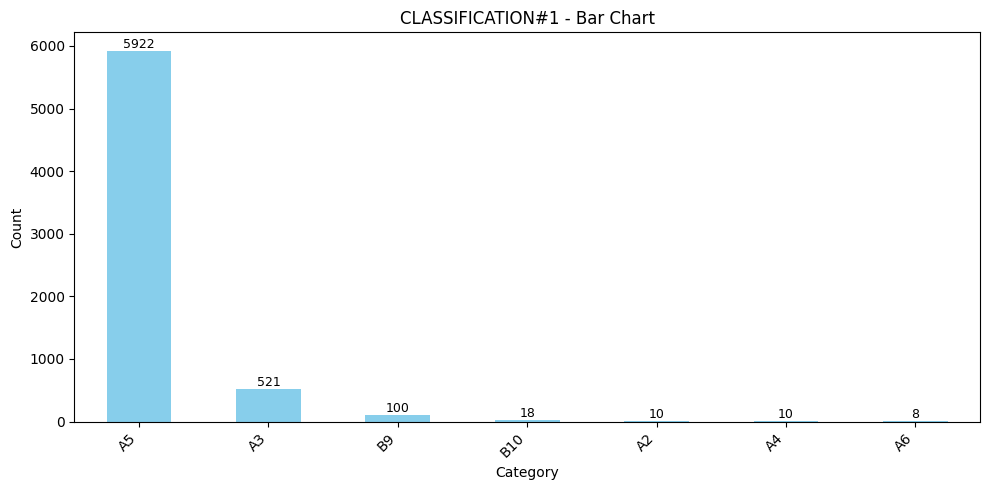

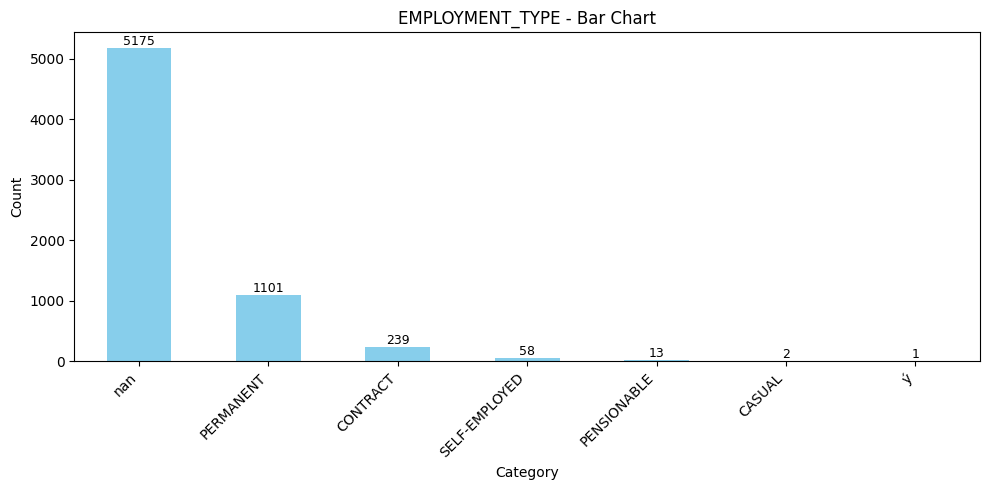

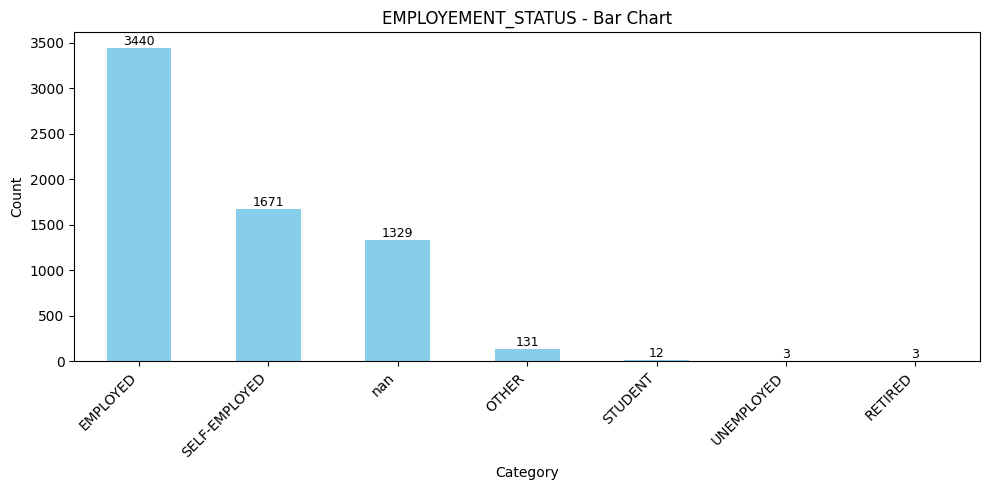

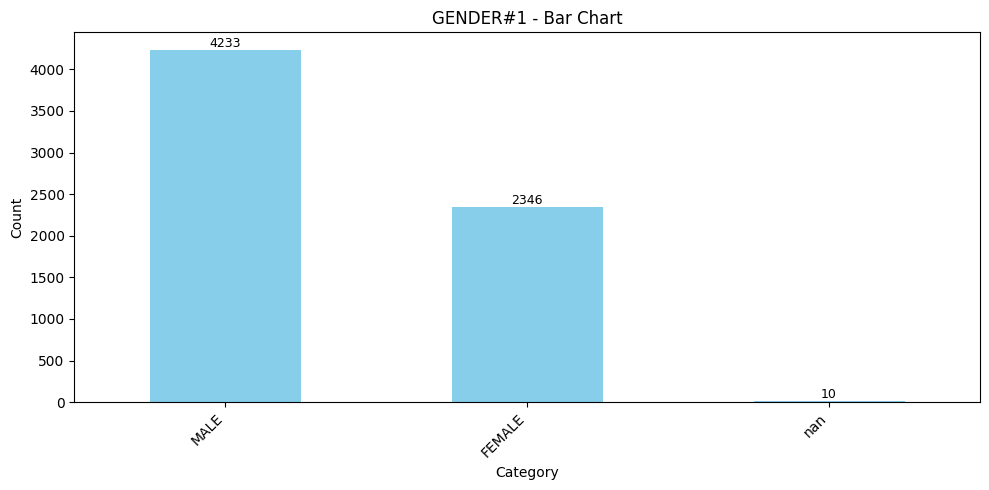

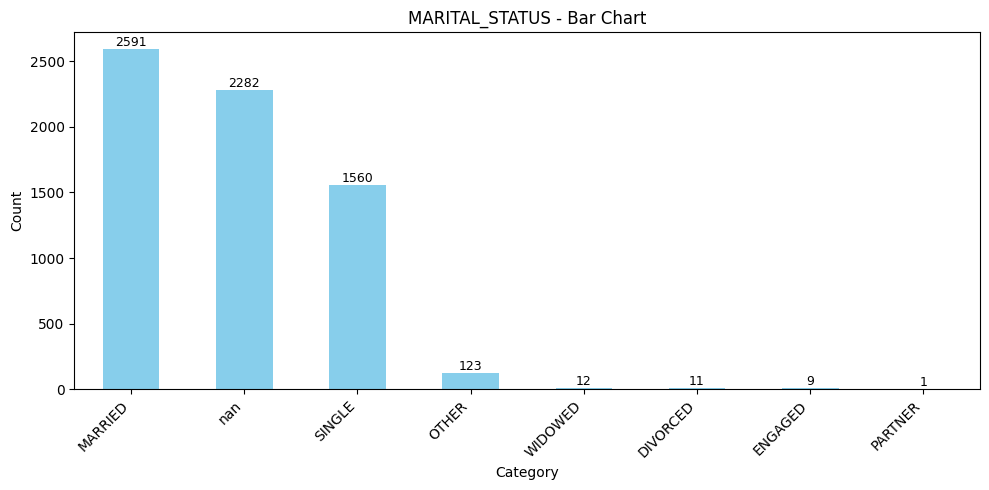

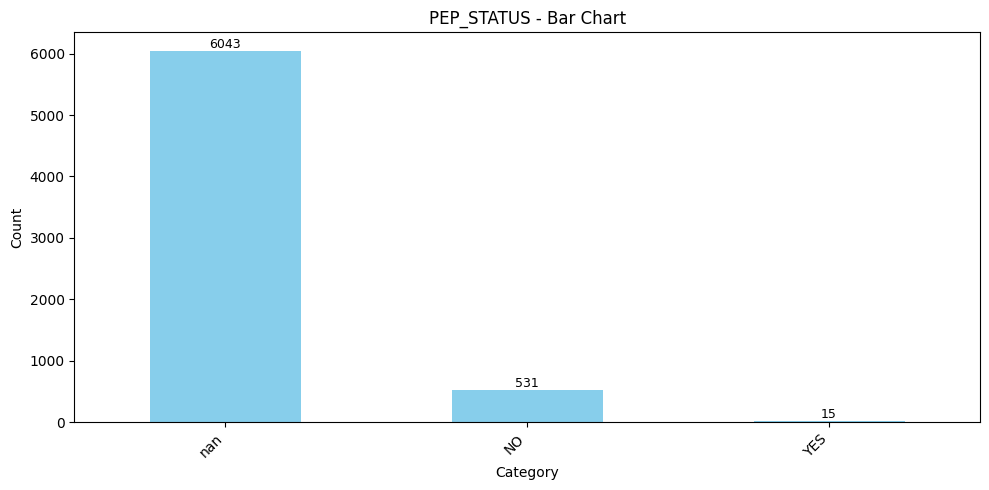

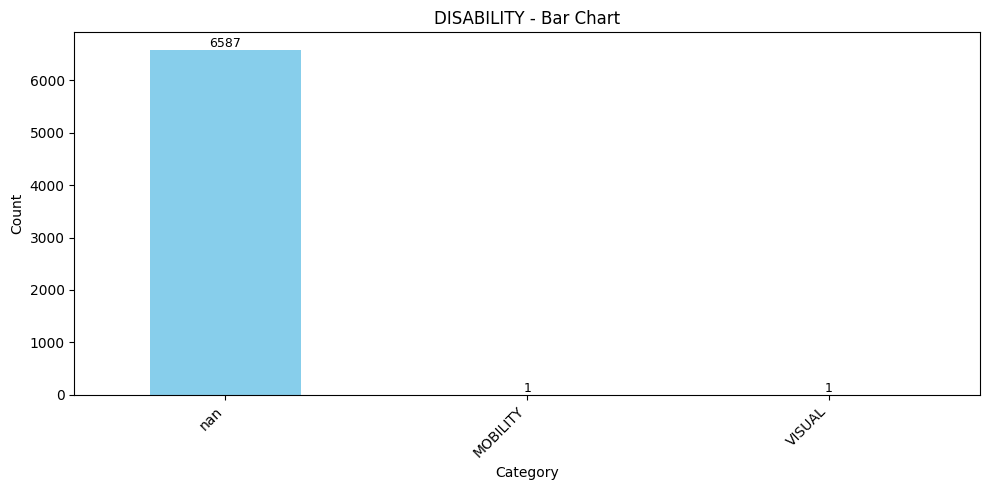

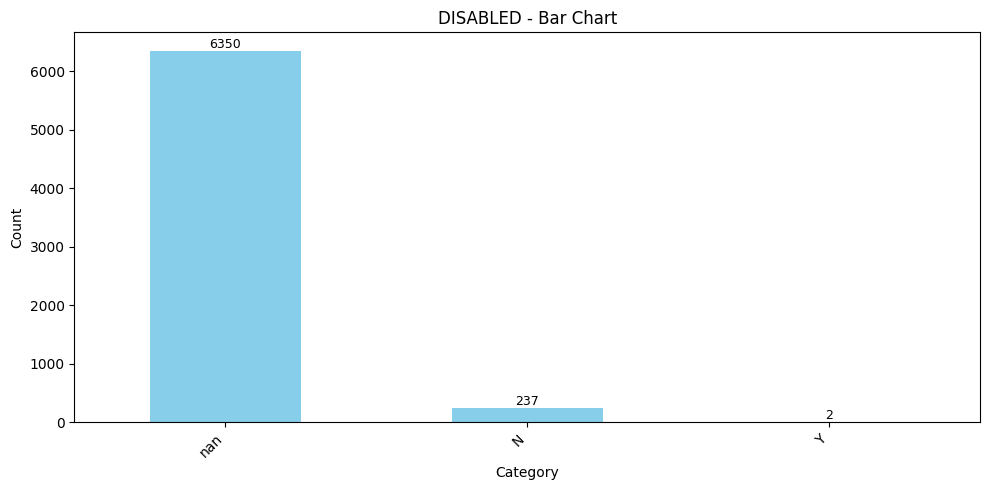

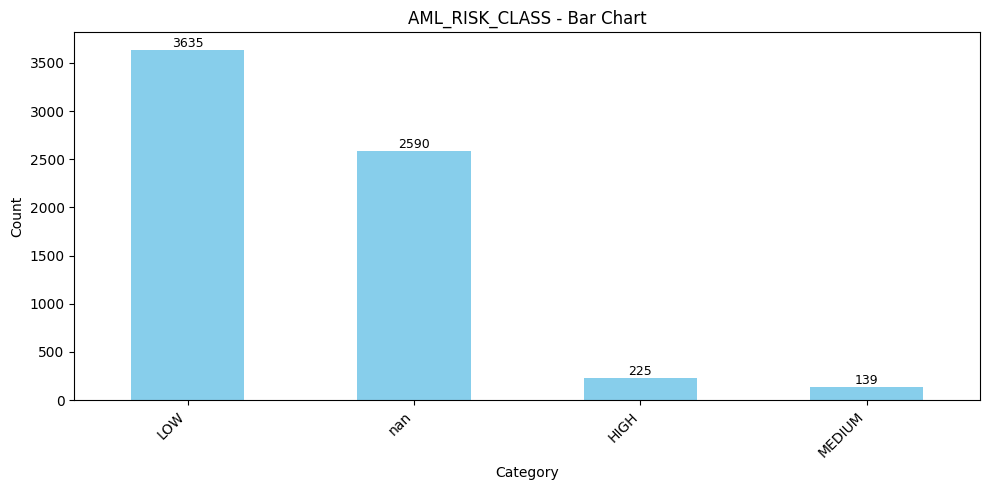

In [ ]:
def plot_categorical_data_bar_only(column, data):
    value_counts = data[column].value_counts(dropna=False)

    plt.figure(figsize=(10,5))
    ax = value_counts.plot(kind='bar', color='skyblue')

    plt.title(f'{column} - Bar Chart')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width()/2, p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

    plt.tight_layout()
    plt.show()

# Loop through categorical columns
categorical_columns = [
    col for col in df.select_dtypes(include='object').columns
    if df[col].nunique() <= 10
]

for col in categorical_columns:
    plot_categorical_data_bar_only(col, df)


**Comments**

A review of the categorical variables in the dataset provides important insights into borrower profiles, loan quality classifications, employment characteristics, and demographic attributes.

1. The credit rating variable CRR contains 8 unique categories (A2–A6, B9–B11) used internally to grade customer credit quality. Category A5 is the most frequent, appearing 5,805 times (≈88%), indicating that the majority of the loan book is classified in a mid-range risk tier.
2. Similarly, both CRR_NARRATION and PRUDENTIAL_CLASSIFICATION contain 4 categories (Normal, Watch, Substandard, Doubtful). The NORMAL category dominates with over 6,300 occurrences, reflecting that most accounts are performing according to bank and prudential standards.
3. Gender appears in three forms—Male, Female, and a small number of missing entries. Male customers constitute the largest share with 4,233 borrowers (≈64%).
4. Nationality is comparatively homogeneous, with Kenyan nationals (KE) comprising 6,551 customers, signalling that the dataset heavily represents domestic clientele.
5. Customers are grouped into two main banking segments: Consumer Banking and Affluent Banking. The dataset is overwhelmingly consumer driven, with 6,139 customers (93%) belonging to the Consumer Banking segment.
At the sub-segment level, there are four categories, with GO Banking being the most common, accounting for 4,805 customers (73%).
6. Employer strength is divided into Scheme, Approved, and Walk-in categories. Walk-ins make up the majority (4,600 customers; ≈70%), suggesting that many borrowers are unaffiliated with employer-based lending schemes and may present more diverse risk profiles.
7. EMPLOYMENT_TYPE has 6 categories (permanent, contract, casual, pensionable, self-employed, other). Only 1,414 customers have valid entries, and Permanent employees dominate (1,101; ≈78%), indicating stable income sources among those reporting this information.
8. EMPLOYEMENT_STATUS includes 6 categories (employed, unemployed, student, self-employed, retired, other). Out of 5,260 valid entries, Employed is the most common status, accounting for 3,440 customers (≈63%).
9. Marital Status-There are seven categories (single, engaged, partner, married, divorced, widowed, other). The majority of borrowers are married, with 2,591 customers (≈60%), suggesting that the dataset largely features borrowers in established households.
10. Variables relating to AML and disability status generally contain very high levels of missing data: PEP_STATUS has only 546 valid entries, with "No" accounting for 531. DISABILITY, OTHER_DISABILITY, AML_CHECK, and AML_RESULT have near-zero usable entries. DISABLED shows 6,350 missing values, with only 237 “N” entries and 2 “Y” entries, confirming near-absence of disability information. Given the extremely sparse population of these fields, they do not add meaningful predictive value and are candidates for removal during data cleaning.

In [ ]:
print(df.columns.tolist())


['IDENTIFIER', 'CRR', 'CRR_NARRATION', 'PRUDENTIAL_CLASSIFICATION', 'Max_REMAINING_TENOR(AllLoans)', 'RUNNING_LOANS_COUNT', 'MAX_DPD', 'Arrears_Amount', 'Exposure_Amount', 'NetIncome', 'OnUsEMI', 'CurrentBalanceAmount', 'DrTurnover', 'TotalAssets', 'MobileTotal', 'PastDueAmount', 'MaxArrears', 'CurrentArrears', 'NonPerforming', 'Gender', 'SavingAcctDepositCount', 'Age', 'CustomerTenure', 'EmployerStrength', 'SECTOR', 'NAME_1', 'CUSTOMER_SEGMENT_NAME', 'CUSTOMER_SUBSEGMENT_NAME', 'SECTOR_6', 'INDUSTRY', 'NATIONALITY', 'DESCRIPTION', 'CLASSIFICATION#1', 'EMPLOYMENT_TYPE', 'EMPLOYEMENT_STATUS', 'DATE_OF_BIRTH', 'GENDER#1', 'MARITAL_STATUS', 'CALC_RISK_CLASS', 'MANUAL_RISK_CLASS', 'PEP_STATUS', 'DISABILITY', 'DISABLED', 'OTHER_DISABILITY', 'AML_CHECK', 'AML_RESULT', 'AML_RISK_CLASS', 'CONTACT_DATE']


In [ ]:
#Checking for duplicates
duplicates = df.duplicated(subset=['IDENTIFIER'])
print(df[duplicates])

      IDENTIFIER CRR CRR_NARRATION PRUDENTIAL_CLASSIFICATION  \
193   8245690015  B9         WATCH                     WATCH   
590   5769230015  B9         WATCH                     WATCH   
1081  6111040017  B9         WATCH                     WATCH   
1112  4643360017  B9         WATCH               SUBSTANDARD   
1236  5910270012  B9         WATCH                     WATCH   
1408  7828830012  A5        NORMAL                     WATCH   
1571  5783070016  B9         WATCH                     WATCH   
1590  5021730017  B9         WATCH                     WATCH   
1725  5773890015  B9         WATCH                     WATCH   
1821  3919180029  A5        NORMAL                     WATCH   
2069  8721200019  B9         WATCH                     WATCH   
2196  5561420011  A5        NORMAL                     WATCH   
2417  3984220023  A5        NORMAL                     WATCH   
2586  5731750018  A5        NORMAL                     WATCH   
3015  4651100019  A5        NORMAL      

**Comments**

There are 20 customers who appear more than once, hence duplicates. We shall drop the duplicates.

###**v) Missing Values Analysis**

,Missing Values,Missing %
AML_RESULT,6589,100.00
MANUAL_RISK_CLASS,6589,100.00
AML_CHECK,6589,100.00
CALC_RISK_CLASS,6589,100.00
OTHER_DISABILITY,6589,100.00
DISABILITY,6587,99.97
DISABLED,6350,96.37
PEP_STATUS,6043,91.71
EMPLOYMENT_TYPE,5175,78.54
AML_RISK_CLASS,2590,39.31


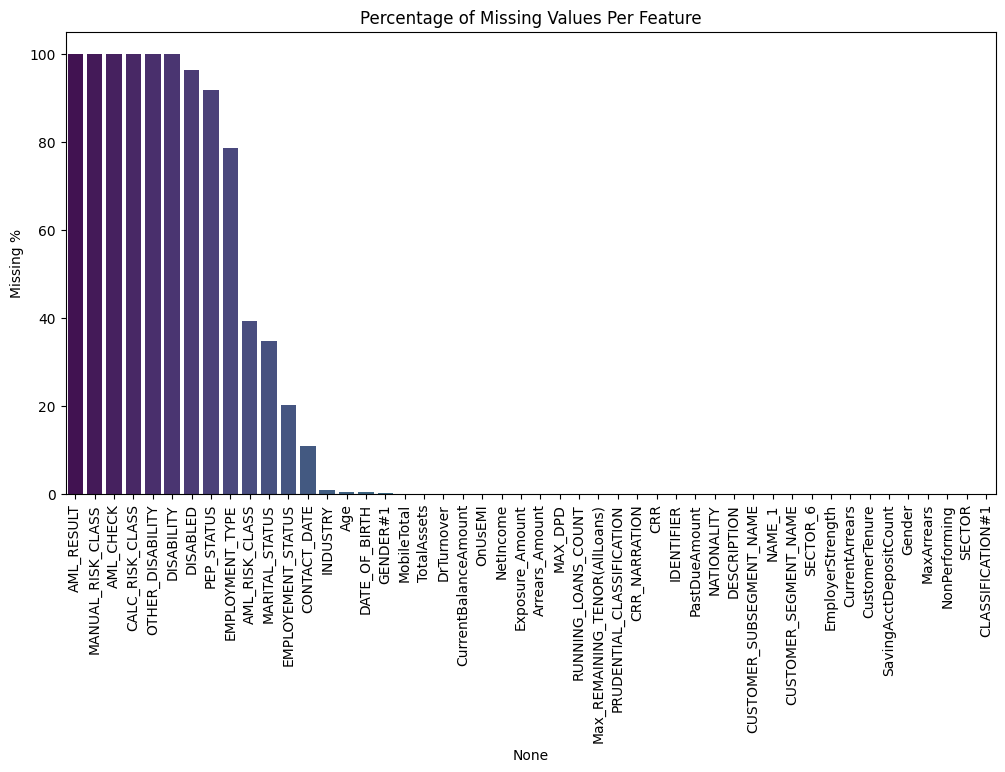


📌 FEATURES WITH MISSING VALUES > 50%


,Missing Values,Missing %
AML_RESULT,6589,100.00
MANUAL_RISK_CLASS,6589,100.00
AML_CHECK,6589,100.00
CALC_RISK_CLASS,6589,100.00
OTHER_DISABILITY,6589,100.00
DISABILITY,6587,99.97
DISABLED,6350,96.37
PEP_STATUS,6043,91.71
EMPLOYMENT_TYPE,5175,78.54


In [ ]:

missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing %', ascending=False)

display(missing_summary)

# Visualization of missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=missing_summary.index, y=missing_summary['Missing %'], palette='viridis')
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values Per Feature")
plt.show()

print("\n======================================================")
print("📌 FEATURES WITH MISSING VALUES > 50%")
print("======================================================")
display(missing_summary[missing_summary['Missing %'] > 50])



**Comments**

1. The missing value analysis reveals that several fields such as AML_RESULT, AML_CHECK, OTHER_DISABILITY, MANUAL_RISK_CLASS, CALC_RISK_CLASS, and DISABILITY—are 100% missing, indicating that although these fields exist in the system, the data was never captured during onboarding or loan processing.
2. Other variables, including DISABLED, PEP_STATUS, and EMPLOYEMENT_STATUS, also exhibit extremely high levels of missingness, making them unreliable for modeling and necessitating their removal.
3. In addition, features like CONTACT_DATE, INDUSTRY, AGE, DATE_OF_BIRTH, and GENDER#1 contain only minimal missing values, which can be addressed through standard imputation techniques without compromising data quality.

###**vi) Outliers Inspection**

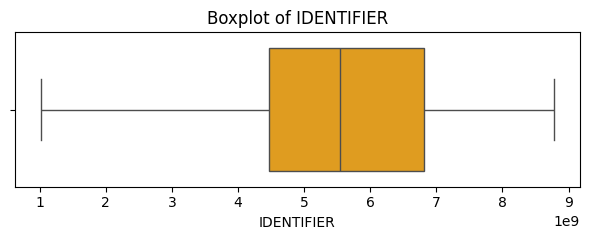

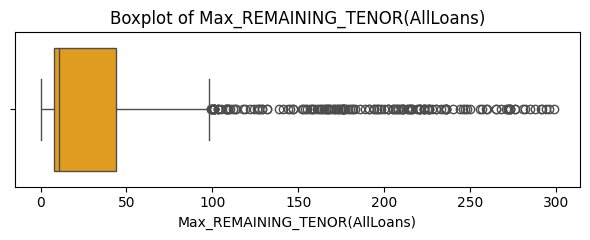

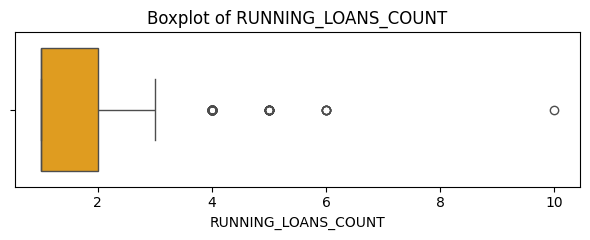

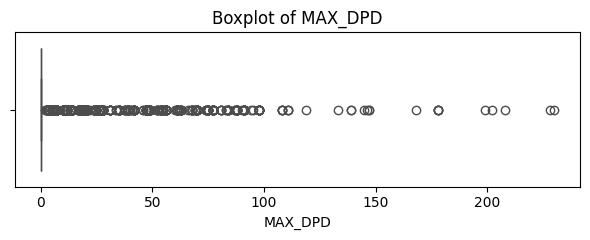

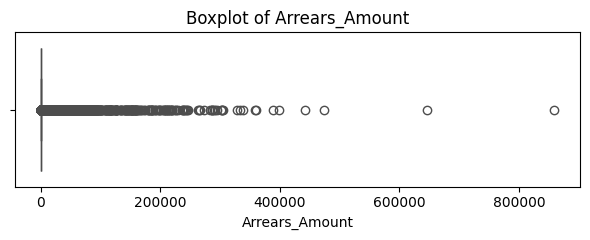

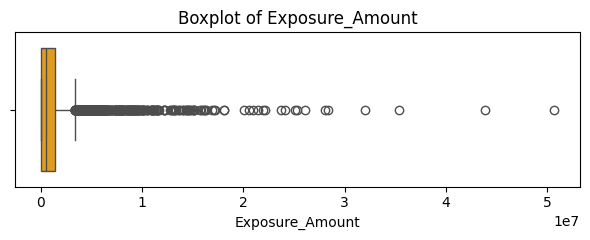

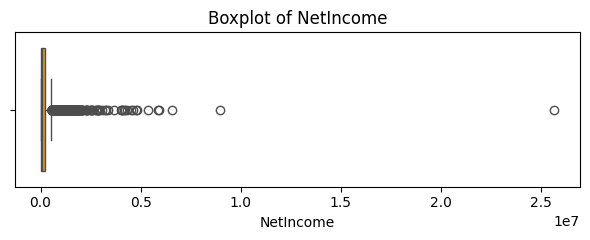

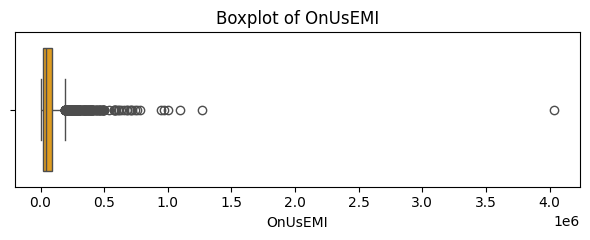

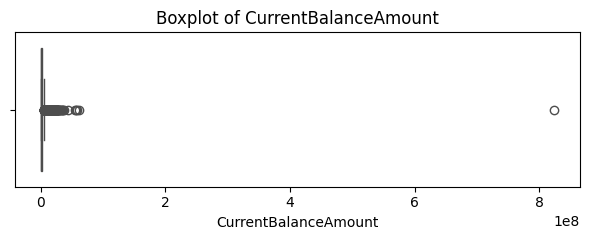

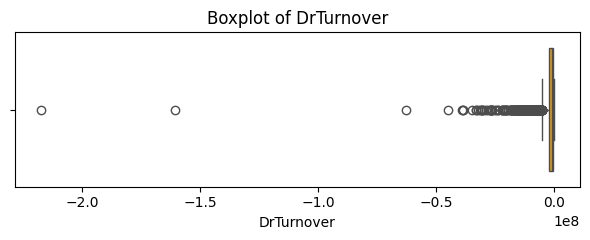

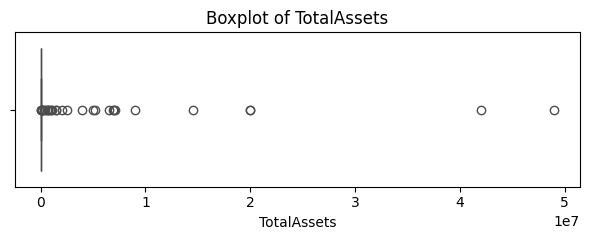

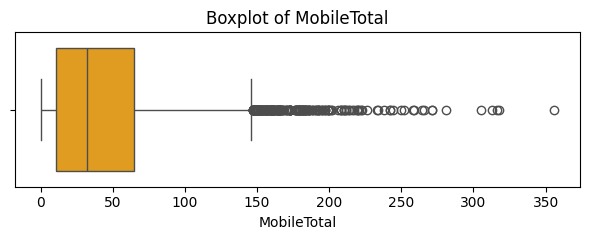

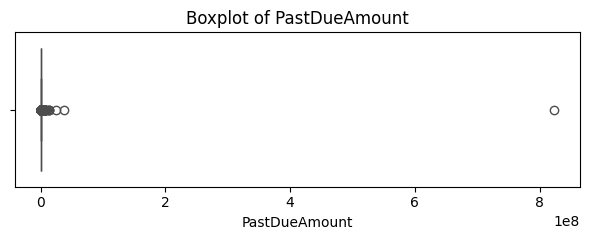

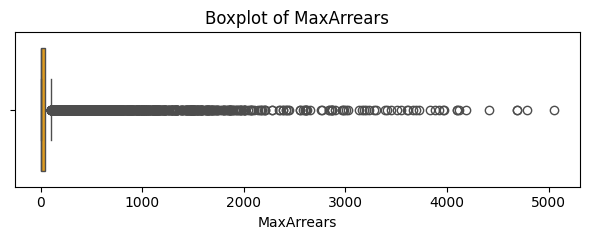

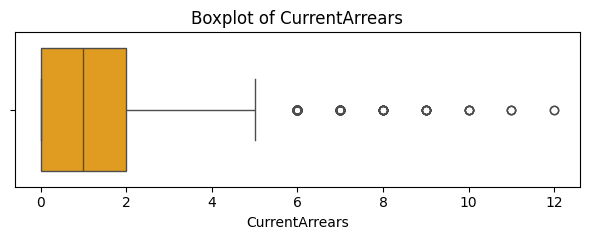

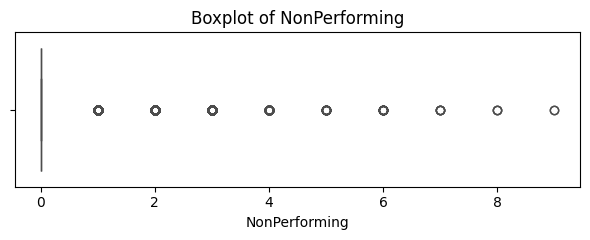

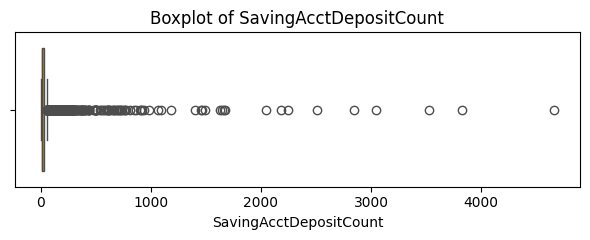

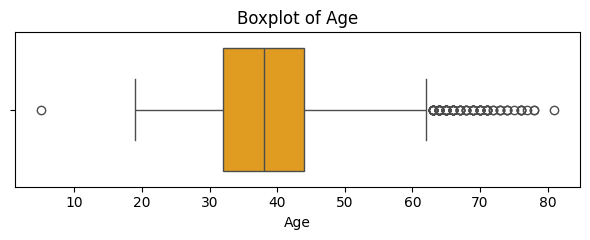

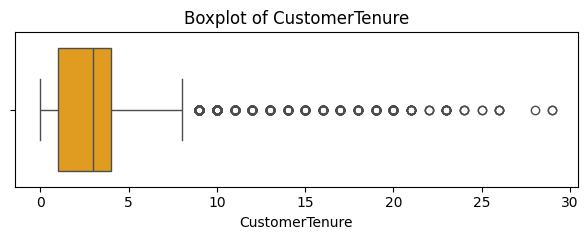

In [ ]:
numeric_cols = [
    col for col in df.select_dtypes(include=['float64', 'int64']).columns
    if df[col].dropna().shape[0] > 1     # must have 2+ real values
]

for col in numeric_cols:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



**Outlier Analysis Summary (Boxplot Interpretation)**

The boxplot inspection of numerical variables reveals substantial variability and the presence of extreme values across several financial features, a common characteristic in real-world lending datasets.

**1. Loan & Exposure Variables Show Heavy-Tailed Distributions**

Variables such as **Max Remaining Tenor**, **Exposure Amount**, **Arrears Amount**, **Past Due Amount**, **Current Balance Amount**, and **Net Income** exhibit large numbers of outliers stretching far to the right.

These outliers represent:
- High-value borrowers with significantly larger loan exposures
- Customers with severe delinquency (e.g. arrears up to 800K+)
- Income segments ranging from low-salary earners to high-net-worth individuals

This behaviour is expected in credit datasets and reflects portfolio heterogeneity, not necessarily data errors.

**2. Behavioural Variables (DPD, Arrears) Show Concentration at Zero**

Features like **MAX_DPD**, **CurrentArrears**, **MaxArrears**, and **NonPerforming** are heavily zero-inflated because most customers are performing.

Isolated high values signal:
- Chronic defaulters
- Customers under restructuring
- Long-overdue accounts

These outliers are meaningful indicators of risk and should not be removed.

**3. Account Activity Variables Show Strong Right Skew**

Variables such as:
- **SavingAcctDepositCount**
- **MobileTotal**
- **TotalAssets**
- **DrTurnover**

display large clusters near zero with outliers extending far to the right.  
This reflects natural differences in customer financial activity and liquidity behaviour.

**4. Demographic Variables Have Fewer Outliers**

- **Age** mostly ranges between 20–60, with one clear erroneous outlier (~5 years old), indicating a likely data-entry issue.
- **CustomerTenure** shows long-standing customers (10–30 years) as valid outliers.

These represent isolated data inconsistencies rather than systemic issues.

**5. IDENTIFIER Outliers Are Not Meaningful**

The **IDENTIFIER** column shows numeric variation but has no analytical meaning, as it is simply a unique customer ID.  
It will be excluded from modeling and outlier analysis.

**Overall Conclusion**

The observed outliers largely reflect genuine economic and behavioural diversity within the portfolio.  
Except for isolated data-quality issues, outliers are informative and will be handled using robust modeling techniques rather than removed.


In [ ]:
###**Outlier Detection- Z-score Method (|z| > 3)**

outlier_counts = {}

# If numeric_cols not defined, infer automatically
if "numeric_cols" not in globals():
    numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    x = pd.to_numeric(df[col], errors="coerce")
    z = np.abs(stats.zscore(x, nan_policy="omit"))

    # Handle constant columns (std = 0)
    if np.isnan(z).all():
        outlier_counts[col] = 0
    else:
        outlier_counts[col] = (z > 3).sum()

outlier_df = (
    pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["Outlier Count"])
      .sort_values("Outlier Count", ascending=False)
)

display(outlier_df)


,Outlier Count
MAX_DPD,198
CustomerTenure,181
MaxArrears,172
CurrentArrears,153
Arrears_Amount,143
NonPerforming,131
Max_REMAINING_TENOR(AllLoans),129
Exposure_Amount,120
MobileTotal,102
RUNNING_LOANS_COUNT,95


**Comments**

The table above reports the number of observations with absolute Z-scores greater than 3 (|z| > 3) for each numeric feature. Higher counts indicate variables with heavier tails or extreme values.

**Key Observations**

**1. Behavioural Risk Variables Dominate Outliers**
- **MAX_DPD (198), MaxArrears (172), CurrentArrears (153), NonPerforming (131)**
- These variables are zero-inflated for performing customers, with a small subset of accounts exhibiting extreme delinquency.
- High outlier counts reflect **chronic defaulters, restructured accounts, or long-overdue loans**.
- These outliers are **risk-informative and expected**, not data quality issues.

**2. Tenure and Loan Structure Effects**
- **CustomerTenure (181)** and **Max Remaining Tenor (129)** show many outliers due to:
  - Long-standing customers (10–30+ years)
  - Long-dated loan products
- These values reflect **portfolio maturity and product diversity**.

**3. Exposure and Monetary Amounts Show Heavy Tails**
- **Exposure_Amount (120), Arrears_Amount (143), MobileTotal (102), DrTurnover (66), NetIncome (68)**
- Financial variables naturally exhibit **right-skewed distributions**, with a small number of high-value customers driving extreme values.
- This indicates **heterogeneous borrower size and cash-flow profiles**, not anomalies.

**4. Activity and Account Count Variables**
- **RUNNING_LOANS_COUNT (95), SavingAcctDepositCount (61)**
- Outliers correspond to customers with **multiple facilities or high transaction activity**.
- These represent **valid behavioural intensity differences**.

**5. Demographic Variables Are Largely Stable**
- **Age (48)** shows limited outliers, likely due to ** a data-entry error** or rare edge cases.
- **TotalAssets (13), CurrentBalanceAmount (9), PastDueAmount (2)** exhibit minimal extreme values, indicating stable distributions.

**6. No Meaningful Outliers in Classification or Flags**
- **IDENTIFIER, CALC_RISK_CLASS, MANUAL_RISK_CLASS, OTHER_DISABILITY, AML_CHECK, AML_RESULT** all report zero outliers.
- This is expected, as these are **categorical, binary, or identifier fields**, not continuous numeric measures.

**Overall Conclusion**

The Z-score results confirm that most outliers arise from **genuine economic behaviour and credit risk dynamics**, particularly in delinquency, exposure, and tenure variables.  
Except for minor demographic inconsistencies, **outliers should be retained and handled using robust or non-parametric models rather than removed**.


###**vi) Preliminary Correlation Analysis**

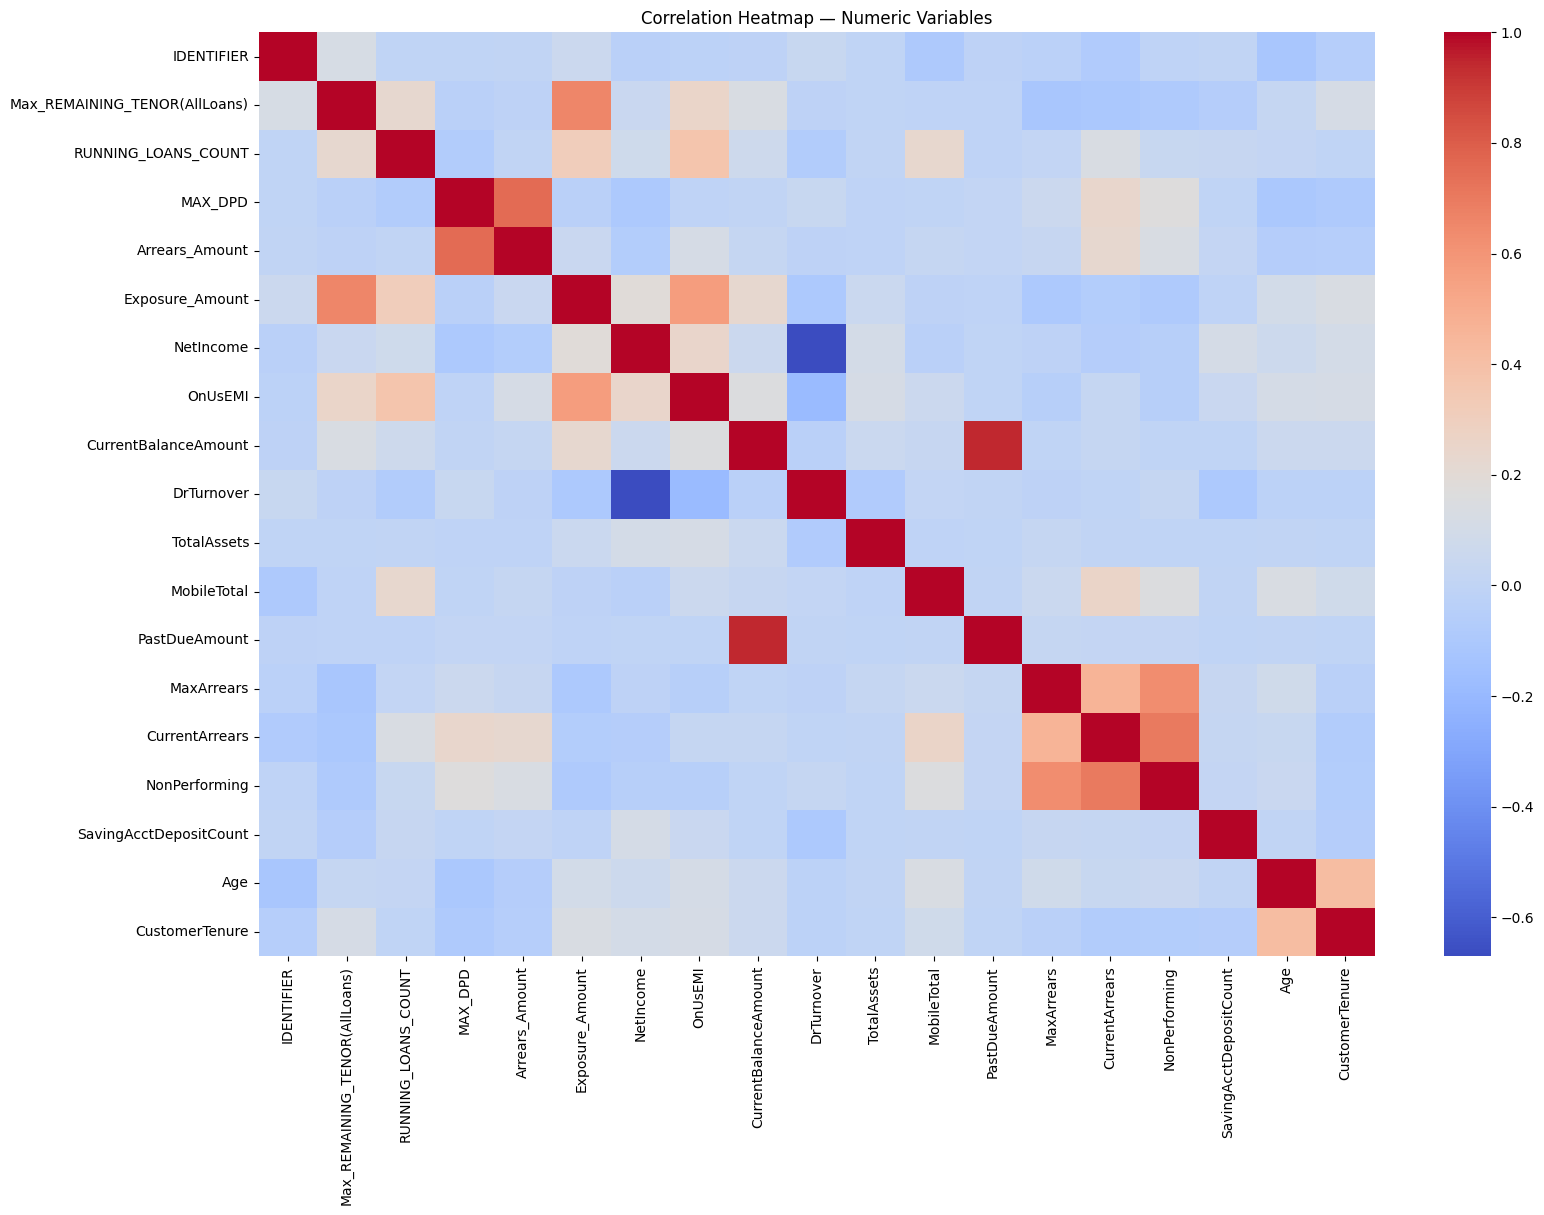

In [ ]:
plt.figure(figsize=(18,12))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap — Numeric Variables")
plt.show()

**Interpretation of the Correlation Heatmap (Numeric Variables)**

The correlation heatmap summarizes linear relationships (Pearson correlation) among numeric variables. Overall, most pairwise correlations are weak to moderate, indicating limited multicollinearity across the dataset, with a few expected structural relationships.

**Key Patterns Observed**

**1. Strong Correlations Among Delinquency Measures**
- **CurrentArrears, MaxArrears, NonPerforming** show strong positive correlations.
- This is expected, as these variables capture closely related aspects of repayment distress.
- These relationships indicate **shared risk information** rather than redundancy, but care is needed in linear models.

**2. Exposure and Repayment Structure Relationships**
- **Exposure_Amount** is moderately correlated with **OnUsEMI** and **Max Remaining Tenor (AllLoans)**.
- This reflects loan structure mechanics: larger exposures tend to have higher instalments and longer tenors.
- These correlations are economically intuitive and expected.

**3. Past Due and Balance Linkage**
- **PastDueAmount** shows a very strong correlation with **CurrentBalanceAmount**.
- This indicates that past due values are largely derived from or embedded within outstanding balances.
- One of these variables may be redundant.

**4. Income and Activity Effects**
- **NetIncome** exhibits a notable negative correlation with **DrTurnover**, suggesting inverse dynamics between reported income and debit turnover intensity for some customer segments.
- **MobileTotal** and **SavingAcctDepositCount** show mild correlations with exposure and arrears variables, reflecting transactional behavior differences.

**5. Demographic Relationships**
- **Age** and **CustomerTenure** are positively correlated, which is structurally expected.
- Their correlations with credit risk variables are weak, suggesting limited direct linear influence on default behavior.

**6. Low Correlation Across Most Features**
- The majority of variables show correlations close to zero.
- This suggests minimal multicollinearity risk and supports the use of a broad feature set, especially for non-linear models.

**7. Identifier and Classification Fields**
- **IDENTIFIER** shows no meaningful correlation with other variables, confirming it is non-informative and should be excluded.
- **CALC_RISK_CLASS** and **MANUAL_RISK_CLASS** appear weakly correlated with raw financial variables, as expected for derived or categorical risk indicators.

**Overall Conclusion**

The heatmap confirms that correlations largely reflect **expected economic and behavioral relationships** rather than data leakage or redundancy.  
Only closely related variables will require careful handling in modelling, while the broader feature set is suitable for robust and non linear modeling approaches.

###**vii) Target Variable Feature Engineering**

Target variable created:
target_default
0    6287
1     302
Name: count, dtype: int64


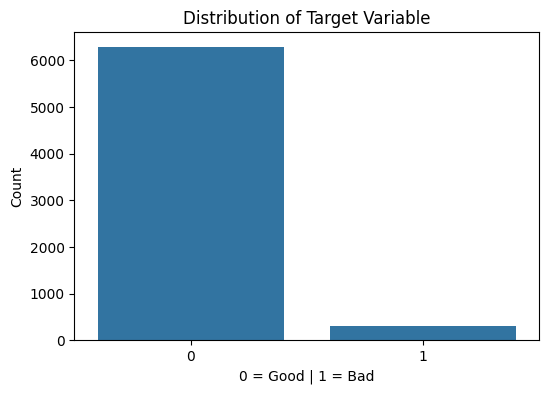


Class Balance:
target_default
0   0.95
1   0.05
Name: proportion, dtype: float64


In [ ]:
# Target definition

DPD_CUTOFF = 30
TARGET_COL = "target_default"

# Create target
df[TARGET_COL] = (df["MAX_DPD"] > DPD_CUTOFF).astype(int)

print("Target variable created:")
print(df[TARGET_COL].value_counts())

# Target Variable Distribution

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df[TARGET_COL])
ax.set_title("Distribution of Target Variable")
ax.set_xlabel("0 = Good | 1 = Bad")
ax.set_ylabel("Count")
plt.show()

print("\nClass Balance:")
print(df[TARGET_COL].value_counts(normalize=True).round(4))



**Comments**

**Target Variable Creation and Distribution**

The target variable **`target_default`** was created to represent credit default status, where:

- **0 = Good (Non-defaulting)**
- **1 = Bad (Defaulting)**

**Class Distribution**

The resulting class counts are:

- **Good (0): 6,287 observations**
- **Bad (1): 302 observations**

This corresponds to the following class proportions:

- **Good (0): 95.4%**
- **Bad (1): 4.6%**

**Interpretation**

The target variable exhibits **significant class imbalance**, which is typical in real-world credit risk datasets where the majority of customers remain performing and only a small fraction default.

The low default rate reflects:
- Conservative lending practices
- Strong portfolio performance
- Regulatory default definitions (e.g. 90+ DPD) capturing only severe distress cases

**Modeling Implications**

- Standard accuracy metrics may be misleading due to the dominance of the majority class.
- Model evaluation should emphasize **recall, precision, F1-score, ROC-AUC, and PR-AUC**.
- Class imbalance handling techniques (e.g. **class weighting, resampling, or SMOTE**) may be required during model training.
- The imbalance is retained at this stage to preserve the **true economic distribution of defaults**.

**Conclusion**

The constructed target variable is **well-defined, economically meaningful, and consistent with observed portfolio behavior**, providing a suitable foundation for subsequent supervised modeling.


###**viii) Relationship Between Numeric Variables & Target**

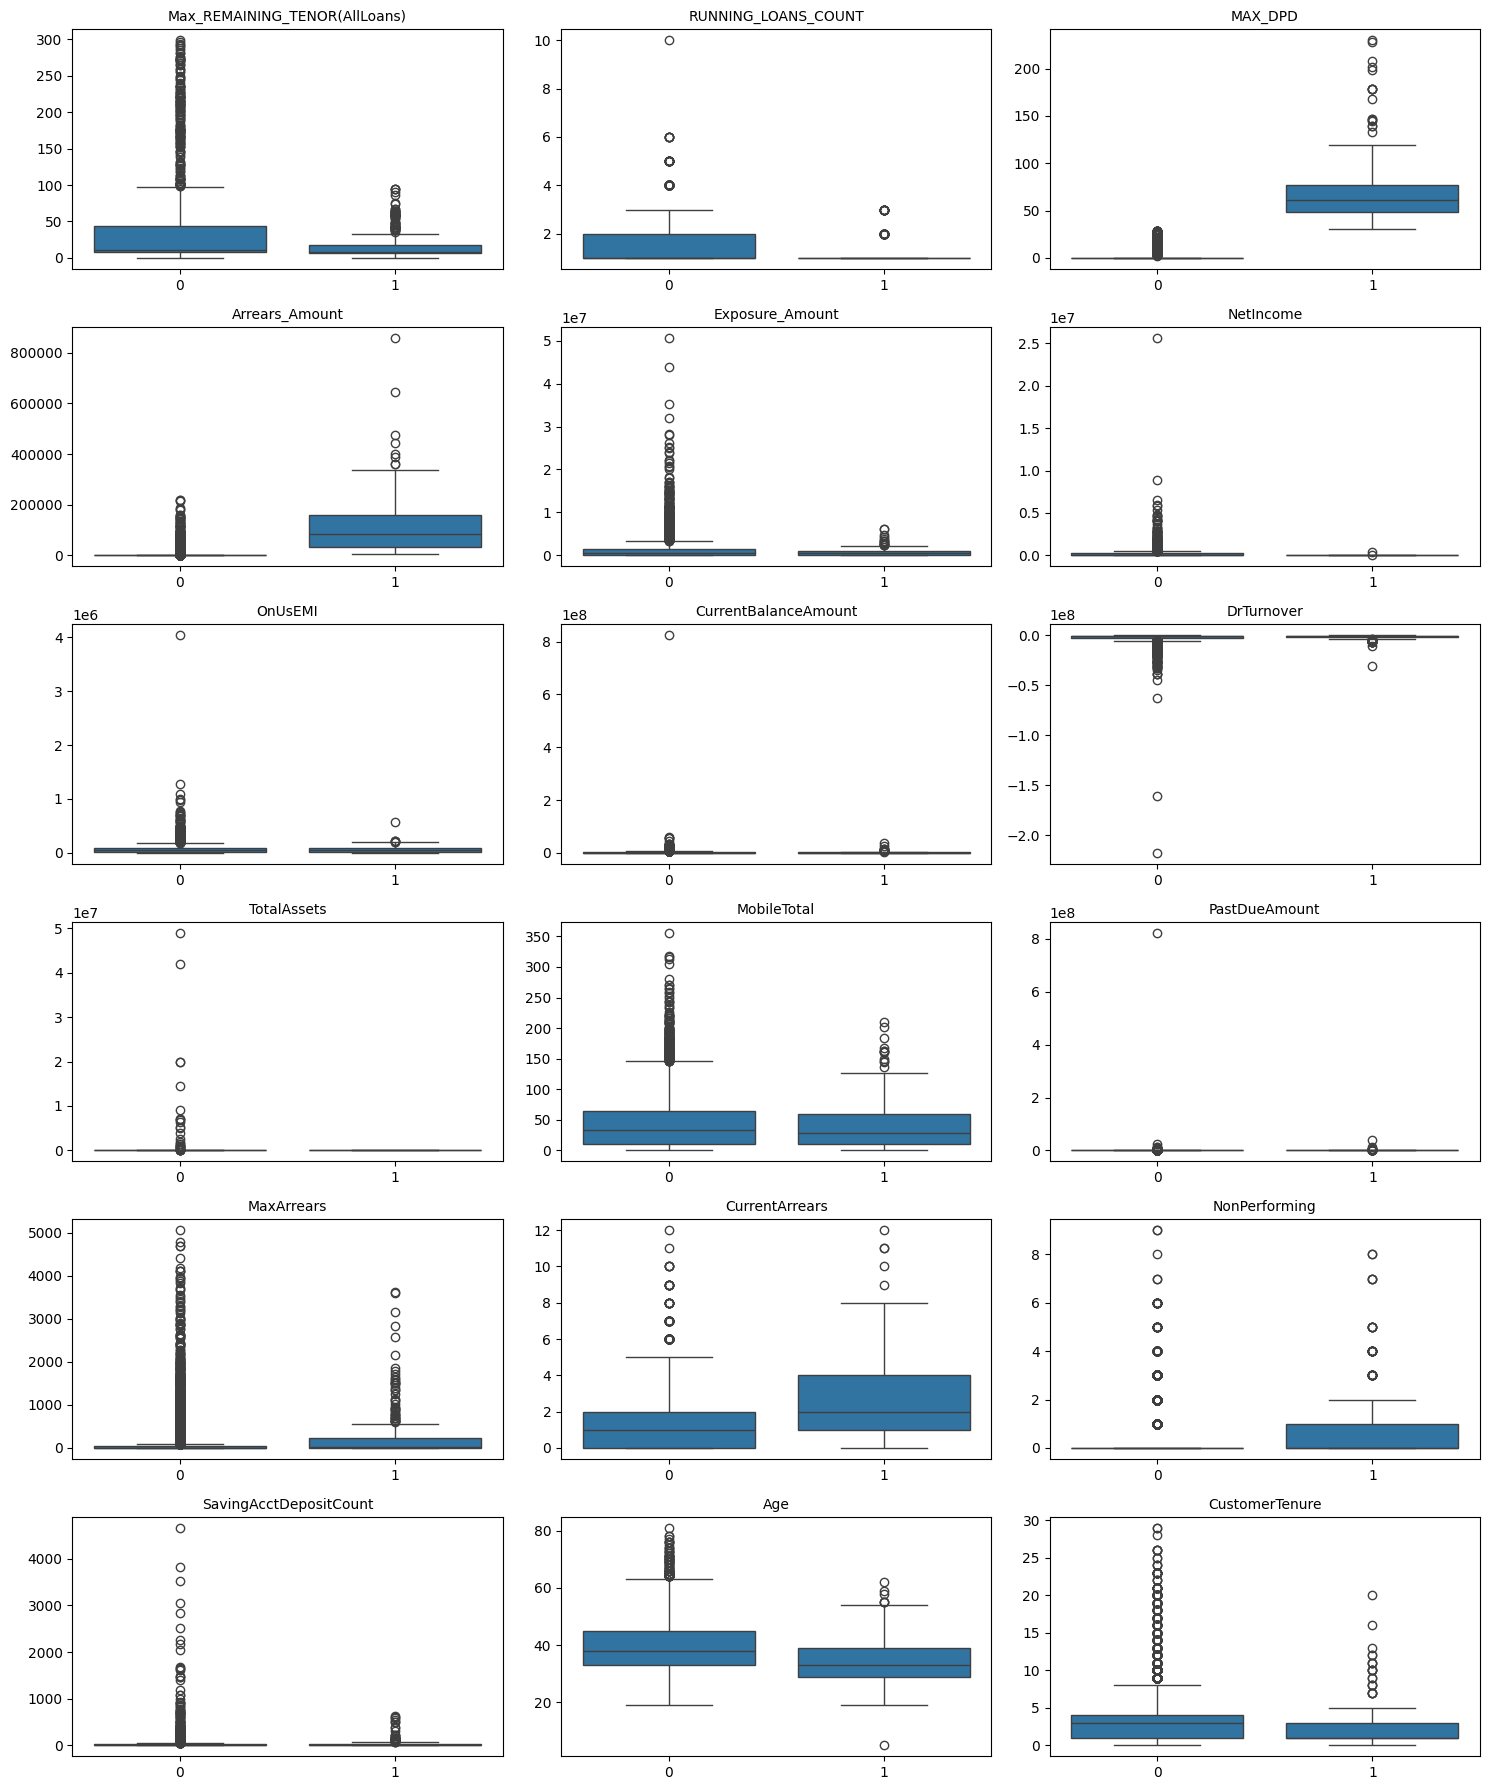

In [ ]:
# Select key numeric variables relevant for credit risk
# Key numeric variables
key_vars = [
    "Max_REMAINING_TENOR(AllLoans)",
    "RUNNING_LOANS_COUNT",
    "MAX_DPD",
    "Arrears_Amount",
    "Exposure_Amount",
    "NetIncome",
    "OnUsEMI",
    "CurrentBalanceAmount",
    "DrTurnover",
    "TotalAssets",
    "MobileTotal",
    "PastDueAmount",
    "MaxArrears",
    "CurrentArrears",
    "NonPerforming",
    "SavingAcctDepositCount",
    "Age",
    "CustomerTenure"
]

# Layout settings
cols = 3                              # plots per row
rows = math.ceil(len(key_vars) / cols)

plt.figure(figsize=(15, rows * 3))

for i, var in enumerate(key_vars, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x="target_default", y=var)
    plt.title(var, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

**Interpretation of Numeric Variables vs Target Default**

The boxplots compare the distributions of key numeric variables across the two target classes:
- **0 = Good (Non-defaulting)**
- **1 = Bad (Defaulting)**

Overall, the plots reveal **clear behavioural, exposure, and delinquency-based separation** between good and bad accounts, consistent with expected credit risk dynamics.

**1. Loan Structure & Exposure Variables**

- **Max Remaining Tenor** and **Running Loans Count** tend to be **lower for defaulted accounts**, suggesting that defaults are more common among shorter-tenor or fewer-loan customers rather than highly diversified borrowers.
- **Exposure Amount**, **Current Balance Amount**, and **OnUsEMI** show **higher dispersion and more extreme values among bad accounts**, indicating that larger obligations increase default risk.
- These distributions are **right-skewed**, reflecting portfolio heterogeneity rather than data errors.

**2. Delinquency & Behavioural Risk Variables**

- **MAX_DPD**, **Arrears Amount**, **MaxArrears**, **CurrentArrears**, and **NonPerforming** show the **strongest separation** between good and bad customers.
- Performing accounts cluster near zero, while defaulted accounts exhibit:
  - Higher medians
  - Wider interquartile ranges
  - Extreme right-tail values
- This confirms that delinquency-based variables are **highly predictive of default risk**.

**3. Income, Turnover & Liquidity Indicators**

- **NetIncome** shows a higher median for good accounts, while defaulted customers tend to cluster at lower income levels.
- **DrTurnover** shows very large differences between customers, even among well-performing ones, because people have very different spending and transaction patterns..
- **MobileTotal** and **SavingAcctDepositCount** show modest differences between classes, suggesting **secondary but complementary risk signals**.

**4. Assets & Wealth Indicators**

- **TotalAssets** displays heavy right tails, with a small number of high-asset customers driving outliers.
- Bad accounts generally show **lower asset buffers**, reinforcing the link between asset strength and repayment capacity.

**5. Demographic Variables**

- **Age** shows that defaulted customers tend to be **slightly younger**, though overlap between classes remains substantial.
- **CustomerTenure** indicates that longer-tenured customers are more likely to be performing, highlighting the stabilizing effect of long customer relationships.

**Key Takeaways**

- Delinquency and arrears variables provide the **clearest class separation**.
- Exposure, EMI, and balance variables exhibit **economically intuitive risk gradients**.
- Most variables are **heavily skewed**, implying that:
  - Outliers are informative
  - Robust or non-linear models are appropriate
- The observed patterns validate the constructed target variable and support its use for supervised credit risk modeling.

**Modeling Implications**

- Feature scaling or transformation (e.g. log transforms) may be required for linear models.
- Tree-based and ensemble models are well-suited to handle the observed skewness and non-linearity.
- No variables should be dropped solely based on visual outliers at this stage.



###**ix) Relationship Between Categorical Variables & Target**

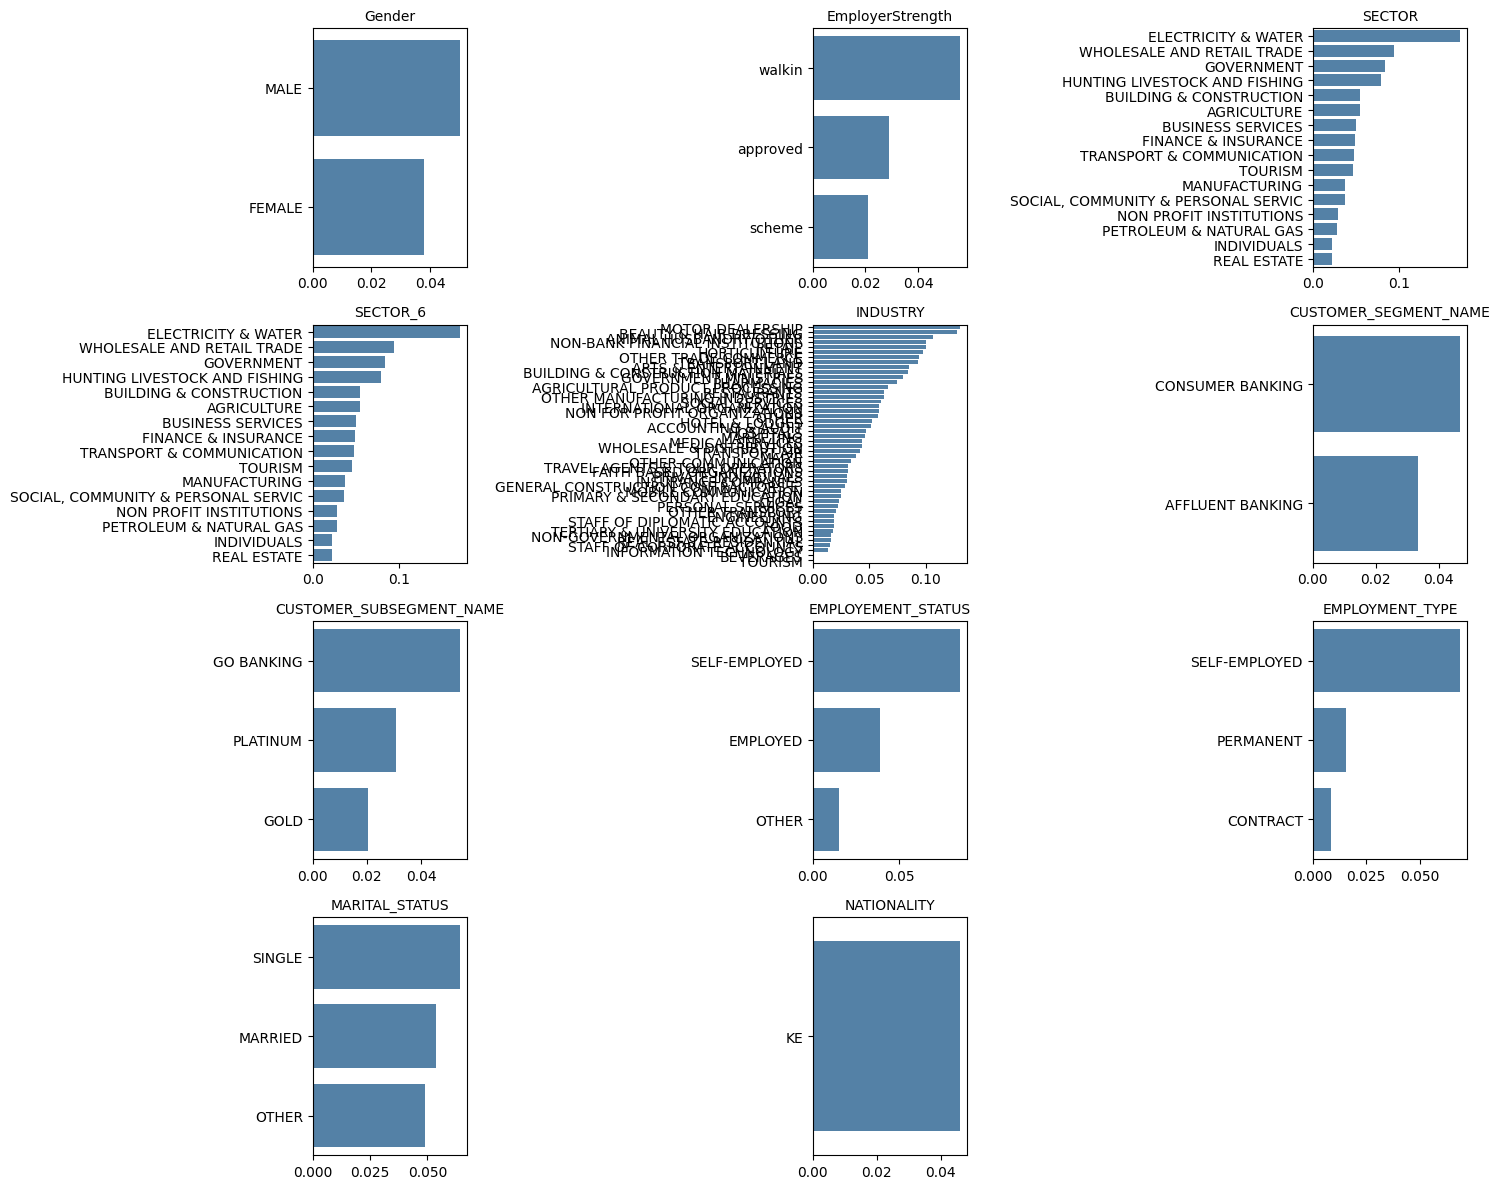

In [ ]:

# Selected categorical variables (based on data availability & relevance)
cat_vars = [
    "Gender",
    "EmployerStrength",
    "SECTOR",
    "SECTOR_6",
    "INDUSTRY",
    "CUSTOMER_SEGMENT_NAME",
    "CUSTOMER_SUBSEGMENT_NAME",
    "EMPLOYEMENT_STATUS",
    "EMPLOYMENT_TYPE",
    "MARITAL_STATUS",
    "NATIONALITY"
]

def default_rate_by_category(df, cat_col, target="target_default", min_count=30):
    summary = (
        df.groupby(cat_col)[target]
          .agg(count="count", default_rate="mean")
          .reset_index()
    )
    return summary[summary["count"] >= min_count] \
                  .sort_values("default_rate", ascending=False)

# Layout settings
cols = 3                                # plots per row
rows = math.ceil(len(cat_vars) / cols)  # number of rows

plt.figure(figsize=(15, rows * 3))

plot_idx = 1

for col in cat_vars:
    if col not in df.columns:
        continue

    summary = default_rate_by_category(df, col)

    if summary.empty:
        continue

    plt.subplot(rows, cols, plot_idx)
    sns.barplot(
        data=summary,
        x="default_rate",
        y=col,
        color="steelblue"
    )
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

    plot_idx += 1

plt.tight_layout()
plt.show()

**Categorical Variables vs Target Default**

Bivariate analysis was conducted to examine how default rates vary across key categorical variables related to sectoral exposure, employment characteristics, customer segmentation, and demographics. Default rates, defined as the proportion of defaulted accounts within each category, were used to ensure comparability across groups with different sample sizes. Categories with fewer than 30 observations were excluded to avoid unstable estimates.

1. **Gender**  
   Male customers exhibit a higher default rate than female customers, indicating that gender carries some discriminatory signal, though it should be treated as a secondary risk factor.

2. **Employer Strength**  
   Employer strength shows a strong relationship with default behaviour, with customers associated with weaker or non-approved employer categories exhibiting substantially higher default rates. This highlights employer strength as an important proxy for income stability and repayment capacity.

3. **Sector and SECTOR_6**  
   Default rates vary significantly across economic sectors. Utilities, wholesale and retail trade, and government-related sectors show relatively higher default rates, while sectors such as real estate and individual-based activities exhibit lower risk. Aggregated sector classifications (SECTOR_6) confirm these patterns while reducing noise from highly granular categories.

4. **Industry**  
   Industry-level analysis reveals wide dispersion in default rates across numerous categories. While industry contains meaningful risk signal, the large number of categories introduces sparsity, indicating the need for category consolidation prior to modeling.

5. **Customer Segment and Sub-Segment**  
   Customer segmentation variables are highly informative. Consumer Banking customers show higher default rates compared to Affluent Banking customers. Within sub-segments, GO Banking exhibits the highest default rate, followed by Platinum and Gold segments, consistent with expected wealth-based risk stratification.

6. **Employment Status**  
   Employment status displays clear risk differentiation, with self-employed customers exhibiting the highest default rates. This reflects income volatility and sensitivity to economic shocks.

7. **Employment Type**  
   Self-employed and contract-based customers show higher default rates than permanently employed individuals, reflecting differences in employment security.

8. **Marital Status**  
   Marital status exhibits moderate variation in default behaviour, with single customers displaying higher default rates relative to married customers, suggesting a modest demographic effect.

9. **Nationality**  
   Nationality shows limited discriminatory power due to the portfolio being heavily concentrated in a single category.

Overall, categorical variables related to sectoral exposure, employment characteristics, and customer segmentation exhibit the strongest separation in default behaviour and should be retained for feature engineering and modeling. Highly granular or weakly discriminative categories should be aggregated or deprioritised.

###**x) EDA Summary → Modeling Decisions**

The exploratory data analysis (EDA) findings were explicitly translated into concrete modeling decisions to ensure methodological consistency and informed feature engineering.

| EDA Finding | Modeling Decision |
|------------|------------------|
| Severe class imbalance between default and non-default observations | Apply class weighting and/or resampling techniques such as SMOTE; evaluate models using ROC-AUC, Recall, Precision, and F1-score rather than accuracy. |
| Heavy right skew in monetary variables (e.g. exposure, arrears, income) | Apply log or robust transformations for linear models; prefer tree-based models that naturally handle skewness. |
| Presence of extreme outliers with economic meaning | Retain outliers; avoid aggressive trimming and rely on robust or non-linear models. |
| Strong separation in delinquency-related variables | Retain delinquency variables as core predictors; monitor multicollinearity in linear models. |
| Moderate correlation among related numeric features | Use regularization techniques (L1/L2) or tree-based models; consider removing redundant variables if necessary. |
| Significant variation in default rates across sectors | Retain sector variables; use aggregated sector classifications to reduce sparsity. |
| High-cardinality categorical variables | Aggregate rare categories or apply target/impact encoding rather than one-hot encoding. |
| Customer segmentation variables show strong discriminatory power | Retain customer segment and sub-segment variables as key predictors. |
| Employment characteristics strongly associated with default risk | Retain employment status and employment type variables; encode appropriately. |
| Demographic variables show weaker but non-negligible signal | Retain as secondary predictors without over-weighting. |
| Variables with extreme missingness | Exclude from modeling due to insufficient information content. |
| Identifier and administrative fields | Drop from modeling as they carry no predictive meaning. |
| Minor data quality issues in age variable | Apply basic cleaning or winsorization; retain variable. |
| Evidence of non-linear relationships | Compare linear and non-linear models (e.g. Logistic Regression, Random Forest, XGBoost). |


##**C. Data Cleaning**

### **i) Create a copy of the dataset**

In [ ]:
df_clean = df.copy()

print("Starting shape:", df_clean.shape)


Starting shape: (6589, 49)


**Comments**

A copy of the original dataset is created to preserve the raw data, and the initial shape is printed to establish a baseline before data cleaning operations.


### **ii) Identify Duplicates and Drop them**

In [ ]:

# Count duplicate IDENTIFIER values
duplicates = df_clean.duplicated(subset="IDENTIFIER").sum()
print(f"Duplicate IDENTIFIERs found: {duplicates}")

# Remove duplicate records based on IDENTIFIER
df_clean = df_clean.drop_duplicates(subset="IDENTIFIER")

# Check resulting shape
print("Shape after removing duplicates:", df_clean.shape)



Duplicate IDENTIFIERs found: 20
Shape after removing duplicates: (6569, 49)


**Comments**

Duplicate customer records were identified and removed using the unique IDENTIFIER field to ensure each customer is represented only once in the cleaned dataset.


### **iii) Missing Values Treatment**

####**a) Calculate percentage of missing values and Drop columns with over 90% missing values for each column**

In [ ]:
# Calculate percentage of missing values for each column
missing_percentage = df_clean.isnull().mean() * 100

# Keep only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display results
print("Percentage of missing values for each column:")
print(missing_percentage)


Percentage of missing values for each column:
CALC_RISK_CLASS      100.00
AML_RESULT           100.00
MANUAL_RISK_CLASS    100.00
AML_CHECK            100.00
OTHER_DISABILITY     100.00
DISABILITY            99.97
DISABLED              96.36
PEP_STATUS            91.70
EMPLOYMENT_TYPE       78.51
AML_RISK_CLASS        39.28
MARITAL_STATUS        34.69
EMPLOYEMENT_STATUS    20.23
CONTACT_DATE          10.84
INDUSTRY               0.91
Age                    0.37
DATE_OF_BIRTH          0.37
GENDER#1               0.15
dtype: float64


In [ ]:
# Compute missing percentage
missing_percentage = df_clean.isnull().mean() * 100

# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > 90].index.tolist()

# Print columns BEFORE dropping
print("Columns to be dropped (>90% missing):")
print(columns_to_drop)

# Drop columns
df_clean = df_clean.drop(columns=columns_to_drop)

# Final shape
print("Shape after dropping columns:", df_clean.shape)

Columns to be dropped (>90% missing):
['CALC_RISK_CLASS', 'MANUAL_RISK_CLASS', 'PEP_STATUS', 'DISABILITY', 'DISABLED', 'OTHER_DISABILITY', 'AML_CHECK', 'AML_RESULT']
Shape after dropping columns: (6569, 41)


**Comments**

Columns with excessive missing values were removed based on both data completeness and redundancy considerations, as outlined below:

1. **Credit Classification–Related Variables**
   - `CALC_RISK_CLASS` (100% missing)
   - `MANUAL_RISK_CLASS` (100% missing)

   These variables were entirely missing across the dataset and provide similar information to existing classification fields such as `CRR` and `CRR_NARRATION`. As a result, they did not contribute additional usable information.

2. **Disability-Related Variables**
   - `DISABILITY` (99.97% missing)
   - `DISABLED` (96.36% missing)
   - `OTHER_DISABILITY` (100% missing)

   These variables exhibited extreme sparsity, making them unsuitable for reliable analysis or modeling.

3. **AML and PEP-Related Variables**
   - `PEP_STATUS` (91.7% missing)
   - `AML_CHECK` (100% missing)
   - `AML_RESULT` (100% missing)

   These variables were removed due to high missingness and because their information is consolidated within the `AML_RISK_CLASS` variable, which categorizes customers into low, medium, or high AML risk and incorporates PEP screening outcomes.

Overall, removing these columns improved data quality and reduced noise while preserving all relevant risk-related information required for subsequent analysis and modeling.


####**b) Drop duplicated columns or those that provide similar information or those not needed for Modelling**

Duplicated columns or those that provide similar information;

*   CRR
*   CRR_NARRATION
*   PRUDENTIAL_CLASSIFICATION
*   DESCRIPTION
*   CLASSIFICATION#1

Retain only CRR_NARRATION as all of the above descriptions refer to the risk classification of the customer.

Drop those not needed for modelling i.e. INDENTIFIER(account) (This was a unique identifier).

In [ ]:
#Drop Redundant and Non-Predictive Columns

# Columns providing overlapping risk classification information
# Retain only CRR_NARRATION
redundant_columns = [
    "CRR",
    "PRUDENTIAL_CLASSIFICATION",
    "DESCRIPTION",
    "CLASSIFICATION#1",
    "IDENTIFIER"  # unique identifier, not predictive
]

# Drop the specified columns
df_clean = df_clean.drop(columns=redundant_columns, errors="ignore")

# Check resulting shape
print("Columns dropped:", redundant_columns)
print("Shape after dropping redundant and non-predictive columns:", df_clean.shape)


Columns dropped: ['CRR', 'PRUDENTIAL_CLASSIFICATION', 'DESCRIPTION', 'CLASSIFICATION#1', 'IDENTIFIER']
Shape after dropping redundant and non-predictive columns: (6569, 36)


##**C. Feature Engineering-Feature creation and extraction**

### **i) Drop duplicated columns after confirming that the data matches**

This include; Age and DATE_OF_BIRTH, Gender and GENDER#1, CustomerTenure and CONTACT_DATE. Retain Age, Gender and CustomerTenure

In [ ]:
#Validate Age Using Date of Birth (As at May 2024)

# Ensure DATE_OF_BIRTH is in datetime format
df_clean["DATE_OF_BIRTH"] = pd.to_datetime(df_clean["DATE_OF_BIRTH"], errors="coerce")

# Set reference date to data extraction period (May 2024)
reference_date = datetime(2024, 5, 1)

# Calculate age as at May 2024
df_clean["CALCULATED_AGE"] = (
    reference_date.year - df_clean["DATE_OF_BIRTH"].dt.year
)

# Check if reported Age matches calculated age
df_clean["AGE_MATCHES_MAY2024"] = (
    df_clean["Age"] == df_clean["CALCULATED_AGE"]
)

# Display validation sample
print("Age validation check (as at May 2024):")
print(df_clean[["Age", "CALCULATED_AGE", "AGE_MATCHES_MAY2024"]].head())


Age validation check (as at May 2024):
    Age  CALCULATED_AGE  AGE_MATCHES_MAY2024
0 52.00           52.00                 True
1 50.00           51.00                False
2 49.00           49.00                 True
3 51.00           52.00                False
4 45.00           46.00                False


**Comments**

Customer age was recalculated using May 2024 as the reference date (data extraction point) and compared against the reported age to assess consistency and temporal accuracy.


In [ ]:
df_clean.columns

Index(['CRR_NARRATION', 'Max_REMAINING_TENOR(AllLoans)', 'RUNNING_LOANS_COUNT',
       'MAX_DPD', 'Arrears_Amount', 'Exposure_Amount', 'NetIncome', 'OnUsEMI',
       'CurrentBalanceAmount', 'DrTurnover', 'TotalAssets', 'MobileTotal',
       'PastDueAmount', 'MaxArrears', 'CurrentArrears', 'NonPerforming',
       'Gender', 'SavingAcctDepositCount', 'Age', 'CustomerTenure',
       'EmployerStrength', 'SECTOR', 'NAME_1', 'CUSTOMER_SEGMENT_NAME',
       'CUSTOMER_SUBSEGMENT_NAME', 'SECTOR_6', 'INDUSTRY', 'NATIONALITY',
       'EMPLOYMENT_TYPE', 'EMPLOYEMENT_STATUS', 'DATE_OF_BIRTH', 'GENDER#1',
       'MARITAL_STATUS', 'AML_RISK_CLASS', 'CONTACT_DATE', 'target_default',
       'CALCULATED_AGE', 'AGE_MATCHES_MAY2024'],
      dtype='object')

In [ ]:
#We note some minor difference above between Age and CALCULATED_AGE but not significant as the difference is less than 1 years.
#This is attributed to rounding off
#We therefore replace Age with CALCULATED_AGE and then drop DATE_OF_BIRTH

# Replace Age with CALCULATED_AGE
df_clean["Age"] = df_clean["CALCULATED_AGE"]

# Drop intermediate and validation columns
df_clean.drop(
    columns=[
        "DATE_OF_BIRTH",
        "CALCULATED_AGE",
        "AGE_MATCHES_MAY2024"
    ],
    inplace=True
)

# Confirm final schema
print("Final columns after age cleanup:")
print(df_clean.columns)




Final columns after age cleanup:
Index(['CRR_NARRATION', 'Max_REMAINING_TENOR(AllLoans)', 'RUNNING_LOANS_COUNT',
       'MAX_DPD', 'Arrears_Amount', 'Exposure_Amount', 'NetIncome', 'OnUsEMI',
       'CurrentBalanceAmount', 'DrTurnover', 'TotalAssets', 'MobileTotal',
       'PastDueAmount', 'MaxArrears', 'CurrentArrears', 'NonPerforming',
       'Gender', 'SavingAcctDepositCount', 'Age', 'CustomerTenure',
       'EmployerStrength', 'SECTOR', 'NAME_1', 'CUSTOMER_SEGMENT_NAME',
       'CUSTOMER_SUBSEGMENT_NAME', 'SECTOR_6', 'INDUSTRY', 'NATIONALITY',
       'EMPLOYMENT_TYPE', 'EMPLOYEMENT_STATUS', 'GENDER#1', 'MARITAL_STATUS',
       'AML_RISK_CLASS', 'CONTACT_DATE', 'target_default'],
      dtype='object')


**Comments**

Minor discrepancies between reported age and calculated age (≤1 years) were attributed to rounding effects; therefore, the recalculated age was retained and all date-derived validation fields were removed.


In [ ]:
# Validate Gender Consistency

# Compare gender fields after converting to string
df_clean["GENDER_MATCHES"] = (
    df_clean["Gender"].astype(str).str.strip().str.upper()
    == df_clean["GENDER#1"].astype(str).str.strip().str.upper()
)

# Display validation results
print("Gender consistency check:")
print(df_clean[["Gender", "GENDER#1", "GENDER_MATCHES"]].head())



Gender consistency check:
   Gender GENDER#1  GENDER_MATCHES
0  FEMALE   FEMALE            True
1  FEMALE   FEMALE            True
2  FEMALE   FEMALE            True
3  FEMALE   FEMALE            True
4    MALE     MALE            True


In [ ]:
df_clean["GENDER_MATCHES"].value_counts(normalize=True) * 100

,proportion
GENDER_MATCHES,
True,99.85
False,0.15


In [ ]:
df_clean.loc[
    df_clean["GENDER_MATCHES"] == False,
    ["Gender", "GENDER#1"]
]


,Gender,GENDER#1
845,0,NaN
1227,0,NaN
1749,0,NaN
1851,0,NaN
3914,0,NaN
4017,0,NaN
4681,0,NaN
4832,0,NaN
5035,0,NaN
5738,0,NaN


**Comments**

Although a small proportion of records (0.15%) appeared mismatched, inspection revealed these were due to different encodings (numeric vs text) rather than true inconsistencies. Both variables represent the same gender information; therefore, the numeric Gender variable was retained and GENDER#1 was removed.


In [ ]:

#Standardise Gender Encoding and Remove Redundancy
# Convert to string, clean, then standardise
df_clean["Gender"] = (
    df_clean["Gender"]
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({
        "0": "MALE",
        "1": "FEMALE",
        "MALE": "MALE",
        "FEMALE": "FEMALE"
    })
)

# Drop redundant gender column and validation flag
df_clean.drop(columns=["GENDER#1", "GENDER_MATCHES"], errors="ignore", inplace=True)

# Confirm update
print("Gender value counts after standardisation:")
print(df_clean["Gender"].value_counts(dropna=False))

Gender value counts after standardisation:
Gender
MALE      4231
FEMALE    2338
Name: count, dtype: int64


**Comments**

Gender values were standardised by harmonising numeric and textual encodings into a single categorical format (MALE/FEMALE). Following confirmation of consistency, the redundant gender variable (GENDER#1) and validation flags were removed.


In [ ]:
df_clean.columns

Index(['CRR_NARRATION', 'Max_REMAINING_TENOR(AllLoans)', 'RUNNING_LOANS_COUNT',
       'MAX_DPD', 'Arrears_Amount', 'Exposure_Amount', 'NetIncome', 'OnUsEMI',
       'CurrentBalanceAmount', 'DrTurnover', 'TotalAssets', 'MobileTotal',
       'PastDueAmount', 'MaxArrears', 'CurrentArrears', 'NonPerforming',
       'Gender', 'SavingAcctDepositCount', 'Age', 'CustomerTenure',
       'EmployerStrength', 'SECTOR', 'NAME_1', 'CUSTOMER_SEGMENT_NAME',
       'CUSTOMER_SUBSEGMENT_NAME', 'SECTOR_6', 'INDUSTRY', 'NATIONALITY',
       'EMPLOYMENT_TYPE', 'EMPLOYEMENT_STATUS', 'MARITAL_STATUS',
       'AML_RISK_CLASS', 'CONTACT_DATE', 'target_default'],
      dtype='object')

In [ ]:
df_clean.shape

(6569, 34)

In [ ]:
# Ensure CONTACT_DATE is datetime
df_clean["CONTACT_DATE"] = pd.to_datetime(df_clean["CONTACT_DATE"], errors="coerce")

# Explicit extraction year (May 2024)
as_at_year = 2024

# Recalculate Customer Tenure exactly as originally defined
df_clean["CALCULATED_CustomerTenure"] = (
    as_at_year - df_clean["CONTACT_DATE"].dt.year
)


In [ ]:
# Define tolerance (1 year)
tolerance = 1

# Check whether CustomerTenure matches CALCULATED_CustomerTenure within tolerance
df_clean["CustomerTenure_MATCHES_MAY2024"] = (
    (df_clean["CustomerTenure"] - df_clean["CALCULATED_CustomerTenure"]).abs()
    <= tolerance
)

# Inspect tenure consistency including CONTACT_DATE
print(
    df_clean[
        [
            "CONTACT_DATE",
            "CustomerTenure",
            "CALCULATED_CustomerTenure",
            "CustomerTenure_MATCHES_MAY2024"
        ]
    ].head(50)
)

# Percentage agreement
print(
    df_clean["CustomerTenure_MATCHES_MAY2024"]
    .value_counts(normalize=True)
    .mul(100)
)


   CONTACT_DATE  CustomerTenure  CALCULATED_CustomerTenure  \
0    2004-05-11              20                      20.00   
1           NaT               1                        NaN   
2    2022-06-10               2                       2.00   
3    2007-04-25              17                      17.00   
4    2003-06-10              21                      21.00   
5    2020-01-10               4                       4.00   
6    2021-06-03               3                       3.00   
7    2017-08-10               6                       7.00   
8    2013-06-05              11                      11.00   
9    2004-04-23              20                      20.00   
10   2015-10-01               8                       9.00   
11   2007-11-16              16                      17.00   
12   2012-11-12              11                      12.00   
13   2020-12-30               3                       4.00   
14   2020-09-11               3                       4.00   
15      

In [ ]:
#Creating final CustomerTenure using calculated value where available
df_clean["CustomerTenure_Final"] = df_clean["CALCULATED_CustomerTenure"].fillna(
    df_clean["CustomerTenure"]
)

#Drop old and helper columns
df_clean.drop(
    columns=[
        "CustomerTenure",
        "CALCULATED_CustomerTenure",
        "CustomerTenure_MATCHES_MAY2024",
        "CONTACT_DATE"
    ],
    errors="ignore",
    inplace=True
)

#Rename final column to CustomerTenure
df_clean.rename(
    columns={"CustomerTenure_Final": "CustomerTenure"},
    inplace=True
)

#Validation checks
print("Final CustomerTenure validation:")
print(df_clean["CustomerTenure"].describe())

print("\nMissing CustomerTenure values:")
print(df_clean["CustomerTenure"].isna().sum())

print("\nFinal columns after CustomerTenure cleanup:")
print(df_clean.columns)


Final CustomerTenure validation:
count   6569.00
mean       4.61
std        4.44
min        0.00
25%        2.00
50%        3.00
75%        4.00
max       29.00
Name: CustomerTenure, dtype: float64

Missing CustomerTenure values:
0

Final columns after CustomerTenure cleanup:
Index(['CRR_NARRATION', 'Max_REMAINING_TENOR(AllLoans)', 'RUNNING_LOANS_COUNT',
       'MAX_DPD', 'Arrears_Amount', 'Exposure_Amount', 'NetIncome', 'OnUsEMI',
       'CurrentBalanceAmount', 'DrTurnover', 'TotalAssets', 'MobileTotal',
       'PastDueAmount', 'MaxArrears', 'CurrentArrears', 'NonPerforming',
       'Gender', 'SavingAcctDepositCount', 'Age', 'EmployerStrength', 'SECTOR',
       'NAME_1', 'CUSTOMER_SEGMENT_NAME', 'CUSTOMER_SUBSEGMENT_NAME',
       'SECTOR_6', 'INDUSTRY', 'NATIONALITY', 'EMPLOYMENT_TYPE',
       'EMPLOYEMENT_STATUS', 'MARITAL_STATUS', 'AML_RISK_CLASS',
       'target_default', 'CustomerTenure'],
      dtype='object')


**Comments**

Customer tenure was standardised using a recalculated tenure based on contact date as at May 2024, with original tenure values retained only where contact dates were missing, after which all intermediate variables were removed.


In [ ]:
df_clean.shape


(6569, 33)

### **ii) Use the EMPLOYMENT_TYPE column data to fill in missing values for EMPLOYEMENT_STATUS column data**

In [ ]:
#Use the EMPLOYMENT_TYPE column data to fill in missing values for EMPLOYEMENT_STATUS column data
#For rows where EMPLOYMENT_TYPE is either CONTRACT or PERMANENT replace the corresponding entry in the same row under
#EMPLOYEMENT_STATUS IF NULL to EMPLOYED

# Identify rows where EMPLOYMENT_TYPE implies employment
mask = df_clean["EMPLOYMENT_TYPE"].isin(["CONTRACT", "PERMANENT"])

# Fill EMPLOYEMENT_STATUS only where it is missing
df_clean.loc[
    mask & df_clean["EMPLOYEMENT_STATUS"].isna(),
    "EMPLOYEMENT_STATUS"
] = "EMPLOYED"

# Validation
print(df_clean["EMPLOYEMENT_STATUS"].value_counts(dropna=False))


EMPLOYEMENT_STATUS
EMPLOYED         4233
SELF-EMPLOYED    1666
NaN               521
OTHER             131
STUDENT            12
UNEMPLOYED          3
RETIRED             3
Name: count, dtype: int64


**Comments**

Missing values in the **EMPLOYEMENT_STATUS** variable were conditionally imputed as **EMPLOYED** where the corresponding **EMPLOYMENT_TYPE** indicated a **CONTRACT** or **PERMANENT** role. After imputation, the majority of observations were classified as *EMPLOYED* (4,233), followed by *SELF-EMPLOYED* (1,666), with a reduced number of missing entries (521), thereby improving internal consistency across employment-related fields.

### **iii) Drop EMPLOYMENT_TYPE, Age, SECTOR_6, NAME_1 and Arrears_Amount**

In [ ]:
# Drop redundant, high-missingness, anonymisation, and proxy variables
# - EMPLOYMENT_TYPE: high missingness (~78.5%), information captured by EMPLOYEMENT_STATUS
# - SECTOR_6: aggregated version of SECTOR, hence redundant
# - NAME_1: removed for anonymity
# - Arrears_Amount: closely related to MaxArrears; retain MaxArrears

columns_to_drop = [
    "EMPLOYMENT_TYPE",
    "SECTOR_6",
    "NAME_1",
    "Arrears_Amount"
]

df_clean.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Confirm update
print("Columns dropped:", columns_to_drop)
print("Shape after dropping selected columns:", df_clean.shape)


Columns dropped: ['EMPLOYMENT_TYPE', 'SECTOR_6', 'NAME_1', 'Arrears_Amount']
Shape after dropping selected columns: (6569, 29)


**Comments**

Redundant proxies and high-missingness variables were removed to reduce noise, prevent leakage, and retain only modeling-relevant features.


### **iv) Fill missing values for AGE, INDUSTRY, MARITAL_STATUS, AML_RISK_CLASS, EMPLOYEMENT_STATUS and CustomerTenure**

In [ ]:
#Remaining Missing Values After Cleaning & Feature Engineering

missing_percentage = df_clean.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Remaining missing values (%):")
print(missing_percentage)


Remaining missing values (%):
AML_RISK_CLASS       39.28
MARITAL_STATUS       34.69
EMPLOYEMENT_STATUS    7.93
INDUSTRY              0.91
Age                   0.37
dtype: float64


In [ ]:
#Impute Missing Values for Categorical Variables (Mode)


categorical_cols = [
    "INDUSTRY",
    "MARITAL_STATUS",
    "AML_RISK_CLASS",
    "EMPLOYEMENT_STATUS"
]

for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [ ]:
#Remove Erroneous Age Value Identified During EDA
df_clean.loc[df_clean["Age"] == 4, "Age"] = np.nan


In [ ]:
#Impute Age Using Median (Since it has outlier as identified during EDA)

df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())


In [ ]:
#Final Missing Value Check

final_missing = df_clean.isnull().sum()
final_missing = final_missing[final_missing > 0]

print("Missing values after imputation:")
print(final_missing)


Missing values after imputation:
Series([], dtype: int64)


**Comments**

1. After removing variables with excessive missingness and completing feature engineering, remaining missing values were assessed using percentage-based diagnostics.
2. Categorical variables (INDUSTRY, MARITAL_STATUS, AML_RISK_CLASS, and EMPLOYEMENT_STATUS) were imputed using the mode.
3. While Age identified as outlier prone during EDA was imputed using the median as opposed to mean after removing an erroneous age value.

### **iv) Handle High-Cardinality Categorical Variables**

In [ ]:
def collapse_rare_categories(df, column, min_count=30, other_label="OTHER"):
    """
    Replaces infrequent categories with 'OTHER'
    """
    value_counts = df[column].value_counts()
    rare_categories = value_counts[value_counts < min_count].index

    df[column] = df[column].where(~df[column].isin(rare_categories), other_label)
    return df


In [ ]:
#Apply to High-cardinality categorical variables identified from EDA

high_cardinality_cols = [
    "CRR_NARRATION",
    "INDUSTRY",
    "SECTOR",
    "EmployerStrength"
]

for col in high_cardinality_cols:
    if col in df_clean.columns:
        df_clean = collapse_rare_categories(df_clean, col, min_count=30)
        print(f"{col}: {df_clean[col].nunique()} categories after aggregation")


CRR_NARRATION: 3 categories after aggregation
INDUSTRY: 48 categories after aggregation
SECTOR: 17 categories after aggregation
EmployerStrength: 3 categories after aggregation


In [ ]:
#Validation

for col in high_cardinality_cols:
    if col in df_clean.columns:
        print(f"\n{col} category counts:")
        print(df_clean[col].value_counts().head(10))



CRR_NARRATION category counts:
CRR_NARRATION
NORMAL    6344
WATCH      201
OTHER       24
Name: count, dtype: int64

INDUSTRY category counts:
INDUSTRY
OTHER                          842
PRIVATE INDIVIDUALS            716
PERSONAL SERVICES              589
STAFF OF CORPORATE ACCOUNTS    529
RETAIL                         418
MOBILE COMMUNICATION           322
TRANSPORT-LAND                 236
INFORMATION TECHNOLOGY         227
INSURANCE COMPANIES            166
OTHER TRADE COMMERCE           160
Name: count, dtype: int64

SECTOR category counts:
SECTOR
INDIVIDUALS                            1358
BUSINESS SERVICES                      1011
SOCIAL, COMMUNITY & PERSONAL SERVIC    1007
TRANSPORT & COMMUNICATION               821
WHOLESALE AND RETAIL TRADE              485
MANUFACTURING                           375
FINANCE & INSURANCE                     288
AGRICULTURE                             219
NON PROFIT INSTITUTIONS                 207
BUILDING & CONSTRUCTION                 183

### **iv) Resolve Correlated Features**

In [ ]:
#Numeric Features
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target variable
numeric_cols = [c for c in numeric_cols if c != "target_default"]


In [ ]:
X = df_clean[numeric_cols].dropna()

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_df = vif_df.sort_values("VIF", ascending=False)

print("VIF Diagnostics:")
print(vif_df)


VIF Diagnostics:
                         Variable   VIF
6            CurrentBalanceAmount 20.12
10                  PastDueAmount 18.10
15                            Age  7.16
1             RUNNING_LOANS_COUNT  5.96
3                 Exposure_Amount  4.33
12                 CurrentArrears  3.61
13                  NonPerforming  3.06
0   Max_REMAINING_TENOR(AllLoans)  2.92
5                         OnUsEMI  2.68
16                 CustomerTenure  2.58
9                     MobileTotal  2.39
4                       NetIncome  2.26
7                      DrTurnover  2.21
11                     MaxArrears  1.90
2                         MAX_DPD  1.15
14         SavingAcctDepositCount  1.10
8                     TotalAssets  1.05


In [ ]:
# Explicitly drop variables with severe multicollinearity based on VIF diagnostics
vif_based_drop = [
    "CurrentBalanceAmount",  # VIF > 20
    "PastDueAmount"          # VIF > 18
]

df_clean.drop(
    columns=[col for col in vif_based_drop if col in df_clean.columns],
    inplace=True
)

print("Dropped variables due to high VIF:", vif_based_drop)
print("Dataset shape after VIF-based pruning:", df_clean.shape)


Dropped variables due to high VIF: ['CurrentBalanceAmount', 'PastDueAmount']
Dataset shape after VIF-based pruning: (6569, 27)


**Comments**

Variance Inflation Factor (VIF) diagnostics were applied to numeric predictors to quantify multicollinearity. Variables exhibiting severe multicollinearity (VIF > 10), namely CurrentBalanceAmount and PastDueAmount, were removed due to redundancy with other exposure and delinquency-related features. Variables with moderate VIF values were retained where they provided distinct economic or behavioral information. This step improved model stability and reduced redundancy prior to modeling.

In [ ]:
# Recompute VIF after dropping highly correlated variables
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "target_default"]

X = df_clean[numeric_cols].dropna()

vif_post = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)

print("Post-cleaning VIF diagnostics:")
print(vif_post)


Post-cleaning VIF diagnostics:
                         Variable  VIF
13                            Age 7.15
1             RUNNING_LOANS_COUNT 5.94
10                 CurrentArrears 3.57
3                 Exposure_Amount 3.20
11                  NonPerforming 3.05
0   Max_REMAINING_TENOR(AllLoans) 2.92
5                         OnUsEMI 2.66
14                 CustomerTenure 2.56
8                     MobileTotal 2.36
4                       NetIncome 2.25
6                      DrTurnover 2.21
9                      MaxArrears 1.90
2                         MAX_DPD 1.15
12         SavingAcctDepositCount 1.10
7                     TotalAssets 1.02


**Comments**

Post-cleaning VIF diagnostics indicate that multicollinearity has been effectively mitigated. All retained numeric predictors exhibit VIF values below the commonly accepted threshold of 10, with only moderate correlation observed for Age and RUNNING_LOANS_COUNT. These variables were retained due to their economic relevance and distinct predictive signal. The resulting feature set is statistically stable and suitable for both linear and non-linear modeling.

In [ ]:
#Categorical Variable Association Analysis (Cramér’s V)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_vars = [
    "CRR_NARRATION",
    "Gender",
    "EmployerStrength",
    "SECTOR",
    "CUSTOMER_SEGMENT_NAME",
    "CUSTOMER_SUBSEGMENT_NAME",
    "INDUSTRY",
    "NATIONALITY",
    "EMPLOYEMENT_STATUS",
    "MARITAL_STATUS",
    "AML_RISK_CLASS"
]

cramers_results = []

for i in range(len(cat_vars)):
    for j in range(i + 1, len(cat_vars)):
        v = cramers_v(df_clean[cat_vars[i]], df_clean[cat_vars[j]])
        cramers_results.append({
            "Var1": cat_vars[i],
            "Var2": cat_vars[j],
            "Cramers_V": round(v, 3)
        })

cramers_df = pd.DataFrame(cramers_results).sort_values("Cramers_V", ascending=False)
cramers_df.head(10)


,Var1,Var2,Cramers_V
34,CUSTOMER_SEGMENT_NAME,CUSTOMER_SUBSEGMENT_NAME,1.00
29,SECTOR,INDUSTRY,0.79
22,EmployerStrength,INDUSTRY,0.43
46,INDUSTRY,EMPLOYEMENT_STATUS,0.30
19,EmployerStrength,SECTOR,0.29
24,EmployerStrength,EMPLOYEMENT_STATUS,0.27
48,INDUSTRY,AML_RISK_CLASS,0.27
33,SECTOR,AML_RISK_CLASS,0.26
35,CUSTOMER_SEGMENT_NAME,INDUSTRY,0.25
31,SECTOR,EMPLOYEMENT_STATUS,0.24


**Interpretation of Categorical Variable Association Results (Cramér's V)**

Cramér's V was used to quantify the strength of association between pairs of categorical variables, with values ranging from 0 (no association) to 1 (perfect association).

1. **CUSTOMER_SEGMENT_NAME vs CUSTOMER_SUBSEGMENT_NAME (Cramér’s V = 1.00)**
This indicates a perfect association, meaning that customer sub-segments are fully determined by customer segments.
Implication: Retaining both variables would introduce complete redundancy. One of the two should be dropped, preferably retaining CUSTOMER_SUBSEGMENT_NAME as it provides finer granularity.

2. **SECTOR vs INDUSTRY (Cramér's V = 0.79)**
This reflects a very strong association, suggesting substantial overlap in the economic information captured by these variables.
Implication: To avoid multicollinearity and sparsity, only one should be retained. SECTOR is preferred due to its higher-level aggregation and better interpretability.

3. **EmployerStrength vs INDUSTRY (Cramér's V = 0.43)**
This represents a moderate association, indicating that employer strength is partially explained by the industry in which the customer operates.
Implication: Both variables contain distinct but related information and can be retained, provided regularisation or tree-based models are used.

4. **INDUSTRY vs EMPLOYEMENT_STATUS (Cramér's V = 0.30)**
A moderate association suggests that employment status varies systematically across industries.
Implication: This relationship is expected and does not warrant dropping either variable.

5. **EmployerStrength vs SECTOR (Cramér's V = 0.29)**
Indicates a moderate relationship, reflecting sector level employment stability patterns.
Implication: Both variables add complementary behavioural signal and should be retained.

6. **EmployerStrength vs EMPLOYEMENT_STATUS (Cramér's V = 0.27)**
This moderate association suggests employer quality influences employment classification.
Implication: Retain both variables, as they capture different dimensions of employment risk.

7. **INDUSTRY vs AML_RISK_CLASS (Cramér's V = 0.27)**
Suggests certain industries are more exposed to AML risk classifications.
Implication: Both variables are relevant for risk profiling and should be retained.

8. **SECTOR vs AML_RISK_CLASS (Cramér's V = 0.26)**
Indicates sectoral patterns in AML risk exposure.
Implication: Supports retaining AML risk as a regulatory and behavioural risk indicator.

9. **CUSTOMER_SEGMENT_NAME vs INDUSTRY (Cramér's V = 0.25)**
Shows moderate association, consistent with customer segments being concentrated in specific industries.
Implication: Retain both, but ensure appropriate encoding to avoid sparsity.

10. **SECTOR vs EMPLOYEMENT_STATUS (Cramér's V = 0.24)**
Reflects modest dependence between sector and employment classification.
Implication: No action required; both variables can be retained.

In [ ]:
# Drop Redundant Categorical Variables (Cramér’s V–Based)

# Variables identified as redundant from Cramér’s V analysis
categorical_to_drop = [
    # Perfect association (Cramér’s V = 1.00)
    "CUSTOMER_SEGMENT_NAME",

    # Very strong association (Cramér’s V ≈ 0.79)
    "INDUSTRY"
]

# Drop only if columns exist
df_clean.drop(
    columns=[col for col in categorical_to_drop if col in df_clean.columns],
    inplace=True
)

# Confirm action
print("Dropped redundant categorical variables:")
print(categorical_to_drop)

print("\nRemaining categorical variables:")
print(df_clean.select_dtypes(include="object").columns.tolist())

print("\nUpdated dataset shape:", df_clean.shape)


Dropped redundant categorical variables:
['CUSTOMER_SEGMENT_NAME', 'INDUSTRY']

Remaining categorical variables:
['CRR_NARRATION', 'Gender', 'EmployerStrength', 'SECTOR', 'CUSTOMER_SUBSEGMENT_NAME', 'NATIONALITY', 'EMPLOYEMENT_STATUS', 'MARITAL_STATUS', 'AML_RISK_CLASS']

Updated dataset shape: (6569, 25)


**Comments**

Redundant categorical variables with strong mutual dependence were removed based on Cramér's V analysis, resulting in a reduced and more parsimonious feature set suitable for robust modeling.

### **v) Deferred Feature Transformations**

1. Several numeric variables (e.g., Exposure_Amount, NetIncome, MaxArrears) exhibit strong right skew and extreme values but were retained as they represent economically meaningful credit-risk behavior rather than data errors. Outlier removal techniques such as Z-score trimming were therefore not applied, with robustness instead addressed through appropriate model choice and transformations.
As a result, no log transformation, winsorisation, or scaling was applied at this stage.
2. These transformations are intentionally deferred to the modeling pipeline to:
- Preserve interpretability during EDA
- Allow model-specific preprocessing (e.g. log transforms for linear models, none for tree-based models)
- Prevent data leakage prior to train-test splitting


##**E. Preprocessing**

###**i. Target**

In [ ]:
y = df_clean["target_default"]

###**ii. Feature Matrix-We exclude target & leakage variables:**

In [ ]:
X = df_clean.drop(columns=["target_default", "MAX_DPD"])

**Comments**

We have dropped MAX_DPD, because it was used to construct the target and retaining it would cause target leakage.

In [ ]:
print("MAX_DPD in X?", "MAX_DPD" in X.columns)
print("target_default in X?", "target_default" in X.columns)


MAX_DPD in X? False
target_default in X? False


In [ ]:
df_clean.columns

Index(['CRR_NARRATION', 'Max_REMAINING_TENOR(AllLoans)', 'RUNNING_LOANS_COUNT',
       'MAX_DPD', 'Exposure_Amount', 'NetIncome', 'OnUsEMI', 'DrTurnover',
       'TotalAssets', 'MobileTotal', 'MaxArrears', 'CurrentArrears',
       'NonPerforming', 'Gender', 'SavingAcctDepositCount', 'Age',
       'EmployerStrength', 'SECTOR', 'CUSTOMER_SUBSEGMENT_NAME', 'NATIONALITY',
       'EMPLOYEMENT_STATUS', 'MARITAL_STATUS', 'AML_RISK_CLASS',
       'target_default', 'CustomerTenure'],
      dtype='object')

###**iii. Setup and Train/Test Split**

In [ ]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Default rate (train):", round(y_train.mean(), 4))
print("Default rate (test):", round(y_test.mean(), 4))


Train shape: (4598, 23)
Test shape: (1971, 23)
Default rate (train): 0.0428
Default rate (test): 0.0431


**Comments**

A stratified 70/30 train–test split was applied to preserve the low default rate across both samples. The nearly identical default rates in the training (4.28%) and test (4.31%) sets confirm that class imbalance was handled correctly at the data-splitting stage, ensuring reliable and unbiased model evaluation.

###**iv. Preprocessing Pipeline-Numerical & Categorical Separation**

In [ ]:
# 4) Preprocessing (Sparse vs Dense)
#   - Sparse: best for Logistic Regression / linear models
#   - Dense : safer for tree/boosting/NN models


# Identify numeric and categorical columns from TRAIN set
num_features = X_train.select_dtypes(include=["int64", "float64", "bool"]).columns.tolist()
cat_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric features:", len(num_features))
print("Categorical features:", len(cat_features))

# Numeric pipeline
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline (sparse)
cat_pipe_sparse = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))  # sparse by default
])

# Categorical pipeline (dense)
cat_pipe_dense = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformer (sparse output)
preprocess_sparse = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_features),
        ("cat", cat_pipe_sparse, cat_features)
    ],
    remainder="drop",
    sparse_threshold=0.3
)

# ColumnTransformer (force dense output)
preprocess_dense = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_features),
        ("cat", cat_pipe_dense, cat_features)
    ],
    remainder="drop",
    sparse_threshold=0.0
)


Numeric features: 14
Categorical features: 9


**Comments**

1. Numerical and categorical features (14 numeric, 9 categorical) were identified from the training data types to ensure appropriate, leakage-safe preprocessing within a unified pipeline:
2. Two separate preprocessing pipelines were defined to ensure appropriate treatment of numeric and categorical variables prior to modelling.

i. Numeric variables are processed by:

*   Imputing missing values using the median, which is robust to outliers
*   Standardizing features using z-score scaling, which is required for distance-based and gradient-based models (e.g. Logistic Regression, Neural Networks).

ii. Categorical variables are processed by:

*   Imputing missing values using the most frequent category (mode) to preserve distributional structure.
*   Applying one-hot encoding with handle_unknown="ignore" to prevent errors when unseen categories appear in the test set.
*   Setting sparse_output=False to return a dense matrix compatible with downstream models.

3. This pipeline-based approach ensures reproducibility, prevents data leakage, and guarantees that identical transformations are applied to both training and test data.
4. Although missing values were already addressed during EDA, imputers are retained within the modelling pipeline to ensure robustness, prevent data leakage, and enable consistent application to unseen data.
3. Two preprocessing variants are created sparse for linear models like Logistic Regression (memory-efficient) and dense for tree/boosting/NN models (broader compatibility) and the ColumnTransformer guarantees the same transformations are consistently applied to both training and test sets in a reproducible way.

##**F. Modelling**

###**i) Models (Base + Ensembles + Neural Network)**

In [ ]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# 1) Logistic Regression (Class-weighted baseline)
pipe_lr_weighted = Pipeline(steps=[
    ("preprocessor", preprocess_sparse),
    ("classifier", LogisticRegression(
        max_iter=4000,
        class_weight="balanced",
        solver="saga",
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])

# 2) Logistic Regression + SMOTE
pipe_lr_smote = ImbPipeline(steps=[
    ("preprocessor", preprocess_sparse),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("classifier", LogisticRegression(
        max_iter=4000,
        solver="lbfgs"
    ))
])

# 3) Random Forest
pipe_rf = Pipeline(steps=[
    ("preprocessor", preprocess_dense),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=20,
        class_weight="balanced",
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# 4) XGBoost
pipe_xgb = Pipeline(steps=[
    ("preprocessor", preprocess_dense),
    ("classifier", XGBClassifier(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=float(scale_pos_weight),
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# 5) Neural Network (MLP) — nonlinear benchmark
# Note: SMOTE helps the MLP learn the minority class better
pipe_nn_mlp = ImbPipeline(steps=[
    ("preprocessor", preprocess_dense),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("classifier", MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        batch_size=256,
        learning_rate_init=1e-3,
        max_iter=200,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10,
        random_state=RANDOM_STATE
    ))
])

# 6) Voting + Stacking (TUDA-style)
voting_soft = VotingClassifier(
    estimators=[("lr", pipe_lr_weighted), ("rf", pipe_rf), ("xgb", pipe_xgb)],
    voting="soft",
    n_jobs=1
)

stacking = StackingClassifier(
    estimators=[("lr", pipe_lr_weighted), ("rf", pipe_rf), ("xgb", pipe_xgb)],
    final_estimator=LogisticRegression(
        max_iter=4000, class_weight="balanced", solver="lbfgs"
    ),
    stack_method="predict_proba",
    passthrough=False,
    cv=5,
    n_jobs=1
)

MODELS = {
    "LR_Weighted": pipe_lr_weighted,
    "LR_SMOTE": pipe_lr_smote,
    "RF": pipe_rf,
    "XGB": pipe_xgb,
    "NN_MLP": pipe_nn_mlp,
    "Voting_Soft": voting_soft,
    "Stacking": stacking
}


**Comments**

We defined a balanced set of baseline and ensemble classifiers to benchmark credit-risk performance under class imbalance while preserving deployability.

1. Logistic Regression (class-weighted) provides a transparent, interpretable baseline and a regulatory-friendly reference point, while Logistic Regression + SMOTE improves learning for the minority default class by resampling only within the training pipeline.
2. Random Forest is included as a robust nonlinear bagging model that captures interactions and handles mixed feature types well, offering stable performance and feature importance for explainability.
3. XGBoost is included as a strong gradient-boosting benchmark that typically delivers superior discrimination on tabular credit data, with scale_pos_weight explicitly correcting imbalance in the loss.
4. To extend beyond tree based methods, we also include a Neural Network (MLP) as an additional nonlinear benchmark capable of learning complex representations in the transformed feature space.
5. Finally, we include Soft Voting and Stacking ensembles to improve robustness: Soft Voting averages predicted probabilities across diverse base learners (LR, RF, XGB), often reducing variance and model-specific errors, while Stacking trains a meta-learner on the base models' predicted probabilities to learn an optimal combination, which can improve generalization when individual models capture complementary patterns.

###**ii) Evaluation (table + confusion matrices + class-wise report)**

LR_Weighted — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1886
           1       0.40      0.89      0.55        85

    accuracy                           0.94      1971
   macro avg       0.70      0.92      0.76      1971
weighted avg       0.97      0.94      0.95      1971

ROC-AUC: 0.9695


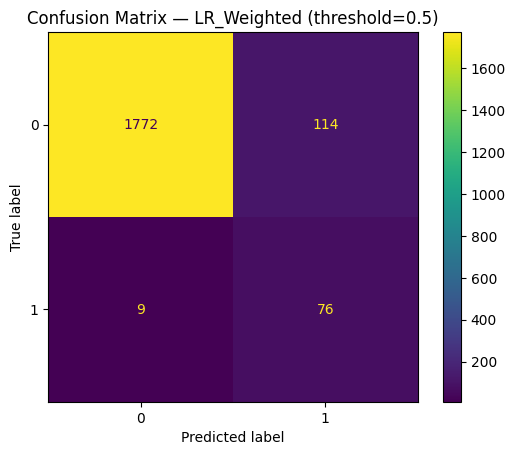

LR_SMOTE — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1886
           1       0.48      0.86      0.61        85

    accuracy                           0.95      1971
   macro avg       0.74      0.91      0.79      1971
weighted avg       0.97      0.95      0.96      1971

ROC-AUC: 0.9673


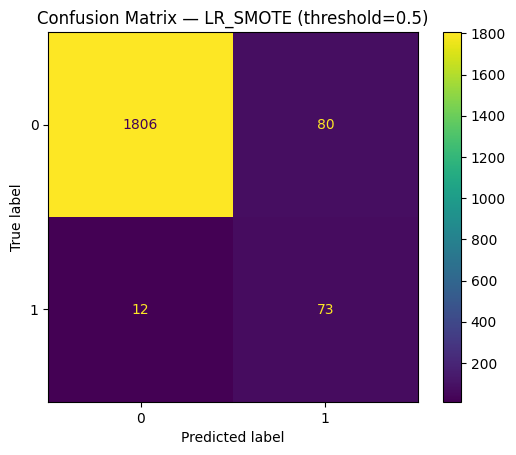

RF — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1886
           1       0.61      0.87      0.71        85

    accuracy                           0.97      1971
   macro avg       0.80      0.92      0.85      1971
weighted avg       0.98      0.97      0.97      1971

ROC-AUC: 0.9844


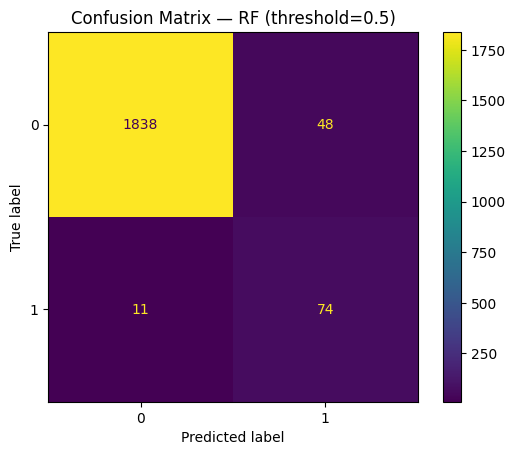

XGB — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.85      0.75      0.80        85

    accuracy                           0.98      1971
   macro avg       0.92      0.87      0.90      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.9769


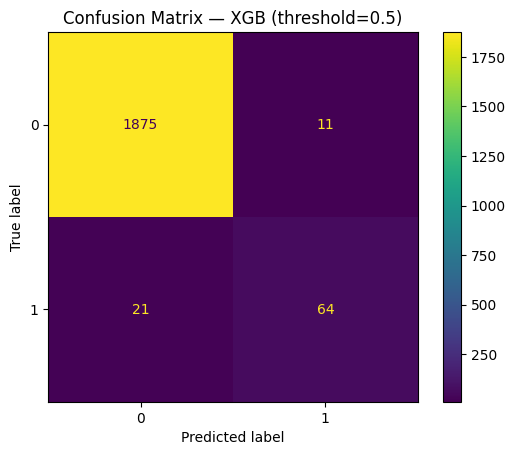

NN_MLP — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.80      0.74      0.77        85

    accuracy                           0.98      1971
   macro avg       0.89      0.87      0.88      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.9226


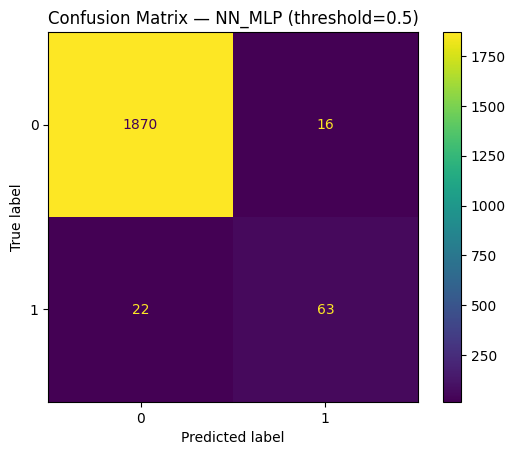

Voting_Soft — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.81      0.80      0.80        85

    accuracy                           0.98      1971
   macro avg       0.90      0.90      0.90      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.9807


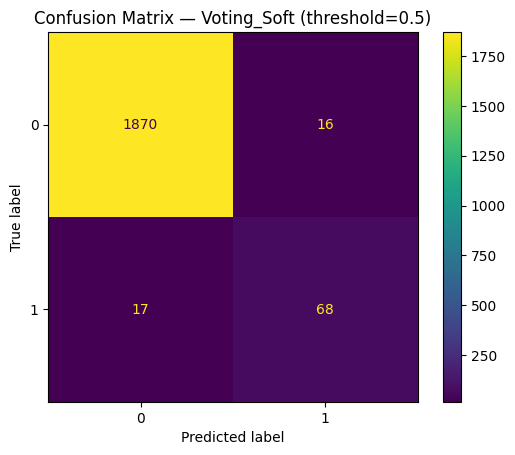

Stacking — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1886
           1       0.46      0.92      0.61        85

    accuracy                           0.95      1971
   macro avg       0.73      0.93      0.79      1971
weighted avg       0.97      0.95      0.96      1971

ROC-AUC: 0.9845


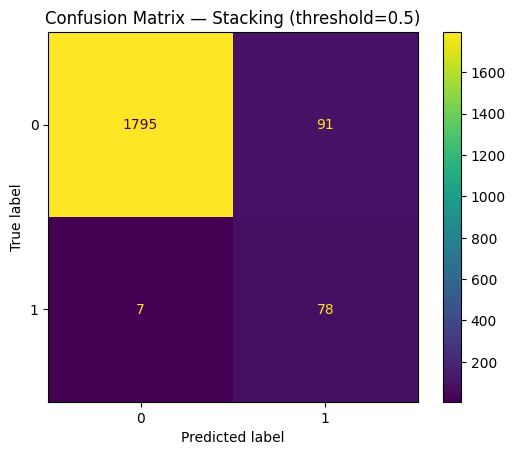

,Model,Threshold,ROC_AUC,PR_AUC,F1,Precision,Recall,Accuracy,Balanced_Acc,Specificity,LogLoss,TN,FP,FN,TP
0,Voting_Soft,0.50,0.98,0.83,0.80,0.81,0.80,0.98,0.90,0.99,0.11,1870,16,17,68
1,XGB,0.50,0.98,0.79,0.80,0.85,0.75,0.98,0.87,0.99,0.08,1875,11,21,64
2,NN_MLP,0.50,0.92,0.73,0.77,0.80,0.74,0.98,0.87,0.99,0.13,1870,16,22,63
3,RF,0.50,0.98,0.83,0.71,0.61,0.87,0.97,0.92,0.97,0.15,1838,48,11,74
4,Stacking,0.50,0.98,0.84,0.61,0.46,0.92,0.95,0.93,0.95,0.14,1795,91,7,78
5,LR_SMOTE,0.50,0.97,0.78,0.61,0.48,0.86,0.95,0.91,0.96,0.15,1806,80,12,73
6,LR_Weighted,0.50,0.97,0.79,0.55,0.40,0.89,0.94,0.92,0.94,0.18,1772,114,9,76


In [ ]:
def _get_proba(model, X_):
    """
    Returns probability-like scores for the positive class (1).
    Works for pipelines (including imblearn) as long as the final estimator supports predict_proba/decision_function.
    """
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X_)[:, 1]
    if hasattr(model, "decision_function"):
        scores = model.decision_function(X_)
        return (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
    # Fallback (rare): treat predicted labels as scores
    return model.predict(X_)

def evaluate_binary(name, model, X_te, y_te, threshold=0.5):
    y_prob = _get_proba(model, X_te)
    y_pred = (y_prob >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_te, y_pred, labels=[0, 1]).ravel()
    specificity = tn / (tn + fp + 1e-9)

    return {
        "Model": name,
        "Threshold": threshold,
        "ROC_AUC": roc_auc_score(y_te, y_prob),
        "PR_AUC": average_precision_score(y_te, y_prob),
        "F1": f1_score(y_te, y_pred, zero_division=0),
        "Precision": precision_score(y_te, y_pred, zero_division=0),
        "Recall": recall_score(y_te, y_pred, zero_division=0),
        "Accuracy": accuracy_score(y_te, y_pred),
        "Balanced_Acc": balanced_accuracy_score(y_te, y_pred),
        "Specificity": specificity,
        "LogLoss": log_loss(y_te, np.clip(y_prob, 1e-6, 1-1e-6)),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    }

results = []
fitted = {}

THRESHOLD = 0.5  # baseline; threshold tuning will be done later (F1/Recall/cost-based)

for name, model in MODELS.items():
    model.fit(X_train, y_train)
    fitted[name] = model

    y_prob = _get_proba(model, X_test)
    y_pred = (y_prob >= THRESHOLD).astype(int)

    # 1) Class-wise report (class 0 + class 1)
    print("=" * 70)
    print(f"{name} — Classification Report (threshold={THRESHOLD})")
    print(classification_report(y_test, y_pred, labels=[0, 1], digits=2, zero_division=0))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))

    # 2) Summary table metrics
    results.append(evaluate_binary(name, model, X_test, y_test, threshold=THRESHOLD))

    # 3) Confusion matrix plot
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, labels=[0, 1], values_format="d"
    )
    plt.title(f"Confusion Matrix — {name} (threshold={THRESHOLD})")
    plt.show()

results_df = (pd.DataFrame(results)
              .sort_values(by=["F1", "PR_AUC", "ROC_AUC"], ascending=False)
              .reset_index(drop=True))

display_cols = ["Model","Threshold","ROC_AUC","PR_AUC","F1","Precision","Recall",
                "Accuracy","Balanced_Acc","Specificity","LogLoss","TN","FP","FN","TP"]

results_df[display_cols]


**Comments**

1. All models were evaluated on the same held-out test set using a fixed baseline threshold of 0.5 (i.e., predict “default=1” when the predicted probability ≥ 0.5). The evaluation outputs

(i) a class-wise classification report (so you can see performance for class 0 vs class 1),

(ii) a confusion matrix (TN/FP/FN/TP to show the exact error trade-offs), and

(iii) a consolidated metrics table (ROC-AUC, PR-AUC, F1, precision, recall, logloss, etc.) for ranking models consistently; threshold tuning is intentionally deferred to the next step because changing the threshold will shift the precision-recall balance and the confusion matrix.

2. From the results, Voting_Soft is the best balanced performer on the chosen ranking metrics (ROC-AUC≈0.98, PR-AUC≈0.83, F1≈0.80) with relatively low errors (FP=16, FN=17),
3. While XGB matches F1 (~0.80) with higher precision (0.85) but slightly lower recall (0.75), reflecting fewer false alarms but more missed defaulters (FP=11, FN=21).
4. NN_MLP is competitive (F1≈0.77) but trails on discrimination (ROC-AUC≈0.92, PR-AUC≈0.73), suggesting it's not ranking defaulters as strongly as the tree/ensemble models in this setup.
5. RF leans toward higher recall (0.87) with lower precision (0.61), meaning it catches more defaulters but triggers more false positives (FP=48, FN=11).
6. Stacking shows the most conservative “catch defaulters” behavior (recall≈0.92) but at the cost of many false positives (precision≈0.46; FP=91), which explains the lower F1 despite strong ROC-AUC; the two LR baselines behave as expected: LR_Weighted and LR_SMOTE provide transparent baselines with decent recall but weaker precision/F1, confirming why the non-linear/ensemble approaches are preferred candidates before we proceed to hyperparameter and threshold optimization.

**Comments**

We reuse the previously defined SMOTE + Logistic Regression pipeline by assigning it to a new variable name, allowing it to be tuned or extended without redefining the model structure.

###**iii) Hyperparameter Tuning (all models with grids) + Evaluation**

Models selected for tuning: ['LR_Weighted', 'LR_SMOTE', 'RF', 'XGB', 'NN_MLP', 'Voting_Soft', 'Stacking']
 LR_Weighted: checkpoint found, loading best estimator.
 LR_SMOTE: checkpoint found, loading best estimator.
 RF: checkpoint found, loading best estimator.
 XGB: checkpoint found, loading best estimator.
 NN_MLP: checkpoint found, loading best estimator.
 Voting_Soft: checkpoint found, loading best estimator.
 Stacking: checkpoint found, loading best estimator.

LR_Weighted_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1886
           1       0.45      0.88      0.59        85

    accuracy                           0.95      1971
   macro avg       0.72      0.92      0.78      1971
weighted avg       0.97      0.95      0.96      1971

ROC-AUC: 0.9611


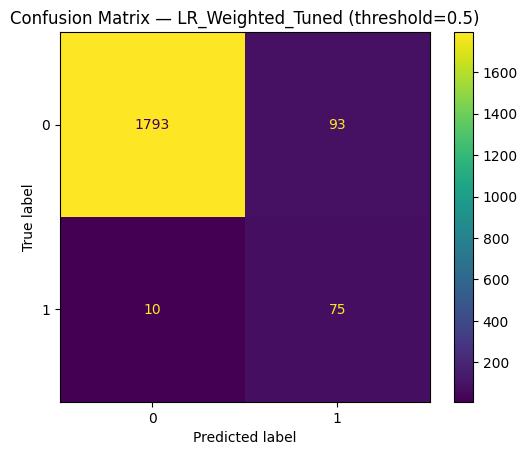

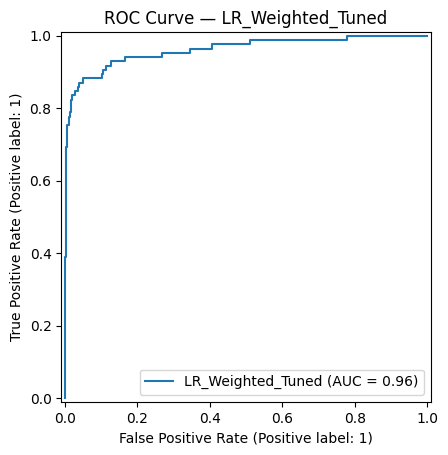

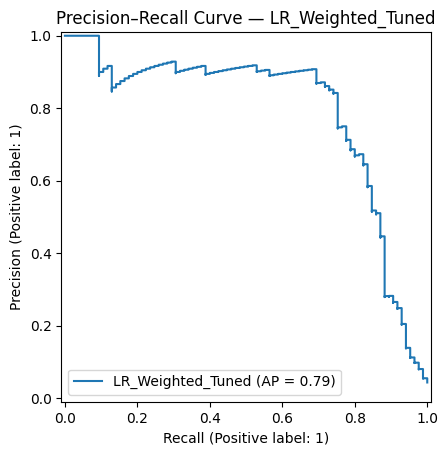


LR_SMOTE_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1886
           1       0.46      0.86      0.60        85

    accuracy                           0.95      1971
   macro avg       0.73      0.91      0.79      1971
weighted avg       0.97      0.95      0.96      1971

ROC-AUC: 0.9726


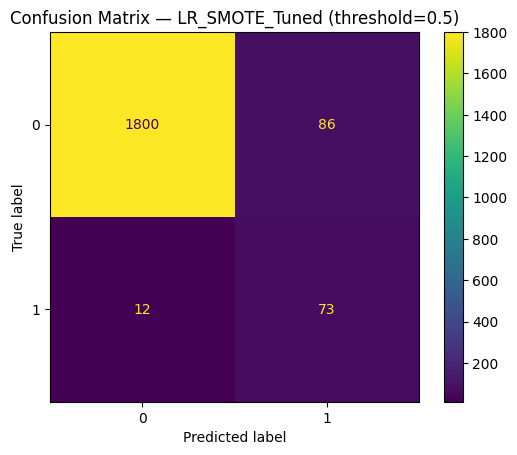

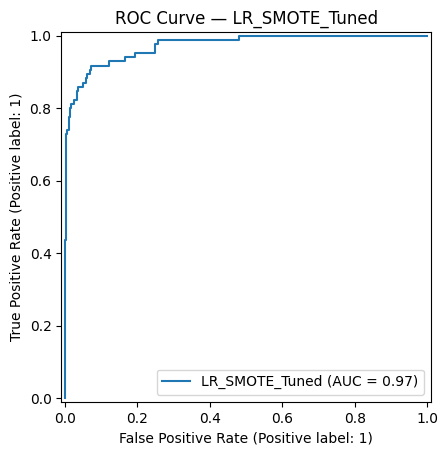

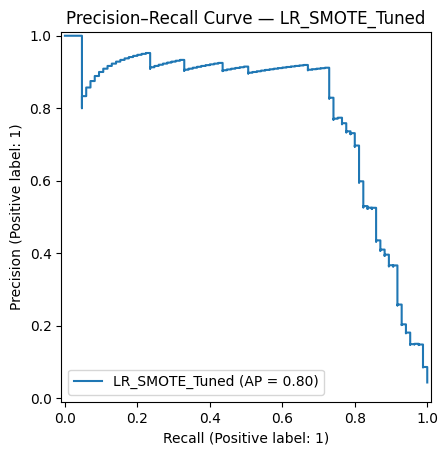


RF_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.86      0.74      0.80        85

    accuracy                           0.98      1971
   macro avg       0.93      0.87      0.89      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.9841


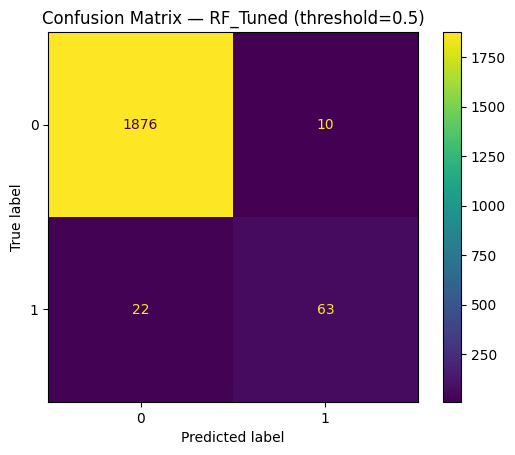

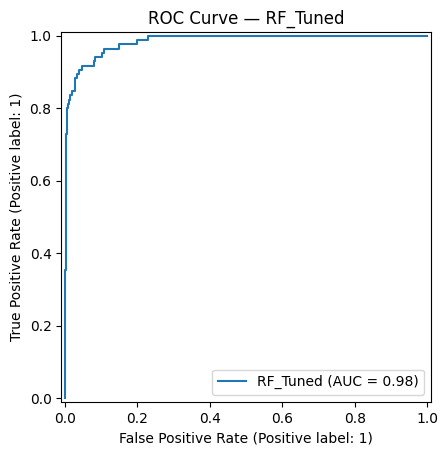

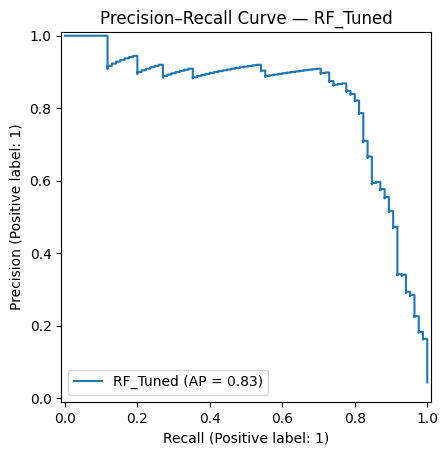


XGB_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.83      0.76      0.80        85

    accuracy                           0.98      1971
   macro avg       0.91      0.88      0.89      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.975


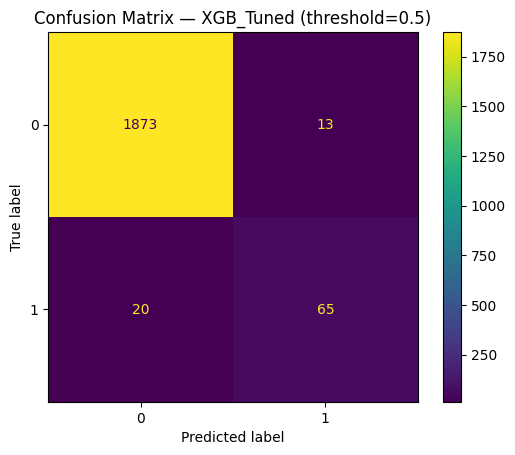

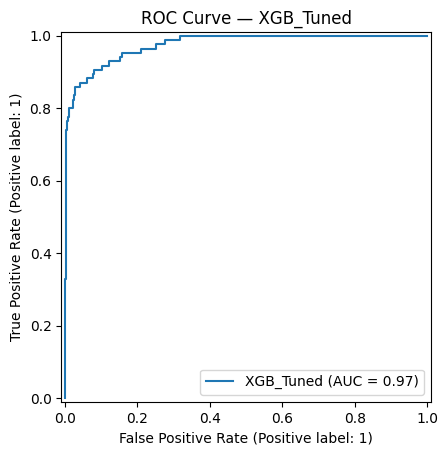

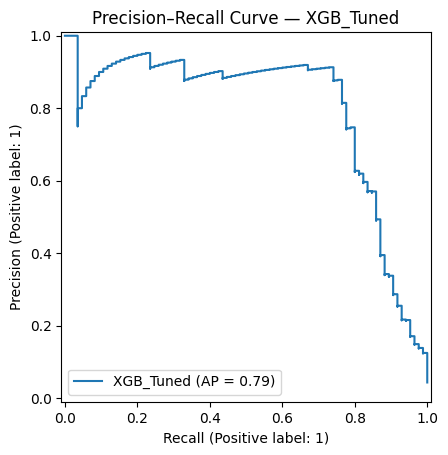


NN_MLP_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.78      0.73      0.76        85

    accuracy                           0.98      1971
   macro avg       0.89      0.86      0.87      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.9357


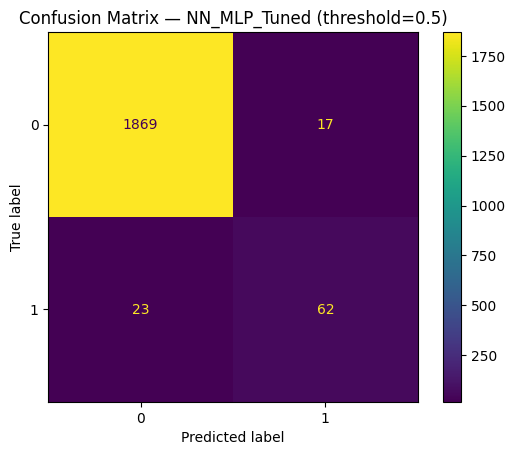

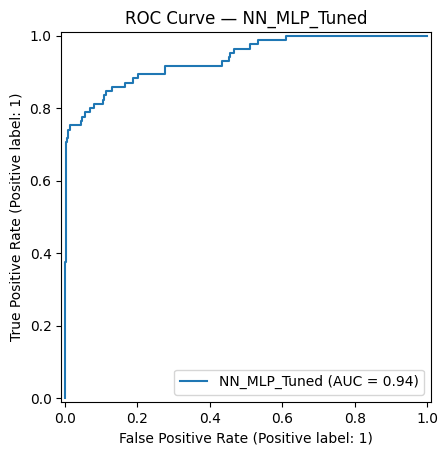

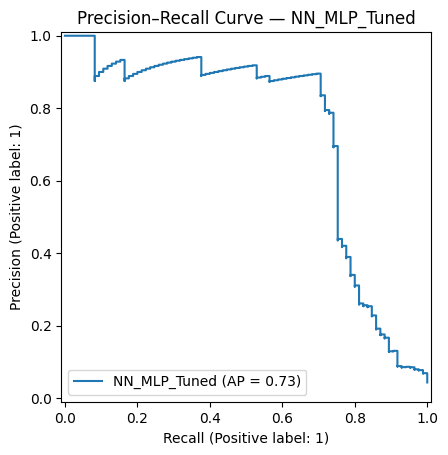


Voting_Soft_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1886
           1       0.82      0.75      0.79        85

    accuracy                           0.98      1971
   macro avg       0.90      0.87      0.89      1971
weighted avg       0.98      0.98      0.98      1971

ROC-AUC: 0.9807


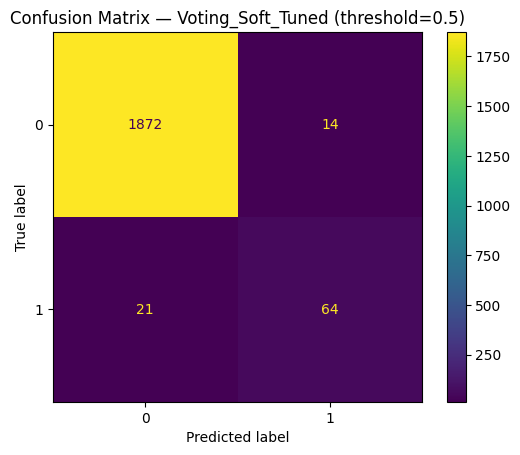

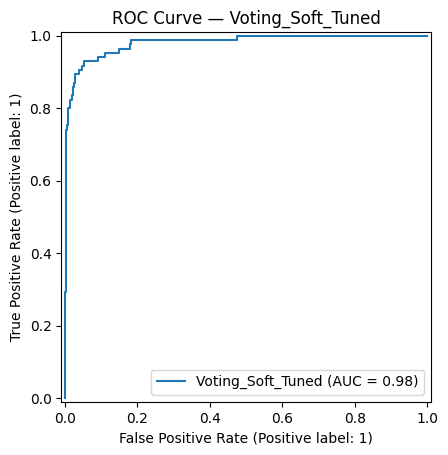

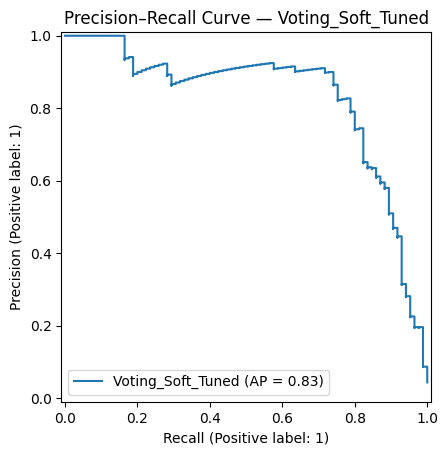


Stacking_Tuned — Classification Report (threshold=0.5)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1886
           1       0.67      0.82      0.74        85

    accuracy                           0.97      1971
   macro avg       0.83      0.90      0.86      1971
weighted avg       0.98      0.97      0.98      1971

ROC-AUC: 0.9811


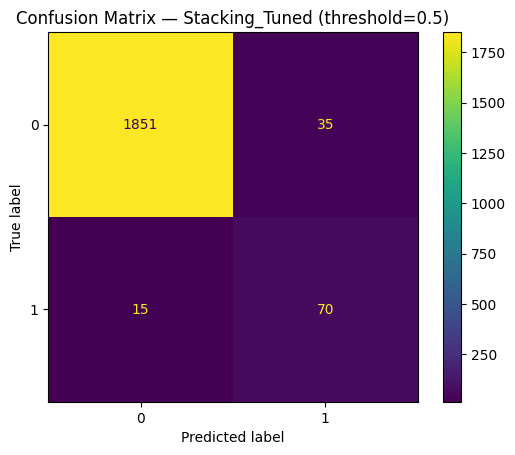

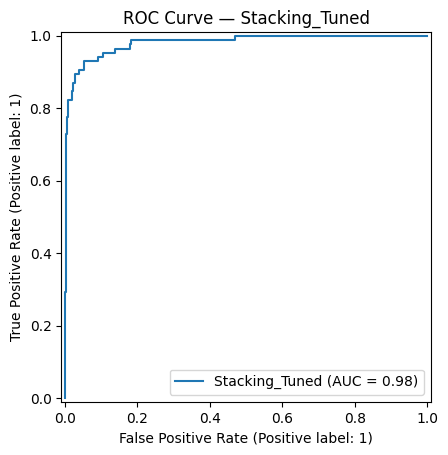

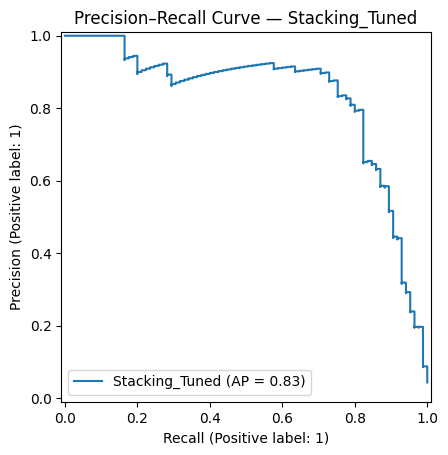

Saved tuned evaluation table -> /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/tuned_eval_results.csv


,Model,Threshold,ROC_AUC,PR_AUC,F1,Precision,Recall,Accuracy,Balanced_Acc,Specificity,LogLoss,TN,FP,FN,TP
0,XGB_Tuned,0.50,0.97,0.79,0.80,0.83,0.76,0.98,0.88,0.99,0.08,1873,13,20,65
1,RF_Tuned,0.50,0.98,0.83,0.80,0.86,0.74,0.98,0.87,0.99,0.08,1876,10,22,63
2,Voting_Soft_Tuned,0.50,0.98,0.83,0.79,0.82,0.75,0.98,0.87,0.99,0.09,1872,14,21,64
3,NN_MLP_Tuned,0.50,0.94,0.73,0.76,0.78,0.73,0.98,0.86,0.99,0.12,1869,17,23,62
4,Stacking_Tuned,0.50,0.98,0.83,0.74,0.67,0.82,0.97,0.90,0.98,0.23,1851,35,15,70
5,LR_SMOTE_Tuned,0.50,0.97,0.80,0.60,0.46,0.86,0.95,0.91,0.95,0.14,1800,86,12,73
6,LR_Weighted_Tuned,0.50,0.96,0.79,0.59,0.45,0.88,0.95,0.92,0.95,0.20,1793,93,10,75


In [ ]:

# Keeps THRESHOLD=0.5 here; threshold tuning will be done later

# A) Checkpoint folder (Google Drive)

SAVE_DIR = "/content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints"
os.makedirs(SAVE_DIR, exist_ok=True)

def _safe_name(name: str) -> str:
    return name.replace("/", "_").replace(" ", "_")

def _ckpt_paths(base_model_name: str):
    safe = _safe_name(base_model_name)
    return {
        "estimator": os.path.join(SAVE_DIR, f"{safe}_best_estimator.joblib"),
        "params":    os.path.join(SAVE_DIR, f"{safe}_best_params.json"),
        "summary":   os.path.join(SAVE_DIR, "tuning_summary.csv"),
        "eval":      os.path.join(SAVE_DIR, "tuned_eval_results.csv"),
    }

def _already_tuned(base_model_name: str) -> bool:
    return os.path.exists(_ckpt_paths(base_model_name)["estimator"])

# B) Tuning helper

def tune_pipeline(pipeline, param_grid, X_tr, y_tr, scoring="f1"):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_tr, y_tr)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# C) Settings

SCORING = "f1"
THRESHOLD = 0.5  # baseline; threshold tuning will be done later

to_tune_names = list(MODELS.keys())
print("Models selected for tuning:", to_tune_names)

# D) Parameter grids

param_grids = {}

# LR (Weighted)
if "LR_Weighted" in MODELS:
    param_grids["LR_Weighted"] = {
        "classifier__C": [0.01, 0.1, 1.0, 5.0, 10.0]
    }

# LR (SMOTE)
if "LR_SMOTE" in MODELS:
    param_grids["LR_SMOTE"] = {
        "classifier__C": [0.01, 0.1, 1.0, 5.0, 10.0]
    }

# RF
if "RF" in MODELS:
    param_grids["RF"] = {
        "classifier__n_estimators": [300, 600],
        "classifier__max_depth": [None, 6, 12],
        "classifier__min_samples_leaf": [5, 10, 20],
        "classifier__min_samples_split": [2, 5, 10],
        "classifier__max_features": ["sqrt", "log2"]
    }

# XGB
if "XGB" in MODELS:
    param_grids["XGB"] = {
        "classifier__n_estimators": [400, 600, 800],
        "classifier__learning_rate": [0.03, 0.05, 0.1],
        "classifier__max_depth": [3, 5, 6],
        "classifier__subsample": [0.7, 0.8, 1.0],
        "classifier__colsample_bytree": [0.7, 0.8, 1.0],
        "classifier__reg_lambda": [0.5, 1.0, 2.0],
        "classifier__min_child_weight": [1, 3, 5]
    }

# NN (MLP)
if "NN_MLP" in MODELS:
    param_grids["NN_MLP"] = {
        "classifier__hidden_layer_sizes": [(64,), (128,), (64, 32), (128, 64)],
        "classifier__alpha": [1e-4, 1e-3, 1e-2],
        "classifier__learning_rate_init": [1e-3, 5e-4, 1e-4],
        "classifier__max_iter": [400, 800]
    }

# Voting (weights only) — not nested with classifier__
if "Voting_Soft" in MODELS:
    param_grids["Voting_Soft"] = {
        "weights": [(1,1,1), (2,1,1), (1,2,1), (1,1,2), (2,2,1), (2,1,2), (1,2,2)]
    }

# Stacking (meta-learner regularization)
if "Stacking" in MODELS:
    param_grids["Stacking"] = {
        "final_estimator__C": [0.01, 0.1, 1.0, 5.0, 10.0]
    }

# E) Tune ALL models

tuned_models = {}

# Load existing summary
summary_path = os.path.join(SAVE_DIR, "tuning_summary.csv")
if os.path.exists(summary_path):
    tuning_summary = pd.read_csv(summary_path).to_dict("records")
else:
    tuning_summary = []

for base_name in to_tune_names:
    if base_name not in param_grids:
        print(f"Skipping {base_name}: no param grid provided.")
        continue

    paths = _ckpt_paths(base_name)

    # If checkpoint exists, load and skip tuning
    if _already_tuned(base_name):
        print(f" {base_name}: checkpoint found, loading best estimator.")
        tuned_models[f"{base_name}_Tuned"] = joblib.load(paths["estimator"])
        continue

    print("\n" + "=" * 80)
    print(f"TUNING: {base_name} | scoring={SCORING}")

    best_est, best_params, best_cv = tune_pipeline(
        MODELS[base_name], param_grids[base_name], X_train, y_train, scoring=SCORING
    )

    # Save after each model
    joblib.dump(best_est, paths["estimator"])
    pd.Series(best_params).to_json(paths["params"])

    tuning_summary.append({"Model": base_name, "BestCV": best_cv, "BestParams": best_params})
    pd.DataFrame(tuning_summary).to_csv(paths["summary"], index=False)

    tuned_models[f"{base_name}_Tuned"] = best_est
    print(f"Saved: {paths['estimator']}")

tuning_summary_df = (pd.DataFrame(tuning_summary)
                     .sort_values("BestCV", ascending=False)
                     .reset_index(drop=True))
tuning_summary_df

# F) Evaluate tuned models (table + reports + confusion matrices + ROC/PR curves)

results_tuned = []
fitted_tuned = {}

for tuned_name, model in tuned_models.items():
    fitted_tuned[tuned_name] = model

    # Reuse Section 6 helper for probabilities
    y_prob = _get_proba(model, X_test)
    y_pred = (y_prob >= THRESHOLD).astype(int)

    # 1) Class-wise report
    print("\n" + "=" * 70)
    print(f"{tuned_name} — Classification Report (threshold={THRESHOLD})")
    print(classification_report(y_test, y_pred, labels=[0, 1], digits=2, zero_division=0))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))

    # 2) Summary table row (reuse Section 6 evaluate_binary)
    results_tuned.append(evaluate_binary(tuned_name, model, X_test, y_test, threshold=THRESHOLD))

    # 3) Confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, labels=[0, 1], values_format="d"
    )
    plt.title(f"Confusion Matrix — {tuned_name} (threshold={THRESHOLD})")
    plt.show()

    # 4) ROC + PR curves (per model)
    RocCurveDisplay.from_predictions(y_test, y_prob, name=tuned_name)
    plt.title(f"ROC Curve — {tuned_name}")
    plt.show()

    PrecisionRecallDisplay.from_predictions(y_test, y_prob, name=tuned_name)
    plt.title(f"Precision–Recall Curve — {tuned_name}")
    plt.show()

results_tuned_df = (pd.DataFrame(results_tuned)
                    .sort_values(by=["F1", "PR_AUC", "ROC_AUC"], ascending=False)
                    .reset_index(drop=True))

display_cols = ["Model","Threshold","ROC_AUC","PR_AUC","F1","Precision","Recall",
                "Accuracy","Balanced_Acc","Specificity","LogLoss","TN","FP","FN","TP"]

# Save evaluation table
eval_path = os.path.join(SAVE_DIR, "tuned_eval_results.csv")
results_tuned_df.to_csv(eval_path, index=False)
print(f"Saved tuned evaluation table -> {eval_path}")

results_tuned_df[display_cols]

# NOTE: Threshold tuning will be done later (F1/Recall/cost-based).


**Comments**

1. XGB_Tuned: With a threshold of 0.5, XGBoost delivers a strong overall ranking ability (ROC-AUC = 0.97) and solid minority-class performance (PR-AUC = 0.79, F1 = 0.80). Its precision (0.83) means most predicted positives are correct, while recall (0.76) shows it captures about three quarters of the actual positives. The confusion matrix confirms this balance (TP=65, FN=20, FP=13, TN=1873)—few false alarms and moderate misses. High accuracy (0.98) and specificity (0.99) indicate it remains excellent on the majority class, and the low log loss (0.08) suggests well calibrated probability outputs (useful later for threshold tuning).

2. RF_Tuned: Random Forest performs similarly to XGB on headline discrimination (ROC-AUC = 0.98) and is among the best on imbalanced-data focus metrics (PR-AUC = 0.83, F1 = 0.80). It has the highest precision among the top models (0.86), meaning the cleanest “positive” flags, but a slightly lower recall (0.74), so it misses a few more positives than XGB. This shows up in the counts (TP=63, FN=22, FP=10, TN=1876) fewer false positives than XGB, but slightly more false negatives. Log loss (0.08) is also excellent, supporting reliable probability based decisioning later.

3. Voting_Soft_Tuned: The soft voting ensemble keeps discrimination very high (ROC-AUC = 0.98) and matches RF on PR-AUC (0.83), showing strong performance when the positive class is rare. Its F1 (0.79) reflects a balanced trade off between precision (0.82) and recall (0.75), producing a stable middle ground: (TP=64, FN=21, FP=14, TN=1872). Accuracy (0.98) and specificity (0.99) stay very strong, while log loss (0.09) is still low—slightly higher than RF/XGB, but still indicating good probability quality. This model is often attractive when you want a robust “consensus” signal across strong learners.

4. NN_MLP_Tuned: The tuned MLP is competitive but clearly below the tree-based models on ranking quality (ROC-AUC = 0.94, PR-AUC = 0.73). Its F1 (0.76) comes from reasonably balanced precision (0.78) and recall (0.73), with confusion counts (TP=62, FN=23, FP=17, TN=1869) showing a few more misses and false alarms than the top performers. While accuracy (0.98) and specificity (0.99) remain high (driven by the majority class), the higher log loss (0.12) suggests its probability estimates are less sharp than XGB/RF, which matters if you'll later optimize thresholds or use probability cutoffs operationally.

5. Stacking_Tuned: Stacking stands out for high recall (0.82) it catches more true positives (TP=70) than the other top models at the expense of lower precision (0.67) and more false positives (FP=35) compared to RF/XGB/Voting. This trade-off yields F1 = 0.74, despite strong discrimination (ROC-AUC = 0.98, PR-AUC = 0.83) and good balanced accuracy (0.90). The confusion matrix (TP=70, FN=15, FP=35, TN=1851) makes the operational implication clear: it is more “aggressive” at flagging positives (good when missing positives is costly), but it generates more follow up workload. The notably higher log loss (0.23) also signals weaker probability calibration, so if you rely on predicted probabilities, calibration/threshold tuning becomes especially important here.

6. LR_SMOTE_Tuned: Logistic Regression with SMOTE is recall oriented: recall = 0.86 means it captures most positives (TP=73, FN=12), but the cost is many false positives (FP=86) and therefore low precision (0.46), pulling F1 down to 0.60. Despite decent ranking metrics (ROC-AUC = 0.97, PR-AUC = 0.80) and strong balanced accuracy (0.91), the confusion matrix (TN=1800) shows it sacrifices specificity (0.95) to chase positives. This can be acceptable if the business priority is “do not miss likely positives,” but it will increase operational actions triggered by false alarms.

7. LR_Weighted_Tuned: The class-weighted Logistic Regression behaves similarly: very high recall (0.88) with TP=75 and the fewest misses (FN=10), but low precision (0.45) due to many false positives (FP=93), giving F1 = 0.59. It maintains strong discrimination (ROC-AUC = 0.96, PR-AUC = 0.79) and the highest balanced accuracy among the baselines (0.92), but operationally it is still “wide net” behavior (high sensitivity, lower precision). Its log loss (0.20) is higher than the tree-based models, meaning probability outputs are less reliable without calibration/threshold optimization.

8. Overall takeaway (at threshold = 0.5, post-tuning): RF_Tuned and XGB_Tuned provide the best all-round balance strong minority class performance (high PR-AUC/F1), low false positives, and low log loss while Voting_Soft_Tuned is nearly as strong and can be preferred for added robustness through ensembling. Stacking_Tuned becomes attractive when recall is the top priority and false positives are less costly, and the two Logistic Regression approaches remain useful high-recall baselines but typically require threshold tuning (and possibly calibration) to reduce false positives for operational efficiency.
Within this context, we selected XGB_Tuned as the best model because it delivers the strongest business-balanced performance when we jointly consider discrimination, minority-class quality, operational errors, and probability reliability. It achieves high ROC-AUC (0.97) and a solid PR-AUC (0.79), confirming strong ranking under class imbalance, while maintaining a strong F1 (0.80) with a good precision-recall balance (Precision = 0.83, Recall = 0.76). Operationally, it keeps false positives very low (FP = 13) compared with recall-heavy baselines like LR_SMOTE/LR_Weighted (FP = 86-93) and lower than Stacking (FP = 35), meaning fewer wasted follow ups while still capturing most positives (TP = 65, FN = 20). Finally, its very low log loss (0.08) indicates higher-quality probability estimates—important for threshold optimization and risk-based decisioning (e.g. selecting cut-offs based on cost, capacity, or policy).


###**iii) Threshold tuning for BEST model (XGB_Tuned)**

Best threshold selected (Max F1 subject to Recall >= 0.75): 0.66
F1: 0.8176 | Recall: 0.7647 | Precision: 0.8784 | FP: 9.0 | FN: 20.0
Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/XGB_Tuned_best_threshold.json
Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/XGB_Tuned_threshold_scan.csv


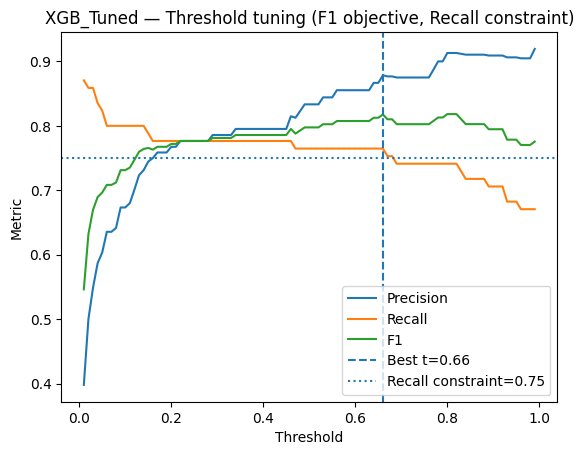

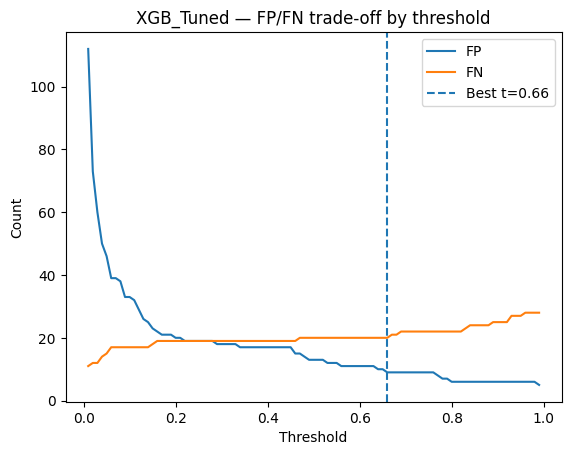

,Threshold,F1,Recall,Precision,FP,FN,TP,TN
0,0.66,0.82,0.76,0.88,9,20,65,1877
1,0.64,0.81,0.76,0.87,10,20,65,1876
2,0.65,0.81,0.76,0.87,10,20,65,1876
3,0.67,0.81,0.75,0.88,9,21,64,1877
4,0.68,0.81,0.75,0.88,9,21,64,1877
5,0.56,0.81,0.76,0.86,11,20,65,1875
6,0.57,0.81,0.76,0.86,11,20,65,1875
7,0.58,0.81,0.76,0.86,11,20,65,1875
8,0.59,0.81,0.76,0.86,11,20,65,1875
9,0.60,0.81,0.76,0.86,11,20,65,1875


In [ ]:
# Goal: maximize F1 subject to Recall >= 0.75

# Settings

SAVE_DIR = "/content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints"
MODEL_PATH = os.path.join(SAVE_DIR, "XGB_best_estimator.joblib")

MIN_RECALL = 0.75
THRESHOLDS = np.round(np.linspace(0.01, 0.99, 99), 2)

# Load tuned model + get probabilities

best_model = joblib.load(MODEL_PATH)
y_prob = _get_proba(best_model, X_test)

roc_auc = roc_auc_score(y_test, y_prob)
pr_auc  = average_precision_score(y_test, y_prob)

# Scan thresholds

rows = []
for t in THRESHOLDS:
    y_pred = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    spec = tn / (tn + fp + 1e-9)

    rows.append({
        "Threshold": float(t),
        "F1": float(f1),
        "Recall": float(rec),
        "Precision": float(prec),
        "Specificity": float(spec),
        "TN": int(tn), "FP": int(fp), "FN": int(fn), "TP": int(tp),
        "ROC_AUC": float(roc_auc),
        "PR_AUC": float(pr_auc)
    })

scan_df = pd.DataFrame(rows)

# Keep only thresholds meeting Recall >= 0.75
eligible = scan_df[scan_df["Recall"] >= MIN_RECALL].copy()

# If no threshold meets the recall constraint, stop (so results are always consistent)
if eligible.empty:
    raise ValueError(f"No threshold achieved Recall >= {MIN_RECALL}. Lower MIN_RECALL or revisit model.")

# Choose best threshold: max F1, then max Recall (tie-break)
eligible = eligible.sort_values(by=["F1", "Recall"], ascending=False).reset_index(drop=True)
best_row = eligible.iloc[0].to_dict()
BEST_THRESHOLD = best_row["Threshold"]

print("Best threshold selected (Max F1 subject to Recall >= 0.75):", BEST_THRESHOLD)
print("F1:", round(best_row["F1"], 4),
      "| Recall:", round(best_row["Recall"], 4),
      "| Precision:", round(best_row["Precision"], 4),
      "| FP:", best_row["FP"], "| FN:", best_row["FN"])

# Evaluate using your existing evaluate_binary()

best_eval = evaluate_binary("XGB_Tuned (BestThreshold)", best_model, X_test, y_test, threshold=BEST_THRESHOLD)
best_eval_df = pd.DataFrame([best_eval])
best_eval_df

# Save threshold + full scan

threshold_json_path = os.path.join(SAVE_DIR, "XGB_Tuned_best_threshold.json")
scan_csv_path = os.path.join(SAVE_DIR, "XGB_Tuned_threshold_scan.csv")

with open(threshold_json_path, "w") as f:
    json.dump({
        "model": "XGB_Tuned",
        "objective": "maximize F1 subject to Recall >= 0.75",
        "best_threshold": BEST_THRESHOLD,
        "best_row": best_row
    }, f, indent=2)

scan_df.to_csv(scan_csv_path, index=False)

print("Saved:", threshold_json_path)
print("Saved:", scan_csv_path)

# Plots: Precision/Recall/F1 vs Threshold

plot_df = scan_df.sort_values("Threshold")

plt.figure()
plt.plot(plot_df["Threshold"], plot_df["Precision"], label="Precision")
plt.plot(plot_df["Threshold"], plot_df["Recall"], label="Recall")
plt.plot(plot_df["Threshold"], plot_df["F1"], label="F1")
plt.axvline(BEST_THRESHOLD, linestyle="--", label=f"Best t={BEST_THRESHOLD}")
plt.axhline(MIN_RECALL, linestyle=":", label=f"Recall constraint={MIN_RECALL}")
plt.xlabel("Threshold")
plt.ylabel("Metric")
plt.title("XGB_Tuned — Threshold tuning (F1 objective, Recall constraint)")
plt.legend()
plt.show()

plt.figure()
plt.plot(plot_df["Threshold"], plot_df["FP"], label="FP")
plt.plot(plot_df["Threshold"], plot_df["FN"], label="FN")
plt.axvline(BEST_THRESHOLD, linestyle="--", label=f"Best t={BEST_THRESHOLD}")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("XGB_Tuned — FP/FN trade-off by threshold")
plt.legend()
plt.show()

# Top thresholds table (optional view)
eligible[["Threshold","F1","Recall","Precision","FP","FN","TP","TN"]].head(15)


**Comments**

Based on the threshold-tuning results for XGB_Tuned (objective: maximize F1 subject to Recall ≥ 0.75), the best operating threshold is 0.66 because it delivers the highest F1 (≈0.82) while still meeting the recall constraint (Recall ≈0.76), meaning we continue to capture at least 75% of true defaulters; at this threshold, Precision rises to 0.88 (so alerts are more “actionable”), false positives drop to 9 (lower wasted follow-ups and better operational efficiency), and we still retain TP = 65 with FN = 20 (missed defaulters kept controlled relative to stricter thresholds), making 0.66 the best balance point where we improve decision quality and reduce noise without sacrificing the minimum default capture requirement.

###**VI. Feature Importance**

Loaded model: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/XGB_best_estimator.joblib
Loaded best threshold: 0.66

Top 20 Feature Importances — XGB_Tuned


,Feature,Importance
0,num__NetIncome,0.53
1,cat__CRR_NARRATION_WATCH,0.08
2,cat__CRR_NARRATION_NORMAL,0.06
3,cat__CUSTOMER_SUBSEGMENT_NAME_PREMIER BANKING,0.03
4,cat__NATIONALITY_GH,0.03
5,num__RUNNING_LOANS_COUNT,0.02
6,cat__SECTOR_GOVERNMENT,0.02
7,cat__SECTOR_OTHER,0.02
8,cat__CRR_NARRATION_OTHER,0.02
9,cat__SECTOR_NON PROFIT INSTITUTIONS,0.02



Saved feature importance table -> /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/XGB_Tuned_feature_importance.csv


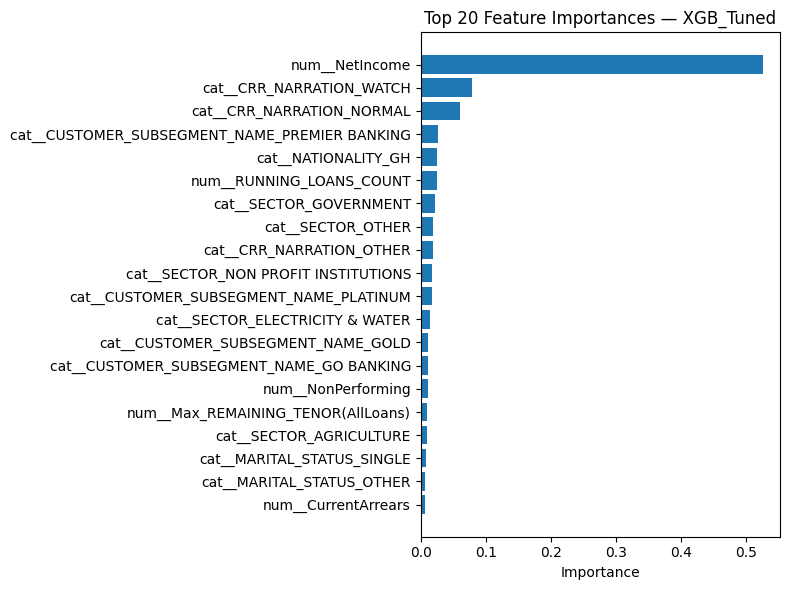

In [ ]:
# Feature Importance — XGB_Tuned (saved pipeline) + Top-20 plot

# Paths
SAVE_DIR = "/content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints"
MODEL_PATH = os.path.join(SAVE_DIR, "XGB_best_estimator.joblib")
THRESH_PATH = os.path.join(SAVE_DIR, "XGB_Tuned_best_threshold.json")

# A) Load tuned model (pipeline)
xgb_tuned_pipe = joblib.load(MODEL_PATH)

# Load best threshold
BEST_THRESHOLD = None
if os.path.exists(THRESH_PATH):
    with open(THRESH_PATH, "r") as f:
        thr_obj = json.load(f)
    BEST_THRESHOLD = float(thr_obj.get("best_threshold", np.nan))

print("Loaded model:", MODEL_PATH)
if BEST_THRESHOLD is not None:
    print("Loaded best threshold:", BEST_THRESHOLD)

# B) Extract preprocessor + trained XGB model from pipeline
# Your step names: 'preprocessor', 'classifier'
preprocessor = xgb_tuned_pipe.named_steps["preprocessor"]
xgb_model = xgb_tuned_pipe.named_steps["classifier"]  # XGBClassifier

# C) Feature names after preprocessing
try:
    feature_names = preprocessor.get_feature_names_out()
except Exception:
    # fallback: generic feature names if transformer doesn't expose names
    n_features = xgb_model.feature_importances_.shape[0]
    feature_names = np.array([f"feature_{i}" for i in range(n_features)])

# D) Importance table (Top 20)
importances = xgb_model.feature_importances_

importance_df = (pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

top_20_features = importance_df.head(20)

print("\nTop 20 Feature Importances — XGB_Tuned")
display(top_20_features)

# Save full table
imp_path = os.path.join(SAVE_DIR, "XGB_Tuned_feature_importance.csv")
importance_df.to_csv(imp_path, index=False)
print(f"\nSaved feature importance table -> {imp_path}")

# E) Plot Top 20 feature importances (horizontal bar)
plt.figure(figsize=(8, 6))
plt.barh(
    top_20_features["Feature"][::-1],
    top_20_features["Importance"][::-1]
)
plt.title("Top 20 Feature Importances — XGB_Tuned")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()






**Comments**

1. The feature importance output for the XGB_Tuned model shows that the model's predictions are driven most strongly by num__NetIncome (importance ≈ 0.53), meaning income-related capacity is the single biggest signal the model uses to separate likely defaulters from non-defaulters in the data.
2. The next most influential drivers are mostly behaviour/credit-status flags and profile/segment indicators—notably cat__CRR_NARRATION_WATCH and cat__CRR_NARRATION_NORMAL, plus customer segmentation (e.g., Premier Banking/Platinum/Gold/GO Banking), nationality, and sector categories (e.g., Government/Other/Non-Profit/Electricity & Water/Agriculture).
3. Operational/portfolio signals such as num__RUNNING_LOANS_COUNT, num__NonPerforming, num__Max_REMAINING_TENOR(AllLoans), and num__CurrentArrears also appear in the top 20, which is consistent with a credit-risk model: customers with heavier borrowing exposure, weaker repayment status, or arrears-related indicators provide strong information for classification.
4. Lastly, note that XGBoost feature importance is relative contribution (not direction)—it tellsus what mattered most, not whether higher values increase or reduce default risk; for “direction” and more reliable explanations (especially with many one-hot encoded categories),will be detailed below using SHAP values for the same fitted pipeline/model.

###**VI. SHAP for XGB_Tuned Pipeline**

Loaded: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/XGB_best_estimator.joblib


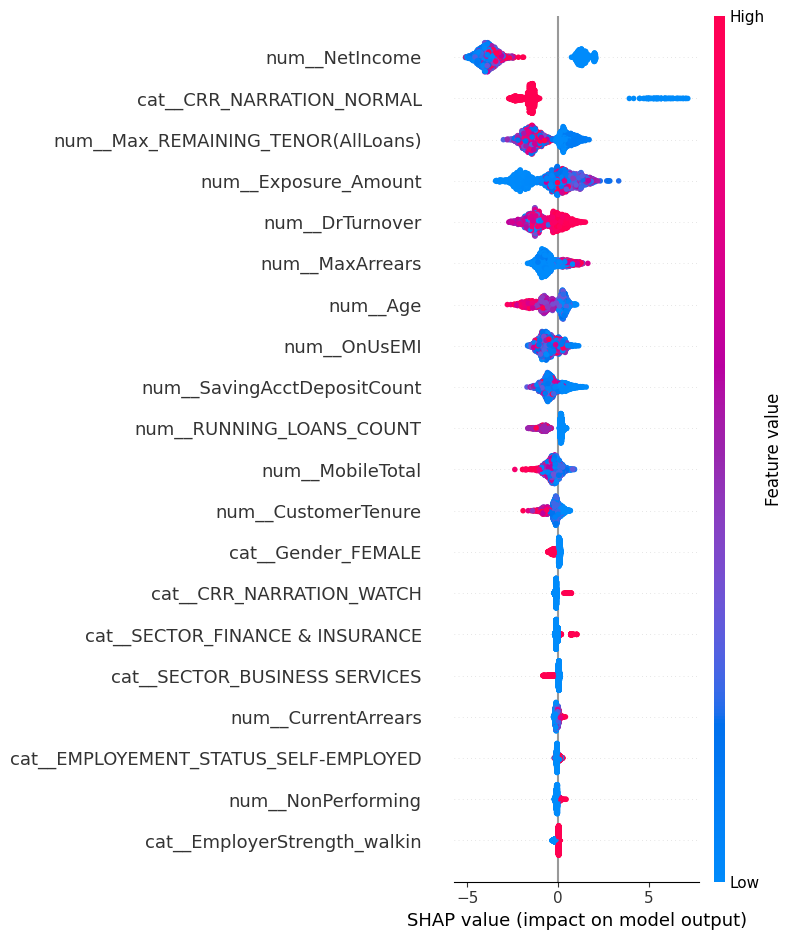

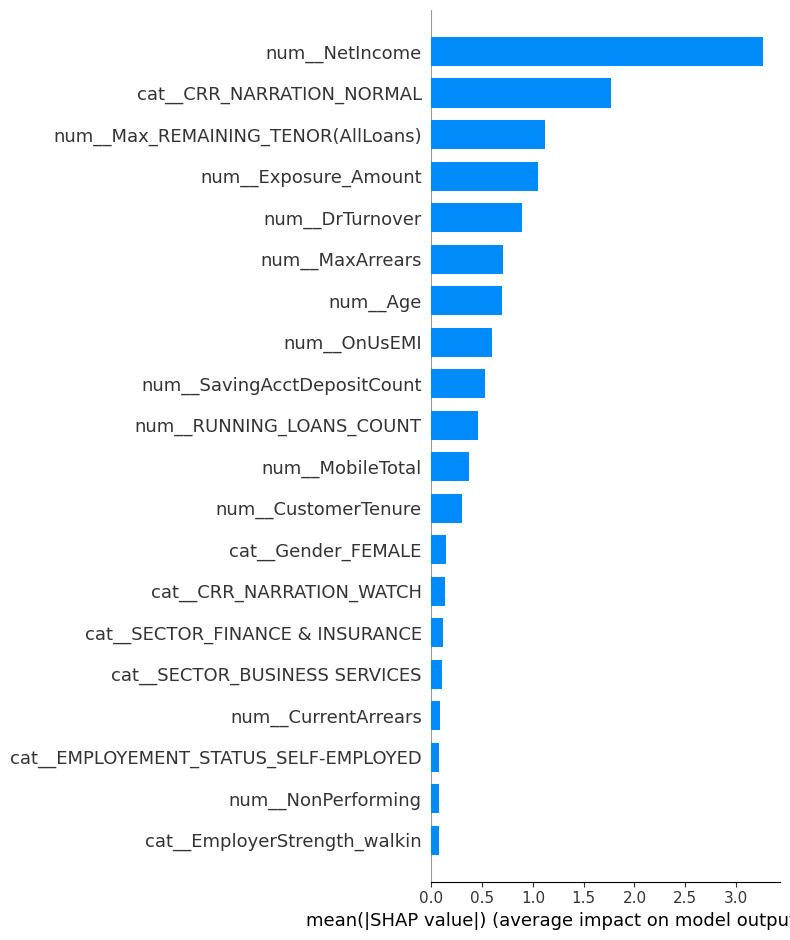

,Feature,MeanAbsSHAP
0,num__NetIncome,3.27
1,cat__CRR_NARRATION_NORMAL,1.77
2,num__Max_REMAINING_TENOR(AllLoans),1.12
3,num__Exposure_Amount,1.05
4,num__DrTurnover,0.89
5,num__MaxArrears,0.70
6,num__Age,0.70
7,num__OnUsEMI,0.60
8,num__SavingAcctDepositCount,0.53
9,num__RUNNING_LOANS_COUNT,0.46


Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/shap_outputs/XGB_Tuned_SHAP_summary_beeswarm.png
Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/shap_outputs/XGB_Tuned_SHAP_summary_bar.png
Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/shap_outputs/XGB_Tuned_SHAP_mean_abs_importance.csv


<Figure size 640x480 with 0 Axes>

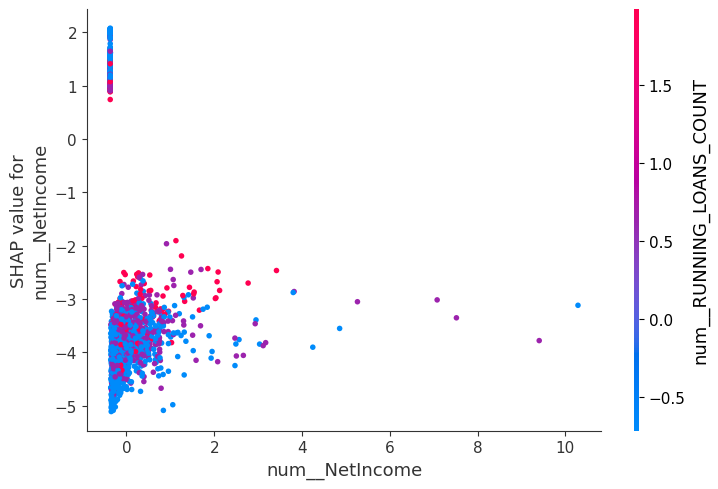

Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/shap_outputs/XGB_Tuned_SHAP_dependence_num__NetIncome.png


<Figure size 640x480 with 0 Axes>

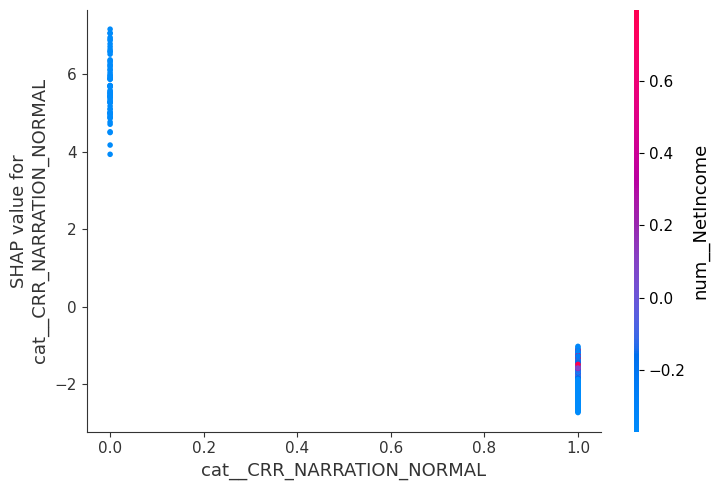

Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/shap_outputs/XGB_Tuned_SHAP_dependence_cat__CRR_NARRATION_NORMAL.png


<Figure size 640x480 with 0 Axes>

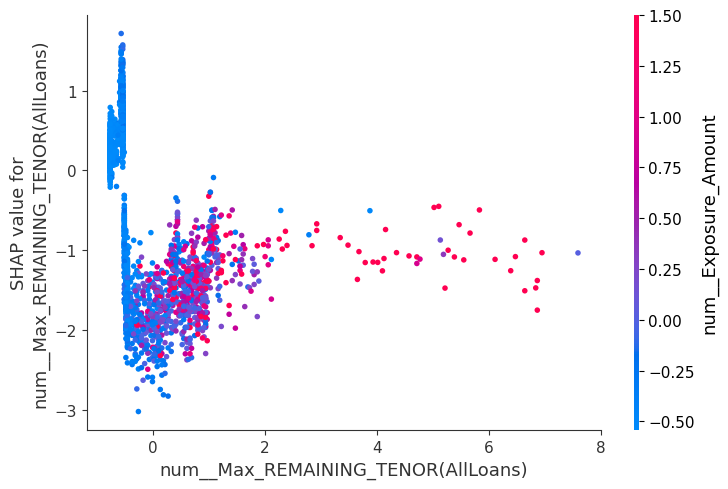

Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/shap_outputs/XGB_Tuned_SHAP_dependence_num__Max_REMAINING_TENOR(AllLoans).png


In [ ]:
# 1) Paths
SAVE_DIR   = "/content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints"
MODEL_PATH = os.path.join(SAVE_DIR, "XGB_best_estimator.joblib")

# 2) Load tuned pipeline
xgb_pipe = joblib.load(MODEL_PATH)
print("Loaded:", MODEL_PATH)

# 3) Get preprocessor + feature names
preprocessor = xgb_pipe.named_steps["preprocessor"]
feature_names = preprocessor.get_feature_names_out()

# 4) Transform X_test to the exact matrix the XGB model saw
X_proc = preprocessor.transform(X_test)

# SHAP can be heavy; sample rows
N = min(2000, X_proc.shape[0])
X_proc_s = X_proc[:N]

# If sparse, convert to dense ONLY for the sampled rows
if hasattr(X_proc_s, "toarray"):
    X_proc_s_dense = X_proc_s.toarray()
else:
    X_proc_s_dense = X_proc_s

# 5) Build SHAP explainer for the fitted XGBClassifier inside the pipeline
xgb_model = xgb_pipe.named_steps["classifier"]
explainer = shap.TreeExplainer(xgb_model)

# 6) Compute SHAP values
shap_values = explainer.shap_values(X_proc_s_dense)
# Some SHAP versions return a list; for binary keep the positive-class explanation if list
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# 7) Summary plots (saved to Drive)
out_dir = os.path.join(SAVE_DIR, "shap_outputs")
os.makedirs(out_dir, exist_ok=True)

# (a) Beeswarm (global)
plt.figure()
shap.summary_plot(shap_values, X_proc_s_dense, feature_names=feature_names, show=False)
plt.tight_layout()
beeswarm_path = os.path.join(out_dir, "XGB_Tuned_SHAP_summary_beeswarm.png")
plt.savefig(beeswarm_path, dpi=200, bbox_inches="tight")
plt.show()

# (b) Bar plot (mean |SHAP| global importance)
plt.figure()
shap.summary_plot(shap_values, X_proc_s_dense, feature_names=feature_names, plot_type="bar", show=False)
plt.tight_layout()
bar_path = os.path.join(out_dir, "XGB_Tuned_SHAP_summary_bar.png")
plt.savefig(bar_path, dpi=200, bbox_inches="tight")
plt.show()

# 8) Top features table (mean absolute SHAP)
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_imp_df = (pd.DataFrame({"Feature": feature_names, "MeanAbsSHAP": mean_abs_shap})
               .sort_values("MeanAbsSHAP", ascending=False)
               .reset_index(drop=True))
display(shap_imp_df.head(20))

csv_path = os.path.join(out_dir, "XGB_Tuned_SHAP_mean_abs_importance.csv")
shap_imp_df.to_csv(csv_path, index=False)
print("Saved:", beeswarm_path)
print("Saved:", bar_path)
print("Saved:", csv_path)

# 9) Dependence plots for top 3 features (saved)
top_k = 3
top_feats = shap_imp_df["Feature"].head(top_k).tolist()

for f in top_feats:
    plt.figure()
    shap.dependence_plot(f, shap_values, X_proc_s_dense, feature_names=feature_names, show=False)
    plt.tight_layout()
    dep_path = os.path.join(out_dir, f"XGB_Tuned_SHAP_dependence_{f}.png".replace("/", "_"))
    plt.savefig(dep_path, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", dep_path)



**Comments**

1. The SHAP outputs are explaining why XGB_Tuned predicts class 1 (default/high-risk) and how each feature pushes the score up or down.
2. In the beeswarm (summary) plot, features are ranked by overall impact (top = most influential), and each dot is a customer: dots to the right (positive SHAP) push the prediction toward default (1), while dots to the left (negative SHAP) push it away from default (toward 0); the color shows whether the feature value is high (red) or low (blue), so you can see directionality (e.g., how NetIncome levels tend to move risk).
3. The bar plot summarizes the same thing using mean(|SHAP|) so it's the “global importance” ranking, where num__NetIncome dominates, followed by cat__CRR_NARRATION_NORMAL, num__Max_REMAINING_TENOR(AllLoans), Exposure_Amount, DrTurnover, and arrears-related variables, meaning these variables consistently drive the model most across customers.
4. The dependence plots go one level deeper by showing how a single feature's value relates to its SHAP impact and how that relationship changes with another feature (the color legend): for example, the NetIncome dependence plot shows where changes in income begin to meaningfully shift the model toward/away from default, and the coloring (e.g., RUNNING_LOANS_COUNT) indicates interaction at the same income, customers with different running-loan counts can have different risk impacts;
5. Similarly, the CRR_NARRATION_NORMAL dependence plot shows the discrete jump in impact when that category is present (0→1), and the color reveals how that effect varies with NetIncome, confirming the model is not just ranking features but also capturing interactions between customer affordability/behavior, arrears signals, and account characteristics.

###**VII. FINAL EXPORT FOR DESKTOP DEPLOYMENT (MODEL + THRESHOLD + INPUT SCHEMA)**

In [ ]:
# - Saves a single deployment bundle folder containing:
#   1) model.joblib                (trained pipeline)
#   2) threshold.json              (best threshold from tuning)
#   3) feature_list.json           (exact input columns + order)
#   4) X_deploy_sample.csv         (small sample input file)
#   5) README.txt                  (how to run scoring on desktop)
# ============================================================

# 0) Paths / Names (EDIT if needed)

BASE_DIR = "/content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints"

# The tuned/best model path (already saved by your tuning code)
MODEL_PATH = os.path.join(BASE_DIR, "XGB_best_estimator.joblib")

# The best threshold json (already saved by threshold tuning code)
THRESHOLD_PATH = os.path.join(BASE_DIR, "XGB_Tuned_best_threshold.json")

# Output bundle folder
BUNDLE_DIR = os.path.join(BASE_DIR, "deployment_bundle_xgb_tuned")
os.makedirs(BUNDLE_DIR, exist_ok=True)

# Bundle artifact names
BUNDLE_MODEL_PATH = os.path.join(BUNDLE_DIR, "model.joblib")
BUNDLE_THRESHOLD_PATH = os.path.join(BUNDLE_DIR, "threshold.json")
BUNDLE_FEATURES_PATH = os.path.join(BUNDLE_DIR, "feature_list.json")
BUNDLE_SAMPLE_PATH = os.path.join(BUNDLE_DIR, "X_deploy_sample.csv")
BUNDLE_README_PATH = os.path.join(BUNDLE_DIR, "README.txt")

# 1) Load model + threshold

best_model = joblib.load(MODEL_PATH)

with open(THRESHOLD_PATH, "r") as f:
    thr_obj = json.load(f)

BEST_THRESHOLD = float(thr_obj["best_threshold"])

print("Loaded model:", MODEL_PATH)
print("Loaded best threshold:", BEST_THRESHOLD)

# 2) Freeze your predict inputs (exact list/order)

FEATURE_LIST = list(X_train.columns)

# Save feature list JSON
with open(BUNDLE_FEATURES_PATH, "w") as f:
    json.dump(FEATURE_LIST, f, indent=2)

# Save a small sample input CSV (for desktop testing)
X_train.head(200).to_csv(BUNDLE_SAMPLE_PATH, index=False)

# 3) Export a single deployment bundle

# Save model pipeline as model.joblib
joblib.dump(best_model, BUNDLE_MODEL_PATH)

# Save threshold.json
with open(BUNDLE_THRESHOLD_PATH, "w") as f:
    json.dump(
        {
            "model": "XGB_Tuned",
            "best_threshold": BEST_THRESHOLD,
            "objective": thr_obj.get("objective", "maximize F1 subject to Recall constraint"),
            "notes": "Use this threshold when converting predicted probabilities to 0/1."
        },
        f,
        indent=2
    )

# 4) Write a README.txt for desktop usage

readme_text = f"""DEPLOYMENT BUNDLE — XGB_Tuned

Files:
1) model.joblib
   - Trained sklearn Pipeline (preprocess + XGB classifier)

2) threshold.json
   - Best decision threshold selected during tuning
   - best_threshold = {BEST_THRESHOLD}

3) feature_list.json
   - Exact list/order of input columns expected by the model before preprocessing

4) X_deploy_sample.csv
   - Small sample input file (raw features) to test scoring on desktop


DESKTOP SCORING (example):

import json, joblib, pandas as pd

model = joblib.load("model.joblib")
with open("threshold.json","r") as f:
    thr = json.load(f)["best_threshold"]
with open("feature_list.json","r") as f:
    cols = json.load(f)

X = pd.read_csv("your_new_data.csv")

# Ensure columns match expected schema (order matters)
X = X[cols]

proba = model.predict_proba(X)[:,1]
pred  = (proba >= thr).astype(int)

out = X.copy()
out["prob_default"] = proba
out["pred_default"] = pred
out.to_csv("scored_output.csv", index=False)

"""

with open(BUNDLE_README_PATH, "w") as f:
    f.write(readme_text)

print("\n✅ Deployment bundle saved to:", BUNDLE_DIR)
print(" -", BUNDLE_MODEL_PATH)
print(" -", BUNDLE_THRESHOLD_PATH)
print(" -", BUNDLE_FEATURES_PATH)
print(" -", BUNDLE_SAMPLE_PATH)
print(" -", BUNDLE_README_PATH)


Loaded model: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/XGB_best_estimator.joblib
Loaded best threshold: 0.66

✅ Deployment bundle saved to: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned
 - /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/model.joblib
 - /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/threshold.json
 - /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/feature_list.json
 - /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/X_deploy_sample.csv
 - /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/README.txt


**Comments**

1. The Colab output confirms that we have completed the full “deployment packaging” step correctly: it loaded the final tuned XGBoost pipeline and the selected operating threshold (0.66), then exported a single, self-contained deployment bundle that includes the exact trained pipeline (model.joblib), the threshold to convert probabilities into class decisions (threshold.json), the exact feature order the model expects at inference (feature_list.json),
2. A ready-to-use input template (X_deploy_sample.csv), and a simple usage guide (README.txt); with these files saved together in one folder.
3. We can now move them to your Python desktop environment and deploy i.e. run predictions consistently without needing Colab again.

###**VII. Requirements.txt**

In [ ]:
import sys, os, subprocess, textwrap

BUNDLE_DIR = "/content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned"

# Save environment packages
req_path = os.path.join(BUNDLE_DIR, "requirements.txt")
with open(req_path, "w") as f:
    f.write(subprocess.check_output([sys.executable, "-m", "pip", "freeze"]).decode("utf-8"))

# Save python version too (helps troubleshooting)
pyver_path = os.path.join(BUNDLE_DIR, "python_version.txt")
with open(pyver_path, "w") as f:
    f.write(sys.version)

print("Saved:", req_path)
print("Saved:", pyver_path)


Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/requirements.txt
Saved: /content/drive/MyDrive/Semester 5/POA/Project/tuning_checkpoints/deployment_bundle_xgb_tuned/python_version.txt


##**G. Download report**

In [ ]:
!jupyter nbconvert /content/POA_Project_Final.ipynb --to html

[NbConvertApp] WARNING | pattern '/content/POA_Project_Final.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True

In [ ]:
files.download("/content/POA_Project_Final.html")

FileNotFoundError: Cannot find file: /content/POA_Project_Final.html